<a href="https://colab.research.google.com/github/OpeyemiOsakuade/Project-repos/blob/main/Topic_Modelling_filter_based_on_hashtag_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%capture
#!pip install --upgrade pandas #restart runtime afer installation.then comment out this code
import pandas as pd

In [ ]:
from google.colab import drive#
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# packages to store and manipulate data
#import pandas as pd
import numpy as np
 
# plotting packages
import matplotlib.pyplot as plt
import seaborn as sns
 
# model building package
import sklearn
 
# package to clean text
import re

# old

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/EndSARs tweets with Dr Elaine/endsars_geodf.csv')
data.shape

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


(332371, 9)

In [ ]:
data.head()

,tweet_id,location,place_latitude,place_longitude,country_code,account_creation_time,tweet_time,tweet,geometry
0,1.312105e+18,"Lagos, Nigeria",6.493,3.339,NG,2018-02-10 05:50:23,2020-10-02 18:59:34,The key to escape SARS is wearing your faded s...,POINT (3.339 6.492999999999999)
1,1.312270e+18,oº°˚º°˚Wº°˚º°˚o,6.591,3.318,NG,2010-12-25 05:32:42,2020-10-03 05:56:07,You see that #BlackLivesMatter go be like exam...,POINT (3.318 6.591)
2,1.312290e+18,Lagos X Ilorin,6.493,3.339,NG,2017-11-27 08:47:42,2020-10-03 07:16:39,I AM TIRED #EndSARS,POINT (3.339 6.492999999999999)
3,1.312292e+18,"Lekki, Nigeria",6.442,3.502,NG,2012-07-08 22:20:03,2020-10-03 07:24:43,@PoliceNG_CRU your officers are asking for war...,POINT (3.502 6.442)
4,1.312296e+18,NaN,9.074,7.4239999999999995,NG,2019-07-19 06:48:55,2020-10-03 07:37:07,I know some of the SARS guys from the State CI...,POINT (7.423999999999999 9.074)


In [ ]:
data.tweet.unique().shape

(279380,)

In [ ]:
df = data.copy()

In [ ]:
df.dropna(subset=['tweet'], inplace=True)
df.shape

(332370, 9)

In [ ]:
df.tweet.isna().sum()

0

In [ ]:
def find_retweeted(tweet):
    '''This function will extract the twitter handles of retweed people'''
    return re.findall('(?<=RT\s)(@[A-Za-z]+[A-Za-z0-9-_]+)', str(tweet))
 
def find_mentioned(tweet):
    '''This function will extract the twitter handles of people mentioned in the tweet'''
    return re.findall('(?<!RT\s)(@[A-Za-z]+[A-Za-z0-9-_]+)', str(tweet))
 
def find_hashtags(tweet):
    '''This function will extract hashtags'''
    return re.findall('(#[A-Za-z]+[A-Za-z0-9-_]+)', str(tweet).lower())

In [ ]:
# make new columns for retweeted usernames, mentioned usernames and hashtags
df['retweeted'] = [find_retweeted(word) for word in df['tweet']]
df['mentioned'] = [find_mentioned(word) for word in df['tweet']]
df['hashtags'] = [find_hashtags(word) for word in df['tweet']]

In [ ]:
def remove_newline(message):
  return re.sub('\n', ' ', str(message.lower()))
def remove_symbols(message):
  re.sub(r'^\x00-\x7F+', ' ', message)
  return re.sub(r'[@!.,(\/&)?:#*...-;'']', '', str(message)) 
def remove_urls(message):
  return re.sub(r'http\S+', '', str(message))
# Remove emoji
from unicodedata import normalize
def remove_nonascii(message):
  unicode_norm = normalize('NFD', message).encode('ascii', 'ignore')
  return unicode_norm.decode('UTF-8')
 
def prep_message(message):
  message = remove_urls(message)
  message = remove_symbols(message)
  message = remove_newline(message)
  message = remove_nonascii(message)
  return message

In [ ]:
 df['cleaned_tweets']=[prep_message(word) for word in df['tweet']]
df['cleaned_tweets']

0         the key to escape sars is wearing your faded s...
1         you see that blacklivesmatter go be like examp...
2                                        i am tired endsars
3         policeng_cru your officers are asking for war ...
4         i know some of the sars guys from the state ci...
                                ...                        
332366                               manamashuga-tamendsars
332367                       inshallahallah is wise endsars
332368    pk_defend f_balochi ptiofficial imrankhanpti m...
332369                                           endsars   
332370    the star of sirius shines brightestin the sky ...
Name: cleaned_tweets, Length: 332370, dtype: object

In [ ]:
 df['tweet_lower']=[remove_newline(word) for word in df['tweet']]
df['tweet_lower']

0         the key to escape sars is wearing your faded s...
1         you see that #blacklivesmatter go be like exam...
2                                       i am tired #endsars
3         @policeng_cru your officers are asking for war...
4         i know some of the sars guys from the state ci...
                                ...                        
332366                    man❤️am🥰ashuga-tam😗🙏❤️🌹😇🎶#endsars
332367                🙏inshallah🙏🌹❤️allah is wise. #endsars
332368    @pk_defend @f_balochi1 @ptiofficial @imrankhan...
332369    #endsars 🎶🙏❤️🇳🇬💙❤️👍🏿🎶😘🇳🇬🤎👍🏿🇺🇸🌙😘🥰😘🥰😘 🇳🇬❤️🌹🙏👍🏿🇳🇬...
332370    the star of sirius shines brightest🙏in the sky...
Name: tweet_lower, Length: 332370, dtype: object

In [ ]:
df_data =df.copy()

In [ ]:
 df_data['hashtags'] = df_data['hashtags'].str.join(',')

In [ ]:
df.head()

,tweet_id,location,place_latitude,place_longitude,country_code,account_creation_time,tweet_time,tweet,geometry,retweeted,mentioned,hashtags,cleaned_tweets,tweet_lower
0,1.312105e+18,"Lagos, Nigeria",6.493,3.339,NG,2018-02-10 05:50:23,2020-10-02 18:59:34,The key to escape SARS is wearing your faded s...,POINT (3.339 6.492999999999999),[],[],[#endsars],the key to escape sars is wearing your faded s...,the key to escape sars is wearing your faded s...
1,1.312270e+18,oº°˚º°˚Wº°˚º°˚o,6.591,3.318,NG,2010-12-25 05:32:42,2020-10-03 05:56:07,You see that #BlackLivesMatter go be like exam...,POINT (3.318 6.591),[],[],"[#blacklivesmatter, #sarsbrutality, #policebru...",you see that blacklivesmatter go be like examp...,you see that #blacklivesmatter go be like exam...
2,1.312290e+18,Lagos X Ilorin,6.493,3.339,NG,2017-11-27 08:47:42,2020-10-03 07:16:39,I AM TIRED #EndSARS,POINT (3.339 6.492999999999999),[],[],[#endsars],i am tired endsars,i am tired #endsars
3,1.312292e+18,"Lekki, Nigeria",6.442,3.502,NG,2012-07-08 22:20:03,2020-10-03 07:24:43,@PoliceNG_CRU your officers are asking for war...,POINT (3.502 6.442),[],[@PoliceNG_CRU],[#endsars],policeng_cru your officers are asking for war ...,@policeng_cru your officers are asking for war...
4,1.312296e+18,NaN,9.074,7.4239999999999995,NG,2019-07-19 06:48:55,2020-10-03 07:37:07,I know some of the SARS guys from the State CI...,POINT (7.423999999999999 9.074),[],[],"[#sarsalert, #endsars, #sars]",i know some of the sars guys from the state ci...,i know some of the sars guys from the state ci...


In [ ]:
 df_data.head()

,tweet_id,location,place_latitude,place_longitude,country_code,account_creation_time,tweet_time,tweet,geometry,retweeted,mentioned,hashtags,cleaned_tweets,tweet_lower
0,1.312105e+18,"Lagos, Nigeria",6.493,3.339,NG,2018-02-10 05:50:23,2020-10-02 18:59:34,The key to escape SARS is wearing your faded s...,POINT (3.339 6.492999999999999),[],[],#endsars,the key to escape sars is wearing your faded s...,the key to escape sars is wearing your faded s...
1,1.312270e+18,oº°˚º°˚Wº°˚º°˚o,6.591,3.318,NG,2010-12-25 05:32:42,2020-10-03 05:56:07,You see that #BlackLivesMatter go be like exam...,POINT (3.318 6.591),[],[],"#blacklivesmatter,#sarsbrutality,#policebrutal...",you see that blacklivesmatter go be like examp...,you see that #blacklivesmatter go be like exam...
2,1.312290e+18,Lagos X Ilorin,6.493,3.339,NG,2017-11-27 08:47:42,2020-10-03 07:16:39,I AM TIRED #EndSARS,POINT (3.339 6.492999999999999),[],[],#endsars,i am tired endsars,i am tired #endsars
3,1.312292e+18,"Lekki, Nigeria",6.442,3.502,NG,2012-07-08 22:20:03,2020-10-03 07:24:43,@PoliceNG_CRU your officers are asking for war...,POINT (3.502 6.442),[],[@PoliceNG_CRU],#endsars,policeng_cru your officers are asking for war ...,@policeng_cru your officers are asking for war...
4,1.312296e+18,NaN,9.074,7.4239999999999995,NG,2019-07-19 06:48:55,2020-10-03 07:37:07,I know some of the SARS guys from the State CI...,POINT (7.423999999999999 9.074),[],[],"#sarsalert,#endsars,#sars",i know some of the sars guys from the state ci...,i know some of the sars guys from the state ci...


In [ ]:
# 10 most repeated tweets
df.groupby(['cleaned_tweets']).size().reset_index(name='counts')\
  .sort_values('counts', ascending=False).head(20)

,cleaned_tweets,counts
53954,endsars,23251
53955,endsars,2916
70621,endsarsnow,1974
1663,endsars,855
63859,endsars endswat,580
59511,endsars endpolicebrutality,516
61068,endsars endpolicebrutalityinnigeria,460
70622,endsarsnow,447
47715,drizzybreezzy endsars,418
62884,endsars endsarsnow,384


In [ ]:
# take the rows from the hashtag columns where there are actually hashtags
hashtags_list_df = df.loc[df.hashtags.apply(lambda hashtags_list: hashtags_list !=[]),['hashtags']]
hashtags_list_df

,hashtags
0,[#endsars]
1,"[#blacklivesmatter, #sarsbrutality, #policebru..."
2,[#endsars]
3,[#endsars]
4,"[#sarsalert, #endsars, #sars]"
...,...
332366,[#endsars]
332367,[#endsars]
332368,[#endsars]
332369,[#endsars]


In [ ]:
# create dataframe where each use of hashtag gets its own row
flattened_hashtags_df = pd.DataFrame(
    [hashtag for hashtags_list in hashtags_list_df.hashtags
    for hashtag in hashtags_list],
    columns=['hashtag'])

In [ ]:
flattened_hashtags_df.head()

,hashtag
0,#endsars
1,#blacklivesmatter
2,#sarsbrutality
3,#policebrutality
4,#endsars


In [ ]:
# number of unique hashtags
flattened_hashtags_df['hashtag'].unique().size

23166

In [ ]:
 flattened_hashtags_df['hashtag'].value_counts()

#endsars                        399820
#endsarsnow                      63659
#endpolicebrutality              43397
#endswat                         34822
#endpolicebrutalityinnigeria     24909
                                 ...  
#opinionjournalism                   1
#defendmediafreedom                  1
#socialcritic                        1
#occupyota                           1
#tradition                           1
Name: hashtag, Length: 23166, dtype: int64

In [ ]:
popular_hashtags = flattened_hashtags_df.groupby('hashtag').size()\
                                        .reset_index(name='counts')\
                                        .sort_values('counts', ascending=True)\
                                        .reset_index(drop=True)

In [ ]:
search_irrelevant_data=list(popular_hashtags.hashtag[:2700])
search_irrelevant_data

['#a-anti-people',
 '#naijatotheworld',
 '#naijatothewurld',
 '#naijatours',
 '#naijatraveller',
 '#naijatrends',
 '#naijaweddingskillingit',
 '#naijawins',
 '#naijayourthlivematter',
 '#naijayouthlivematter',
 '#naijayouthlivesmatter',
 '#naijayouthlivesmatters',
 '#naijayouthsheroes2020',
 '#nailart',
 '#nailblogger',
 '#naildesigns',
 '#nailedit',
 '#nailporn',
 '#namingceremony',
 '#namedia',
 '#namatibe',
 '#nakwaecheki',
 '#nakedcakes',
 '#naked',
 '#naijatailors',
 '#nak',
 '#naja',
 '#nairamaley',
 '#nairaboxagainstsars',
 '#nailsbyirene',
 '#nailsart',
 '#nails2inspire',
 '#najialivesmatter',
 '#naijaswat',
 '#naijastyles',
 '#naijastudent',
 '#naijalisttalking',
 '#naijaland',
 '#naijajacks',
 '#naijainfo',
 '#naijahustlers',
 '#naijahup',
 '#naijamumuneverdo',
 '#naijahitsongs',
 '#naijahiphop',
 '#naijaharmattan',
 '#naijahairstyle',
 '#naijahair',
 '#naijaforlife',
 '#naijafarmers',
 '#naijahits',
 '#nanaaddo',
 '#naijamusic',
 '#naijamustbetterinourlifetime',
 '#naijareal

In [ ]:
popular_hashtags[:2700]#[22700:23200]

,hashtag,counts
0,#a-anti-people,1
1,#naijatotheworld,1
2,#naijatothewurld,1
3,#naijatours,1
4,#naijatraveller,1
...,...,...
2695,#itswell,1
2696,#itunnuness,1
2697,#iyigeceler,1
2698,#iyanumasele,1


In [ ]:
#popular_hashtags_desc# count of appearances of each hashtag
popular_hashtags = flattened_hashtags_df.groupby('hashtag').size()\
                                        .reset_index(name='counts')\
                                        .sort_values('counts', ascending=False)\
                                        .reset_index(drop=True)

In [ ]:
popular_hashtags.head(150)

,hashtag,counts
0,#endsars,399820
1,#endsarsnow,63659
2,#endpolicebrutality,43397
3,#endswat,34822
4,#endpolicebrutalityinnigeria,24909
...,...,...
145,#youthdemocraticparty,290
146,#endbadgovernment,289
147,#lekkimassacre2020,287
148,#endsarsbrutalityinnigeria,287


In [ ]:
killings = popular_hashtags[popular_hashtags['hashtag'].str.contains("killings")][:10]
killings = list(killings['hashtag'])

In [ ]:
nigeriableeds = popular_hashtags[popular_hashtags['hashtag'].str.contains("nigeriableeds")]
nigeriableeds = list(nigeriableeds['hashtag'])

In [ ]:
reform = popular_hashtags[popular_hashtags['hashtag'].str.contains("reform")][:25]
reform = list(reform['hashtag'])

In [ ]:
tollgate = popular_hashtags[popular_hashtags['hashtag'].str.contains("tollgate")][:11]
tollgate = list(tollgate['hashtag'])

In [ ]:
genocide = popular_hashtags[popular_hashtags['hashtag'].str.contains("genocide")][:11]
genocide = list(genocide['hashtag'])

In [ ]:
justice = popular_hashtags[popular_hashtags['hashtag'].str.contains("justice")][:17]
justice = list(justice['hashtag'])

In [ ]:
policebrutality=popular_hashtags[popular_hashtags['hashtag'].str.contains("policebrutality")][:15]
policebrutality = list(policebrutality['hashtag'])

In [ ]:
sorosoke = popular_hashtags[popular_hashtags['hashtag'].str.contains("soro")][:30]
sorosoke= list(sorosoke['hashtag'])

In [ ]:
end = popular_hashtags[popular_hashtags['hashtag'].str.contains("end")][:150]
end = list(end['hashtag'])

In [ ]:
lekki=popular_hashtags[popular_hashtags['hashtag'].str.contains("lekki")][:30]
lekki = list(lekki['hashtag'])

In [ ]:
demand = popular_hashtags[popular_hashtags['hashtag'].str.contains("demand")][:6]
demand = list(demand['hashtag'])

In [ ]:
#all_relevant = list(all_relevant_tags)

In [ ]:
all_relevant_tags = end+lekki+nigeriableeds+reform+tollgate+genocide+justice+policebrutality+sorosoke+killings+demand
all_relevant_tags = list(set(all_relevant_tags))
all_relevant_tags = pd.Series(all_relevant_tags)
all_relevant_tags

0                    #endinsecuritynow
1                    #tollgatemassacre
2      #endpolicebrutalityinnigerianow
3              #saynotopolicebrutality
4                       #lagosgenocide
                    ...               
275                   #pledgetoendsars
276                             #lekki
277                      #reformpolice
278                #justicefortheyouth
279               #endswatinnigerianow
Length: 280, dtype: object

In [ ]:
all_relevant_tags.describe()

count                   280
unique                  280
top       #endinsecuritynow
freq                      1
dtype: object

In [ ]:
popular_hashtags_list = pd.Series(popular_hashtags['hashtag'])
popular_hashtags_list

0                            #endsars
1                         #endsarsnow
2                 #endpolicebrutality
3                            #endswat
4        #endpolicebrutalityinnigeria
                     ...             
23161                  #governorstown
23162                        #goviral
23163                           #govt
23164                #govtbeproactive
23165          #zwavefeministmovement
Name: hashtag, Length: 23166, dtype: object

In [ ]:
#popular_hashtags=list(popular_hashtags['hashtag'])
 
other_tags =popular_hashtags_list[~popular_hashtags_list.isin (all_relevant_tags)]
other_tags

19                     #nigeria
20             #buhariresignnow
21                  #sarsmustgo
23                #buhariresign
24        #buharihasbeenabadboy
                  ...          
23161            #governorstown
23162                  #goviral
23163                     #govt
23164          #govtbeproactive
23165    #zwavefeministmovement
Name: hashtag, Length: 22886, dtype: object

In [ ]:
other_tags.head(59)

19                     #nigeria
20             #buhariresignnow
21                  #sarsmustgo
23                #buhariresign
24        #buharihasbeenabadboy
26               #sarsmustgonow
30                #buharimustgo
37               #abujaprotests
40         #nigerianlivesmatter
43                        #sars
47           #buhariisamurderer
48          #reconstructnigeria
50     #nigeriayouthslivematter
52              #enoughisenough
53                  #newnigeria
54                 #securenorth
57               #revolutionnow
58               #betternigeria
59               #shutitalldown
60               #lagosprotests
66       #stopnigeriagovernment
68              #prayfornigeria
70                     #enssars
72       #abujatwittercommunity
74                      #wemove
76      #badgovernmentinnigeria
79            #blacklivesmatter
84       #restructurenigerianow
85              #bettertogether
86                 #aishayesufu
87              #abetternigeria
88      

In [ ]:
# create dataframe where each use of hashtag gets its own row
other_tags_df = pd.DataFrame(
    other_tags,
    columns=['hashtag'])
other_tags_df

,hashtag
19,#nigeria
20,#buhariresignnow
21,#sarsmustgo
23,#buhariresign
24,#buharihasbeenabadboy
...,...
23161,#governorstown
23162,#goviral
23163,#govt
23164,#govtbeproactive


In [ ]:
#popular_hashtags_desc# count of appearances of each hashtag
other_hastags = other_tags_df.groupby('hashtag').size()\
                                        .reset_index(name='counts')\
                                        .sort_values('counts', ascending=False)\
                                        .reset_index(drop=True)
other_hastags

,hashtag,counts
0,#a-anti-people,1
1,#olamondnaijaonlinenews,1
2,#oleout,1
3,#olebynature,1
4,#oleatthewheel,1
...,...,...
22881,#everyonesmentalhealthmatters,1
22882,#everynigerianlifematters,1
22883,#everylifematters,1
22884,#everylifematter,1


In [ ]:

irrelevant_tags.shape

(22886,)

In [ ]:
all_relevant_tags.shape

(280,)

In [ ]:
popular_hashtags_list.shape

(23166,)

In [ ]:
df_data['search_irrelevant_data']=df_data.apply(lambda x: True if any(word in x.tweet_lower for word in search_irrelevant_data) else False, axis =1)
df_data.head()

,tweet_id,location,place_latitude,place_longitude,country_code,account_creation_time,tweet_time,tweet,geometry,retweeted,mentioned,hashtags,cleaned_tweets,tweet_lower,search_irrelevant_data
0,1.312105e+18,"Lagos, Nigeria",6.493,3.339,NG,2018-02-10 05:50:23,2020-10-02 18:59:34,The key to escape SARS is wearing your faded s...,POINT (3.339 6.492999999999999),[],[],#endsars,the key to escape sars is wearing your faded s...,the key to escape sars is wearing your faded s...,False
1,1.312270e+18,oº°˚º°˚Wº°˚º°˚o,6.591,3.318,NG,2010-12-25 05:32:42,2020-10-03 05:56:07,You see that #BlackLivesMatter go be like exam...,POINT (3.318 6.591),[],[],"#blacklivesmatter,#sarsbrutality,#policebrutal...",you see that blacklivesmatter go be like examp...,you see that #blacklivesmatter go be like exam...,False
2,1.312290e+18,Lagos X Ilorin,6.493,3.339,NG,2017-11-27 08:47:42,2020-10-03 07:16:39,I AM TIRED #EndSARS,POINT (3.339 6.492999999999999),[],[],#endsars,i am tired endsars,i am tired #endsars,False
3,1.312292e+18,"Lekki, Nigeria",6.442,3.502,NG,2012-07-08 22:20:03,2020-10-03 07:24:43,@PoliceNG_CRU your officers are asking for war...,POINT (3.502 6.442),[],[@PoliceNG_CRU],#endsars,policeng_cru your officers are asking for war ...,@policeng_cru your officers are asking for war...,False
4,1.312296e+18,NaN,9.074,7.4239999999999995,NG,2019-07-19 06:48:55,2020-10-03 07:37:07,I know some of the SARS guys from the State CI...,POINT (7.423999999999999 9.074),[],[],"#sarsalert,#endsars,#sars",i know some of the sars guys from the state ci...,i know some of the sars guys from the state ci...,False


In [ ]:
data_out = df_data.loc[df_data['search_irrelevant_data']==True]
data_out['tweet'][:10]

64     #EndSARS #Nigeria60AndUseless https://t.co/q7S...
97     #Np - Woman by @heisrema on #TheShoutOutShow w...
99     #Np - Obrigado by @timayatimaya on #TheShoutOu...
101    #Np - Jaga Jaga by Eedris on #TheShoutOutShow ...
104    #Np - Sweet In The Middle by @davido x @Zlatan...
108    #Np - A Woman Needs Love by @rayparkerjr on #T...
110    #Np - Light by @mas_aluko on #TheShoutOutShow ...
120    #Np - Akonuche by @duncan_n_mighty on #TheShou...
125    #Np - Abule by @patorankingfire on #TheShoutOu...
128    Delta state police operation SAFE DELTA 009 ca...
Name: tweet, dtype: object

In [ ]:
data_in=df_data.loc[df_data['search_irrelevant_data']==False]
data_in['tweet'][:10]

0    The key to escape SARS is wearing your faded s...
1    You see that #BlackLivesMatter go be like exam...
2                                  I AM TIRED #EndSARS
3    @PoliceNG_CRU your officers are asking for war...
4    I know some of the SARS guys from the State CI...
5    @sars_is_here @sars_watch @segalink @PoliceNG ...
6    Even if they are criminals they are to be judg...
7    @MBuhari @NGRPresident \nIs this what it has c...
8                         #EndSARS \nThat's the tweet.
9                                   #EndSARS!!!!\n\nRT
Name: tweet, dtype: object

In [ ]:
data_in

,tweet_id,location,place_latitude,place_longitude,country_code,account_creation_time,tweet_time,tweet,geometry,retweeted,mentioned,hashtags,cleaned_tweets,tweet_lower,search_irrelevant_data
0,1.312105e+18,"Lagos, Nigeria",6.493,3.339,NG,2018-02-10 05:50:23,2020-10-02 18:59:34,The key to escape SARS is wearing your faded s...,POINT (3.339 6.492999999999999),[],[],#endsars,the key to escape sars is wearing your faded s...,the key to escape sars is wearing your faded s...,False
1,1.312270e+18,oº°˚º°˚Wº°˚º°˚o,6.591,3.318,NG,2010-12-25 05:32:42,2020-10-03 05:56:07,You see that #BlackLivesMatter go be like exam...,POINT (3.318 6.591),[],[],"#blacklivesmatter,#sarsbrutality,#policebrutal...",you see that blacklivesmatter go be like examp...,you see that #blacklivesmatter go be like exam...,False
2,1.312290e+18,Lagos X Ilorin,6.493,3.339,NG,2017-11-27 08:47:42,2020-10-03 07:16:39,I AM TIRED #EndSARS,POINT (3.339 6.492999999999999),[],[],#endsars,i am tired endsars,i am tired #endsars,False
3,1.312292e+18,"Lekki, Nigeria",6.442,3.502,NG,2012-07-08 22:20:03,2020-10-03 07:24:43,@PoliceNG_CRU your officers are asking for war...,POINT (3.502 6.442),[],[@PoliceNG_CRU],#endsars,policeng_cru your officers are asking for war ...,@policeng_cru your officers are asking for war...,False
4,1.312296e+18,NaN,9.074,7.4239999999999995,NG,2019-07-19 06:48:55,2020-10-03 07:37:07,I know some of the SARS guys from the State CI...,POINT (7.423999999999999 9.074),[],[],"#sarsalert,#endsars,#sars",i know some of the sars guys from the state ci...,i know some of the sars guys from the state ci...,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332366,1.333581e+18,$citzjustice (kush🎶love),33.501,-117.12,US,2020-05-10 20:38:06,2020-12-01 01:16:15,Man❤️am🥰ashuga-tam😗🙏❤️🌹😇🎶#EndSARS,POINT (-117.12 33.501),[],[],#endsars,manamashuga-tamendsars,man❤️am🥰ashuga-tam😗🙏❤️🌹😇🎶#endsars,False
332367,1.333581e+18,$citzjustice (kush🎶love),33.501,-117.12,US,2020-05-10 20:38:06,2020-12-01 01:18:34,🙏Inshallah🙏🌹❤️Allah is wise. #EndSARS,POINT (-117.12 33.501),[],[],#endsars,inshallahallah is wise endsars,🙏inshallah🙏🌹❤️allah is wise. #endsars,False
332368,1.333582e+18,$citzjustice (kush🎶love),33.501,-117.12,US,2020-05-10 20:38:06,2020-12-01 01:20:11,@PK_Defend @F_BALOCHI1 @PTIofficial @ImranKhan...,POINT (-117.12 33.501),[],"[@PK_Defend, @F_BALOCHI1, @PTIofficial, @Imran...",#endsars,pk_defend f_balochi ptiofficial imrankhanpti m...,@pk_defend @f_balochi1 @ptiofficial @imrankhan...,False
332369,1.333583e+18,$citzjustice (kush🎶love),33.501,-117.12,US,2020-05-10 20:38:06,2020-12-01 01:25:19,#EndSars 🎶🙏❤️🇳🇬💙❤️👍🏿🎶😘🇳🇬🤎👍🏿🇺🇸🌙😘🥰😘🥰😘\n🇳🇬❤️🌹🙏👍🏿🇳...,POINT (-117.12 33.501),[],[],#endsars,endsars,#endsars 🎶🙏❤️🇳🇬💙❤️👍🏿🎶😘🇳🇬🤎👍🏿🇺🇸🌙😘🥰😘🥰😘 🇳🇬❤️🌹🙏👍🏿🇳🇬...,False


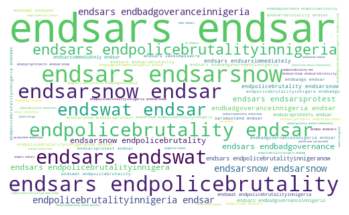

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from wordcloud import STOPWORDS
wc = WordCloud(background_color="white", max_words=2000,
               stopwords=STOPWORDS, max_font_size=256,
               random_state=42, width=500, height=300)
wc.generate(data_in.hashtags.to_string())
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
def preprocess_tweet(message):
    text = str(message)
    text = p.clean(text)
    return text
def remove_newline(message):
  return re.sub('\n', ' ', str(message.lower()))
def remove_symbols(message):
  re.sub(r'^\x00-\x7F+', ' ', message)
  return re.sub(r'[@!.,(\/&)?:#*...-;'']', '', str(message)) 
def remove_urls(message):
  return re.sub(r'http\S+', '', str(message))
# Remove emoji
from unicodedata import normalize
def remove_nonascii(message):
  unicode_norm = normalize('NFD', message).encode('ascii', 'ignore')
  return unicode_norm.decode('UTF-8')
 
def prep_message(message):
  message = preprocess_tweet(message)
  message = remove_urls(message)
  message = remove_symbols(message)
  message = remove_newline(message)
  message = remove_nonascii(message)
  return message

In [ ]:
!pip install tweet-preprocessor 
import preprocessor as p

In [ ]:
data_in['cleaned_tweets']=[prep_message(word) for word in data_in['tweet']]
data_in['cleaned_tweets']

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


0         the key to escape sars is wearing your faded s...
1         you see that go be like example when nigeria y...
2                                                i am tired
3         your officers are asking for war this is robbe...
4         i know some of the sars guys from the state ci...
                                ...                        
332366                                      manamashuga-tam
332367                               inshallahallah is wise
332368    allah knows all look in your hand and your hea...
332369                                                     
332370    the star of sirius shines brightestin the sky ...
Name: cleaned_tweets, Length: 319816, dtype: object

In [ ]:
data_in['cleaned_tweets'].duplicated().sum()

115320

In [ ]:
data_in['cleaned_tweets'].isna().sum()

0

In [ ]:
data_in['cleaned_tweets'].replace('', np.nan, inplace=True)
data_in['cleaned_tweets'].isna().sum()

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6610: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


84620

In [ ]:
data_in['cleaned_tweets'].replace(' ', np.nan, inplace=True)
data_in['cleaned_tweets'].isna().sum()

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6610: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


84671

In [ ]:
# Extract nan rows
data_in.loc[data_in['cleaned_tweets'].isna(), :]

,tweet_id,location,place_latitude,place_longitude,country_code,account_creation_time,tweet_time,tweet,geometry,retweeted,mentioned,hashtags,cleaned_tweets,tweet_lower,search_irrelevant_data
16,1.312344e+18,"New York, NY",40.781,-73.969,US,2020-07-04 18:43:50,2020-10-03 10:49:59,#EndSARSNOW,POINT (-73.96899999999999 40.781),[],[],#endsarsnow,NaN,#endsarsnow,False
27,1.312352e+18,"Lagos, Nigeria",6.493,3.339,NG,2014-08-04 19:04:27,2020-10-03 11:23:02,#EndSARS,POINT (3.339 6.492999999999999),[],[],#endsars,NaN,#endsars,False
28,1.312352e+18,"Lagos, Nigeria",6.493,3.339,NG,2014-08-04 19:04:27,2020-10-03 11:23:09,#EndSARS,POINT (3.339 6.492999999999999),[],[],#endsars,NaN,#endsars,False
29,1.312353e+18,"Lagos, Nigeria",6.493,3.339,NG,2014-08-04 19:04:27,2020-10-03 11:23:19,#EndSARS,POINT (3.339 6.492999999999999),[],[],#endsars,NaN,#endsars,False
30,1.312353e+18,"Lagos, Nigeria",6.493,3.339,NG,2014-08-04 19:04:27,2020-10-03 11:23:30,#EndSARS,POINT (3.339 6.492999999999999),[],[],#endsars,NaN,#endsars,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332341,1.344706e+18,"Austin, TX",31.169,-100.077,US,2013-08-10 08:23:02,2020-12-31 18:03:14,#endsars,POINT (-100.077 31.169),[],[],#endsars,NaN,#endsars,False
332345,1.344729e+18,"Toronto, Ontario",43.629,-79.273,CA,2012-04-20 19:41:57,2020-12-31 19:37:06,#EndSARS,POINT (-79.273 43.629),[],[],#endsars,NaN,#endsars,False
332354,1.344755e+18,NaN,6.493,3.339,NG,2019-09-07 06:52:51,2020-12-31 21:20:30,#Endsars,POINT (3.339 6.492999999999999),[],[],#endsars,NaN,#endsars,False
332360,1.344790e+18,Lagos,6.591,3.318,NG,2009-04-17 15:03:12,2020-12-31 23:37:53,#EndSARS,POINT (3.318 6.591),[],[],#endsars,NaN,#endsars,False


In [ ]:
data_in.dropna(subset=['cleaned_tweets'], inplace=True)
data_in.shape

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


(235145, 15)

In [ ]:
data_in['cleaned_tweets'].duplicated().sum()

30651

In [ ]:

# Extract duplicate rows
data_in.loc[data_in['cleaned_tweets'].duplicated(), :]

,tweet_id,location,place_latitude,place_longitude,country_code,account_creation_time,tweet_time,tweet,geometry,retweeted,mentioned,hashtags,cleaned_tweets,tweet_lower,search_irrelevant_data
142,1.312410e+18,Lagos,6.591,3.318,NG,2011-05-13 13:17:10,2020-10-03 15:11:34,To order dm/WhatsApp or call 08157555629\n\n#C...,POINT (3.318 6.591),[],[],"#checry,#smoothindependence,#infamouschallenge...",to order dmwhatsapp or call,to order dm/whatsapp or call 08157555629 #che...,False
156,1.312415e+18,"Lagos, Nigeria",6.493,3.339,NG,2015-01-29 20:25:58,2020-10-03 15:32:14,#EndSarsNow #EndSARSBrutality\n#EndSarsNow #En...,POINT (3.339 6.492999999999999),[],[],"#endsarsnow,#endsarsbrutality,#endsarsnow,#end...",it on,#endsarsnow #endsarsbrutality #endsarsnow #end...,False
328,1.312449e+18,"Lagos, Nigeria",6.591,3.318,NG,2011-05-09 01:59:02,2020-10-03 17:46:55,#EndSARS now @ProfOsinbajo @MBuhari @NGRSenate,POINT (3.318 6.591),[],"[@ProfOsinbajo, @MBuhari, @NGRSenate]",#endsars,now,#endsars now @profosinbajo @mbuhari @ngrsenate,False
745,1.312491e+18,F.C.T,9.074,7.4239999999999995,NG,2011-12-06 21:38:16,2020-10-03 20:33:49,@kanyewest #ENDSARS #ENDSARS #ENDSARS \nWE NEE...,POINT (7.423999999999999 9.074),[],[@kanyewest],"#endsars,#endsars,#endsars",we need help,@kanyewest #endsars #endsars #endsars we need...,False
748,1.312491e+18,F.C.T,9.074,7.4239999999999995,NG,2011-12-06 21:38:16,2020-10-03 20:35:04,@cnni #ENDSARS #ENDSARS #ENDSARS \nWE NEED HELP🇳🇬,POINT (7.423999999999999 9.074),[],[@cnni],"#endsars,#endsars,#endsars",we need help,@cnni #endsars #endsars #endsars we need help🇳🇬,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332281,1.344364e+18,"Surulere, Nigeria",6.493,3.339,NG,2019-09-06 06:32:12,2020-12-30 19:24:58,#TuleChallenge #COVIDIOT #fearwomen #trashy #P...,POINT (3.339 6.492999999999999),[],[],"#tulechallenge,#covidiot,#fearwomen,#trashy,#p...",merry christmas,#tulechallenge #covidiot #fearwomen #trashy #p...,False
332303,1.344575e+18,"Port Harcourt, Abuja, Nigeria",9.074,7.424,NG,2012-08-08 06:32:16,2020-12-31 09:25:31,I think for the 1st time in years. Nigerians a...,POINT (7.423999999999999 9.074),[],[],#endsars,i think for the st time in years nigerians are...,i think for the 1st time in years. nigerians a...,False
332322,1.344615e+18,Morocco & UK,6.245,7.002,NG,2009-02-03 14:49:24,2020-12-31 12:02:10,🖤THE MOVEMENT IS WINNING🖤\nLet’s keep our eyes...,POINT (7.002000000000001 6.245),[],[],"#radicalkindness,#radicalresponsibility,#afric...",the movement is winninglets keep our eyes on t...,🖤the movement is winning🖤 let’s keep our eyes ...,False
332333,1.344643e+18,Morocco & UK,6.245,7.002,NG,2009-02-03 14:49:24,2020-12-31 13:54:22,🖤THE MOVEMENT IS WINNING🖤\nLet’s keep our eyes...,POINT (7.002000000000001 6.245),[],[],"#radicalkindness,#radicalresponsibility,#afric...",the movement is winninglets keep our eyes on t...,🖤the movement is winning🖤 let’s keep our eyes ...,False


In [ ]:
print(data_in.shape)
data_in.drop_duplicates(subset=['cleaned_tweets'],inplace=True)
data_in.shape

(235145, 15)


/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


(204494, 15)

In [ ]:
data_in.isna().sum()

tweet_id                      1
location                  21353
place_latitude               13
place_longitude              13
country_code                105
account_creation_time         0
tweet_time                    0
tweet                         0
geometry                      1
retweeted                     0
mentioned                     0
hashtags                      0
cleaned_tweets                0
tweet_lower                   0
search_irrelevant_data        0
dtype: int64

In [ ]:
data_in.loc[data_in['tweet_id'].isna(), :]

,tweet_id,location,place_latitude,place_longitude,country_code,account_creation_time,tweet_time,tweet,geometry,retweeted,mentioned,hashtags,cleaned_tweets,tweet_lower,search_irrelevant_data
31957,NaN,6.442,3.502,NG,2011-09-09 13:11:39,2020-10-09 20:34:09,A message to @CocaCola. #EndSarsNow #EndSARSIm...,POINT (3.502 6.442),NaN,[],[],,point,point (3.502 6.442),False


In [ ]:
data_in.dropna(subset=['tweet_id'], inplace=True)
data_in.shape

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


(204493, 15)

In [ ]:
data_in.drop(data_in[data_in['cleaned_tweets']== 'rt'].index,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4908: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
data_in.shape

(204492, 15)

In [ ]:
data_in.to_csv("EndSARS_data_in.csv", index = False)
from google.colab import files
files.download("EndSARS_data_in.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# start here

In [ ]:
data_in = pd.read_csv('/content/drive/MyDrive/EndSARs tweets with Dr Elaine/EndSARS_data_in.csv')
data_in

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,2,3,14) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,tweet_id,location,place_latitude,place_longitude,country_code,account_creation_time,tweet_time,tweet,geometry,retweeted,mentioned,hashtags,cleaned_tweets,tweet_lower,search_irrelevant_data
0,1.3121e+18,"Lagos, Nigeria",6.493,3.339,NG,2018-02-10 05:50:23,2020-10-02 18:59:34,The key to escape SARS is wearing your faded s...,POINT (3.339 6.492999999999999),[],[],#endsars,the key to escape sars is wearing your faded s...,the key to escape sars is wearing your faded s...,False
1,1.31227e+18,oº°˚º°˚Wº°˚º°˚o,6.591,3.318,NG,2010-12-25 05:32:42,2020-10-03 05:56:07,You see that #BlackLivesMatter go be like exam...,POINT (3.318 6.591),[],[],"#blacklivesmatter,#sarsbrutality,#policebrutal...",you see that go be like example when nigeria y...,you see that #blacklivesmatter go be like exam...,False
2,1.31229e+18,Lagos X Ilorin,6.493,3.339,NG,2017-11-27 08:47:42,2020-10-03 07:16:39,I AM TIRED #EndSARS,POINT (3.339 6.492999999999999),[],[],#endsars,i am tired,i am tired #endsars,False
3,1.31229e+18,"Lekki, Nigeria",6.442,3.502,NG,2012-07-08 22:20:03,2020-10-03 07:24:43,@PoliceNG_CRU your officers are asking for war...,POINT (3.502 6.442),[],['@PoliceNG_CRU'],#endsars,your officers are asking for war this is robbe...,@policeng_cru your officers are asking for war...,False
4,1.3123e+18,NaN,9.074,7.424,NG,2019-07-19 06:48:55,2020-10-03 07:37:07,I know some of the SARS guys from the State CI...,POINT (7.423999999999999 9.074),[],[],"#sarsalert,#endsars,#sars",i know some of the sars guys from the state ci...,i know some of the sars guys from the state ci...,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214734,1.33358e+18,$citzjustice (kush🎶love),33.501,-117.12,US,2020-05-10 20:38:06,2020-12-01 01:14:25,Exactly correct brother; the world's justice s...,POINT (-117.12 33.501),[],[],"#truth,#endsars",exactly correct brother the world's justice sy...,exactly correct brother; the world's justice s...,False
214735,1.33358e+18,$citzjustice (kush🎶love),33.501,-117.12,US,2020-05-10 20:38:06,2020-12-01 01:16:15,Man❤️am🥰ashuga-tam😗🙏❤️🌹😇🎶#EndSARS,POINT (-117.12 33.501),[],[],#endsars,manamashuga-tam,man❤️am🥰ashuga-tam😗🙏❤️🌹😇🎶#endsars,False
214736,1.33358e+18,$citzjustice (kush🎶love),33.501,-117.12,US,2020-05-10 20:38:06,2020-12-01 01:18:34,🙏Inshallah🙏🌹❤️Allah is wise. #EndSARS,POINT (-117.12 33.501),[],[],#endsars,inshallahallah is wise,🙏inshallah🙏🌹❤️allah is wise. #endsars,False
214737,1.33358e+18,$citzjustice (kush🎶love),33.501,-117.12,US,2020-05-10 20:38:06,2020-12-01 01:20:11,@PK_Defend @F_BALOCHI1 @PTIofficial @ImranKhan...,POINT (-117.12 33.501),[],"['@PK_Defend', '@F_BALOCHI1', '@PTIofficial', ...",#endsars,allah knows all look in your hand and your hea...,@pk_defend @f_balochi1 @ptiofficial @imrankhan...,False


In [ ]:
data_in.loc[data_in['tweet'].isna()]

,tweet_id,location,place_latitude,place_longitude,country_code,account_creation_time,tweet_time,tweet,geometry,retweeted,mentioned,hashtags,cleaned_tweets,tweet_lower,search_irrelevant_data
120826,"#EndSARS""",POINT (8.407 9.052999999999999),[],[],#endsars,the bland and timid masses,the,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120827,"#EndSARS""",POINT (8.407 9.052999999999999),[],[],#endsars,the bland and timid masses,the,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120828,"#EndSARS""",POINT (8.407 9.052999999999999),[],[],#endsars,the bland and timid masses,the,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120829,"#EndSARS""",POINT (8.407 9.052999999999999),[],[],#endsars,the bland and timid masses,the,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120830,"#EndSARS""",POINT (8.407 9.052999999999999),[],[],#endsars,the bland and timid masses,the,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131068,"#EndSARS""",POINT (8.407 9.052999999999999),[],[],#endsars,the bland and timid masses,the,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131069,"#EndSARS""",POINT (8.407 9.052999999999999),[],[],#endsars,the bland and timid masses,the,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131070,"#EndSARS""",POINT (8.407 9.052999999999999),[],[],#endsars,the bland and timid masses,the,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131071,"#EndSARS""",POINT (8.407 9.052999999999999),[],[],#endsars,the bland and timid masses,the,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data_in.isna().sum()

tweet_id                      0
location                  21353
place_latitude               14
place_longitude              14
country_code                106
account_creation_time         1
tweet_time                    1
tweet                     10247
geometry                  10247
retweeted                 10247
mentioned                 10247
hashtags                  10247
cleaned_tweets            10247
tweet_lower               10247
search_irrelevant_data    10248
dtype: int64

In [ ]:
data_in.dropna(subset=['cleaned_tweets'], inplace=True)
data_in.isna().sum()

tweet_id                      0
location                  21353
place_latitude               13
place_longitude              13
country_code                105
account_creation_time         0
tweet_time                    0
tweet                         0
geometry                      0
retweeted                     0
mentioned                     0
hashtags                      0
cleaned_tweets                0
tweet_lower                   0
search_irrelevant_data        1
dtype: int64

In [ ]:
data_in[data_in['search_irrelevant_data'].isna()]

,tweet_id,location,place_latitude,place_longitude,country_code,account_creation_time,tweet_time,tweet,geometry,retweeted,mentioned,hashtags,cleaned_tweets,tweet_lower,search_irrelevant_data
120825,1.3177208908015944e+18,"Andaha, Nigeria",9.053,8.407,NG,2018-06-15 02:44:01,2020-10-18 06:55:17,the\r bland and timid masses.\n#EndSARS,POINT (8.407 9.052999999999999),[],[],#endsars,the bland and timid masses,the,NaN


In [ ]:
data_in.dropna(subset=['search_irrelevant_data'], inplace=True)
data_in.isna().sum()

tweet_id                      0
location                  21353
place_latitude               13
place_longitude              13
country_code                105
account_creation_time         0
tweet_time                    0
tweet                         0
geometry                      0
retweeted                     0
mentioned                     0
hashtags                      0
cleaned_tweets                0
tweet_lower                   0
search_irrelevant_data        0
dtype: int64

In [ ]:
data_in['cleaned_tweets'].duplicated().sum()

0

# Other Analysis

In [ ]:
data_in['tweet_date']= pd.to_datetime(data_in['tweet_time']).dt.date
data_in['tweet_time_'] = pd.to_datetime(data_in['tweet_time']).dt.time

In [ ]:
lekki_massacre_date = pd.to_datetime("2020-10-20").date()
lekki_massacre_time = pd.to_datetime("18:50:00").time()
#data_in.loc[data_in['tweet_date']== lekki_massacre_date]
lekki_massacre_tweets = data_in.loc[(data_in['tweet_date']== lekki_massacre_date) & (data_in['tweet_time_']> lekki_massacre_time)]

In [ ]:
tweets_on_Oct20_before_lekki_massacre = data_in.loc[(data_in['tweet_date']== lekki_massacre_date) & (data_in['tweet_time_']< lekki_massacre_time)]
tweets_on_Oct20_before_lekki_massacre 

,tweet_id,location,place_latitude,place_longitude,country_code,account_creation_time,tweet_time,tweet,geometry,retweeted,mentioned,hashtags,cleaned_tweets,tweet_lower,search_irrelevant_data,processed_docs,tweet_date,tweet_time_
158484,1.318341166790824e+18,"Abuja, Nigeria",6.591,3.318,NG,2018-06-22 23:45:56,2020-10-20 00:00:02,Lagos City #EndSARS q,POINT (3.318 6.591),[],[],#endsars,lagos city q,lagos city #endsars q,False,lagos city,2020-10-20,00:00:02
158485,1.3183412001648517e+18,At the top,6.493,3.339,NG,2012-05-12 09:18:42,2020-10-20 00:00:10,I'm still awake.\n\n#EndSARS,POINT (3.339 6.492999999999999),[],[],#endsars,i'm still awake,i'm still awake. #endsars,False,awake,2020-10-20,00:00:10
158486,1.318341233685762e+18,"Lagos, Nigeria",6.484,3.169,NG,2018-05-10 02:12:20,2020-10-20 00:00:18,This true 💯 💯 💯 let's keep the hashtags trendi...,POINT (3.169 6.484),[],[],"#endsars,#endswat,#endpolicebrutalityinnigeria...",this true let's keep the hashtags trending,this true 💯 💯 💯 let's keep the hashtags trendi...,False,true hashtags trending,2020-10-20,00:00:18
158487,1.318341320520405e+18,"Lagos, Nigeria",6.526,3.3,NG,2015-07-03 22:55:57,2020-10-20 00:00:39,You can't take the lens from me. I'll keep pro...,POINT (3.3 6.526),[],[],"#policebrutality,#endsars",you can't take the lens from me i'll keep prot...,you can't take the lens from me. i'll keep pro...,False,lens protesting nonchalant attitude police ins...,2020-10-20,00:00:39
158488,1.3183413414667346e+18,"Abuja, Nigeria",6.591,3.318,NG,2018-06-22 23:45:56,2020-10-20 00:00:44,Na so so talk you Dey talk! Just do it already...,POINT (3.318 6.591),[],[],#endsars,na so so talk you dey talk just do it already,na so so talk you dey talk! just do it already...,False,talk dey talk,2020-10-20,00:00:44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170858,1.318625508909863e+18,"Warri, Nigeria",5.552,5.781,NG,2017-06-12 20:33:40,2020-10-20 18:49:54,Heard peaceful protests are being shot at lekk...,POINT (5.781000000000001 5.552),[],"['@CNNAfrica', '@realDonaldTrump', '@BBCAfrica...",#endsars,heard peaceful protests are being shot at lekk...,heard peaceful protests are being shot at lekk...,False,heard peaceful protest shot lekki toll gate re...,2020-10-20,18:49:54
170859,1.3186255127476634e+18,NaN,9.074,7.424,NG,2019-03-20 18:14:56,2020-10-20 18:49:55,Now we know why there’s so much violence in Ni...,POINT (7.423999999999999 9.074),[],[],"#endsars,#endbadgovernanceinnigeria",now we know why theres so much violence in nig...,now we know why there’s so much violence in ni...,False,know there violence clown leader sponsor,2020-10-20,18:49:55
170860,1.3186255153061642e+18,"Lagos, Nigeria",6.493,3.339,NG,2015-06-07 17:31:00,2020-10-20 18:49:56,Why all this #EndSARS,POINT (3.339 6.492999999999999),[],[],#endsars,why all this,why all this #endsars,False,,2020-10-20,18:49:56
170861,1.3186255259681014e+18,Nigeria,6.534,3.528,NG,2013-07-23 17:52:45,2020-10-20 18:49:58,I just want to leave this country 😭😭😭😭😭\n#EndS...,POINT (3.528 6.534),[],[],"#endsars,#endbadgoveranceinnigeria",i just want to leave this country,i just want to leave this country 😭😭😭😭😭 #endsa...,False,leave country,2020-10-20,18:49:58


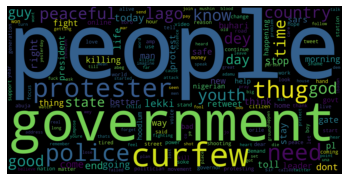

In [ ]:
from wordcloud import WordCloud
all_text = tweets_on_Oct20_before_lekki_massacre['processed_docs'].to_string()
#data_lemmatized_before_lekki_massacre = lemmatization(all_text, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
wordcloud = WordCloud(scale=10,collocations=False,max_words=500,max_font_size=500).generate(all_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
tweets_oct20_before_evening = tweets_on_Oct20_before_lekki_massacre['processed_docs']
word_list_oct20_before_evening = [word for line in tweets_oct20_before_evening for word in line.split()]
print('2Oth October before evening',word_list_oct20_before_evening[:20])

2Oth October before evening ['lagos', 'city', 'awake', 'true', 'hashtags', 'trending', 'lens', 'protesting', 'nonchalant', 'attitude', 'police', 'institution', 'talk', 'dey', 'talk', 'whats', 'cry', 'loud', 'capital', 'kaii']


,word,frq
0,people,1142
1,protester,1018
2,government,992
3,curfew,801
4,peaceful,719
5,police,712
6,thug,698
7,need,597
8,country,582
9,youth,522


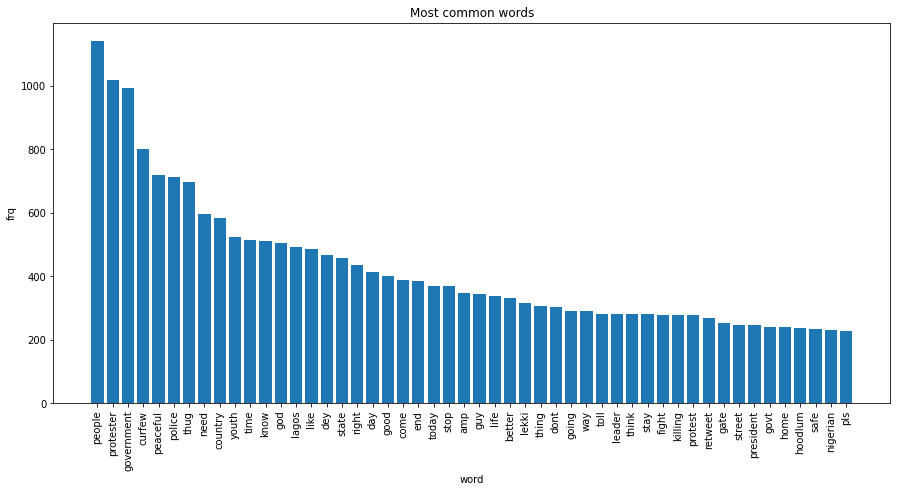

In [ ]:
# creating dataframe and bar graph of most common 50 words with their frequency
from collections import Counter
word_counts=Counter(word_list_oct20_before_evening).most_common(50)
word_df=pd.DataFrame(word_counts)
word_df.columns=['word','frq']
display(word_df.head(10))
# px=import plotly.express
#px.bar(word_df,x='word',y='frq',title='Most common words')

fig = plt.figure(figsize = (15, 7))
 
# creating the bar plot
plt.bar(word_df['word'],word_df['frq'])
plt.xticks(rotation=90)
plt.xlabel('word')
plt.ylabel('frq')
plt.title('Most common words')
plt.show()

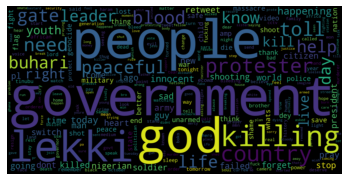

In [ ]:
from wordcloud import WordCloud
all_text = lekki_massacre_tweets['processed_docs'].to_string()
wordcloud = WordCloud(scale=10,collocations=False,max_words=500,max_font_size=500).generate(all_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
tweets_oct20_evening = lekki_massacre_tweets['processed_docs']
word_list_oct20_evening = [word for line in tweets_oct20_evening for word in line.split()]
print('2Oth October evening',word_list_oct20_evening[:20])

2Oth October evening ['fear', 'feed', 'fear', 'history', 'shown', 'people', 'prevail', 'guy', 'let', 'retweet', 'end', 'madness', 'sense', 'politician', 'switched', 'light', 'blood', 'bath', 'home', 'family']


,word,frq
0,people,774
1,protester,715
2,government,707
3,lekki,593
4,killing,560
5,god,521
6,country,494
7,peaceful,488
8,toll,441
9,gate,392


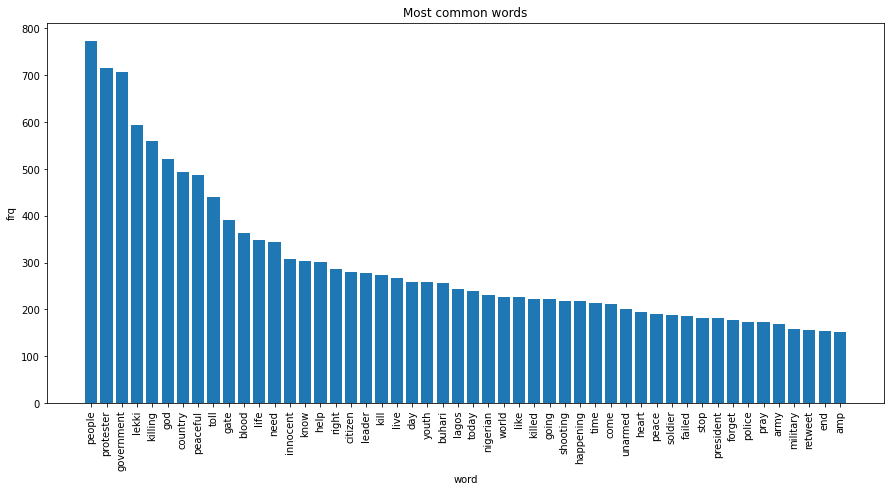

In [ ]:
# creating dataframe and bar graph of most common 50 words with their frequency
from collections import Counter
word_counts=Counter(word_list_oct20_evening).most_common(50)
word_df=pd.DataFrame(word_counts)
word_df.columns=['word','frq']
display(word_df.head(10))
# px=import plotly.express
#px.bar(word_df,x='word',y='frq',title='Most common words')

fig = plt.figure(figsize = (15, 7))
 
# creating the bar plot
plt.bar(word_df['word'],word_df['frq'])
plt.xticks(rotation=90)
plt.xlabel('word')
plt.ylabel('frq')
plt.title('Most common words')
plt.show()

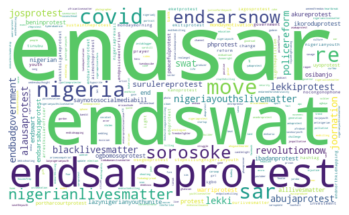

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from wordcloud import STOPWORDS
wc = WordCloud(background_color="white", max_words=2000,
               stopwords=STOPWORDS, max_font_size=256,
               random_state=42, width=500, height=300)
wc.generate(popular_hashtags.hashtag.to_string())
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

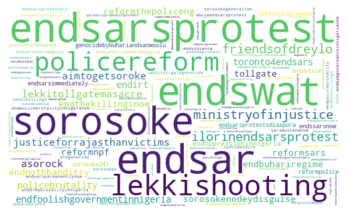

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from wordcloud import STOPWORDS
wc = WordCloud(background_color="white", max_words=2000,
               stopwords=STOPWORDS, max_font_size=256,
               random_state=42, width=500, height=300)
wc.generate(all_relevant_tags.to_string())
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

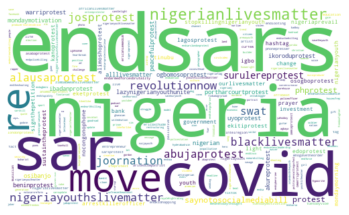

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from wordcloud import STOPWORDS
wc = WordCloud(background_color="white", max_words=2000,
               stopwords=STOPWORDS, max_font_size=256,
               random_state=42, width=500, height=300)
wc.generate(irrelevant_tags.to_string())
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
from PIL import Image
import numpy as np

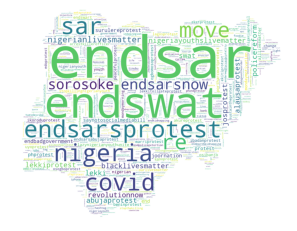

In [ ]:
mask = np.array(Image.open('/content/drive/MyDrive/EndSARs tweets with Dr Elaine/Map_of_Nigerian_States_with_names.png'))
wc = WordCloud(stopwords=STOPWORDS,
               mask=mask, background_color="white",
               max_words=2000, max_font_size=300,
               random_state=42, width=mask.shape[1],
               height=mask.shape[0])
wc.generate(popular_hashtags.hashtag.to_string())
plt.imshow(wc,)
plt.axis('off')
plt.show()

# Topic modelling

In [ ]:
%%capture
!pip install pyLDAvis
import re, nltk, spacy, string

from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from pprint import pprint

#import pandas as pd
import pyLDAvis
import pyLDAvis.sklearn
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from plotly.offline import plot
import plotly.graph_objects as go
import plotly.express as px

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from gensim.corpora.dictionary import Dictionary
from nltk.tokenize import word_tokenize
import gensim

In [ ]:
WNlemma = nltk.WordNetLemmatizer()
def lemmatize_stemming(message):
    return WNlemma.lemmatize(message)

In [ ]:
from gensim.parsing.preprocessing import STOPWORDS
all_stopwords_gensim = STOPWORDS.union(set(['nigeria', 'nigerian','protest','let','want',u'\'s']))

In [ ]:
def preprocess(message):
  result = [lemmatize_stemming(word) for word in gensim.utils.simple_preprocess(message) if not word in all_stopwords_gensim and len(word) > 2]
  return (" ").join(result)

In [ ]:
data_in['processed_docs'] = data_in['cleaned_tweets'].map(preprocess)
data_in[:10]

,tweet_id,location,place_latitude,place_longitude,country_code,account_creation_time,tweet_time,tweet,geometry,retweeted,mentioned,hashtags,cleaned_tweets,tweet_lower,search_irrelevant_data,processed_docs
0,1312104957391237120.0,"Lagos, Nigeria",6.493,3.339,NG,2018-02-10 05:50:23,2020-10-02 18:59:34,The key to escape SARS is wearing your faded s...,POINT (3.339 6.492999999999999),[],[],#endsars,the key to escape sars is wearing your faded s...,the key to escape sars is wearing your faded s...,False,key escape sars wearing faded shirt jean rubbe...
1,1312270183487152128.0,oº°˚º°˚Wº°˚º°˚o,6.591,3.318,NG,2010-12-25 05:32:42,2020-10-03 05:56:07,You see that #BlackLivesMatter go be like exam...,POINT (3.318 6.591),[],[],"#blacklivesmatter,#sarsbrutality,#policebrutal...",you see that go be like example when nigeria y...,you see that #blacklivesmatter go be like exam...,False,like example youth finally turn extortion
2,1312290451370762240.0,Lagos X Ilorin,6.493,3.339,NG,2017-11-27 08:47:42,2020-10-03 07:16:39,I AM TIRED #EndSARS,POINT (3.339 6.492999999999999),[],[],#endsars,i am tired,i am tired #endsars,False,tired
3,1312292483670462464.0,"Lekki, Nigeria",6.442,3.502,NG,2012-07-08 22:20:03,2020-10-03 07:24:43,@PoliceNG_CRU your officers are asking for war...,POINT (3.502 6.442),[],['@PoliceNG_CRU'],#endsars,your officers are asking for war this is robbe...,@policeng_cru your officers are asking for war...,False,officer asking war robbery featured bbc cnn di...
4,1312295604123467776.0,NaN,9.074,7.424,NG,2019-07-19 06:48:55,2020-10-03 07:37:07,I know some of the SARS guys from the State CI...,POINT (7.423999999999999 9.074),[],[],"#sarsalert,#endsars,#sars",i know some of the sars guys from the state ci...,i know some of the sars guys from the state ci...,False,know sars guy state cid help dont drag try run...
5,1312299487486976000.0,🇳🇬,6.493,3.339,NG,2011-07-12 16:37:27,2020-10-03 07:52:33,@sars_is_here @sars_watch @segalink @PoliceNG ...,POINT (3.339 6.492999999999999),[],"['@sars_is_here', '@sars_watch', '@segalink', ...",#endsarsnow,tag alongside let report the situation until i...,@sars_is_here @sars_watch @segalink @policeng ...,False,tag alongside report situation resolved
6,1312307496330104832.0,NaN,6.591,3.318,NG,2020-09-27 12:11:20,2020-10-03 08:24:23,Even if they are criminals they are to be judg...,POINT (3.318 6.591),[],['@MBuhari'],"#endsars,#endsarsnow,#endsarsbrutality",even if they are criminals they are to be judg...,even if they are criminals they are to be judg...,False,criminal judged law stop brutality stop unnece...
7,1312319106956304384.0,🇳🇬🇬🇭,9.043,8.672,NG,2011-12-13 19:11:17,2020-10-03 09:10:31,@MBuhari @NGRPresident \nIs this what it has c...,POINT (8.672000000000001 9.042999999999999),[],"['@MBuhari', '@NGRPresident']","#endsars,#endsarsbrutality",is this what it has come to innocent and legit...,@mbuhari @ngrpresident is this what it has co...,False,come innocent legitimate cryptocurrency trader...
8,1312327918257876992.0,🇳🇬🇬🇭,4.825,7.031,NG,2011-12-13 19:11:17,2020-10-03 09:45:32,#EndSARS \nThat's the tweet.,POINT (7.031000000000001 4.825),[],[],#endsars,that's the tweet,#endsars that's the tweet.,False,tweet
9,1312333526801567488.0,"Abuja, Nigeria.9.0765° N,7.398",8.942,7.253,NG,2013-09-27 18:47:29,2020-10-03 10:07:49,I prefer to be rubbed by Arm robbers than SARZ...,POINT (7.252999999999999 8.942),[],[],#endsars,i prefer to be rubbed by arm robbers than sarz...,i prefer to be rubbed by arm robbers than sarz...,False,prefer rubbed arm robber sarz imagine harassed...


In [ ]:
data_in

,tweet_id,location,place_latitude,place_longitude,country_code,account_creation_time,tweet_time,tweet,geometry,retweeted,mentioned,hashtags,cleaned_tweets,tweet_lower,search_irrelevant_data,processed_docs,tweet_date,tweet_time_
0,1312104957391237120.0,"Lagos, Nigeria",6.493,3.339,NG,2018-02-10 05:50:23,2020-10-02 18:59:34,The key to escape SARS is wearing your faded s...,POINT (3.339 6.492999999999999),[],[],#endsars,the key to escape sars is wearing your faded s...,the key to escape sars is wearing your faded s...,False,key escape sars wearing faded shirt jean rubbe...,2020-10-02,18:59:34
1,1312270183487152128.0,oº°˚º°˚Wº°˚º°˚o,6.591,3.318,NG,2010-12-25 05:32:42,2020-10-03 05:56:07,You see that #BlackLivesMatter go be like exam...,POINT (3.318 6.591),[],[],"#blacklivesmatter,#sarsbrutality,#policebrutal...",you see that go be like example when nigeria y...,you see that #blacklivesmatter go be like exam...,False,like example youth finally turn extortion,2020-10-03,05:56:07
2,1312290451370762240.0,Lagos X Ilorin,6.493,3.339,NG,2017-11-27 08:47:42,2020-10-03 07:16:39,I AM TIRED #EndSARS,POINT (3.339 6.492999999999999),[],[],#endsars,i am tired,i am tired #endsars,False,tired,2020-10-03,07:16:39
3,1312292483670462464.0,"Lekki, Nigeria",6.442,3.502,NG,2012-07-08 22:20:03,2020-10-03 07:24:43,@PoliceNG_CRU your officers are asking for war...,POINT (3.502 6.442),[],['@PoliceNG_CRU'],#endsars,your officers are asking for war this is robbe...,@policeng_cru your officers are asking for war...,False,officer asking war robbery featured bbc cnn di...,2020-10-03,07:24:43
4,1312295604123467776.0,NaN,9.074,7.424,NG,2019-07-19 06:48:55,2020-10-03 07:37:07,I know some of the SARS guys from the State CI...,POINT (7.423999999999999 9.074),[],[],"#sarsalert,#endsars,#sars",i know some of the sars guys from the state ci...,i know some of the sars guys from the state ci...,False,know sars guy state cid help dont drag try run...,2020-10-03,07:37:07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214734,1333580178371481600.0,$citzjustice (kush🎶love),33.501,-117.12,US,2020-05-10 20:38:06,2020-12-01 01:14:25,Exactly correct brother; the world's justice s...,POINT (-117.12 33.501),[],[],"#truth,#endsars",exactly correct brother the world's justice sy...,exactly correct brother; the world's justice s...,False,exactly correct brother world justice rigged l...,2020-12-01,01:14:25
214735,1333580639988187136.0,$citzjustice (kush🎶love),33.501,-117.12,US,2020-05-10 20:38:06,2020-12-01 01:16:15,Man❤️am🥰ashuga-tam😗🙏❤️🌹😇🎶#EndSARS,POINT (-117.12 33.501),[],[],#endsars,manamashuga-tam,man❤️am🥰ashuga-tam😗🙏❤️🌹😇🎶#endsars,False,manamashuga tam,2020-12-01,01:16:15
214736,1333581222505705472.0,$citzjustice (kush🎶love),33.501,-117.12,US,2020-05-10 20:38:06,2020-12-01 01:18:34,🙏Inshallah🙏🌹❤️Allah is wise. #EndSARS,POINT (-117.12 33.501),[],[],#endsars,inshallahallah is wise,🙏inshallah🙏🌹❤️allah is wise. #endsars,False,inshallahallah wise,2020-12-01,01:18:34
214737,1333581627327320064.0,$citzjustice (kush🎶love),33.501,-117.12,US,2020-05-10 20:38:06,2020-12-01 01:20:11,@PK_Defend @F_BALOCHI1 @PTIofficial @ImranKhan...,POINT (-117.12 33.501),[],"['@PK_Defend', '@F_BALOCHI1', '@PTIofficial', ...",#endsars,allah knows all look in your hand and your hea...,@pk_defend @f_balochi1 @ptiofficial @imrankhan...,False,allah know look hand heart hath left man allah...,2020-12-01,01:20:11


In [ ]:
vectorizer = CountVectorizer(analyzer='word',       
                             min_df=20,
                             max_df=0.9,                 # minimum required occurences of a word 
                             stop_words='english',             # remove stop words
                             #lowercase=True,                   # convert all words to lowercase
                             token_pattern='[a-zA-Z0-9]{3,}',  # num chars > 3
                             max_features=5000,             # max number of unique words. Build a vocabulary that only consider the top max_features ordered by term frequency across the corpus
                            )

data_vectorized = vectorizer.fit_transform(data_in['processed_docs'])

lda_model = LatentDirichletAllocation(n_components=6, # Number of topics
                                      learning_method='online',
                                      random_state=0,       
                                      n_jobs = -1  # Use all available CPUs
                                     )
lda_output = lda_model.fit_transform(data_vectorized)

In [ ]:
pyLDAvis.enable_notebook()
pyLDAvis.sklearn.prepare(lda_model, data_vectorized, vectorizer, mds='tsne')

PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
3       1.465019 -47.625065       1        1  18.268039
2      54.854797 -36.476795       2        1  17.503116
5      32.212929 -61.444572       3        1  16.392021
0       5.111096 -14.110332       4        1  16.199167
4      26.350170 -33.374702       5        1  15.957455
1      38.109818  -7.222781       6        1  15.680202, topic_info=            Term          Freq         Total Category  logprob  loglift
1242         dey   8069.000000   8069.000000  Default  30.0000  30.0000
1917         god   7736.000000   7736.000000  Default  29.0000  29.0000
1945  government  11217.000000  11217.000000  Default  28.0000  28.0000
3486   protester  10115.000000  10115.000000  Default  27.0000  27.0000
3339      police  10362.000000  10362.000000  Default  26.0000  26.0000
...          ...           ...           ...      ...      ...      ...
2004         guy   1782.813632   4894.923603   Topic6  -4.7801   0.8428
4920        work   1302.644085   2496.231601   Topic6  -5.0939   1.2024
4822       watch   1178.594527   1576.731453   Topic6  -5.1940   1.5617
4494        time   1392.243535   7951.479134   Topic6  -5.0274   0.1103
4983       youth   1420.035618  10172.637643   Topic6  -5.0077  -0.1162

[288 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
3         3  0.999438     abeg
20        4  0.999364    abuja
53        1  0.999435   action
103       3  0.999189   africa
104       4  0.999544  african
...     ...       ...      ...
4983      2  0.232781    youth
4983      3  0.003047    youth
4983      4  0.240842    youth
4983      5  0.383578    youth
4983      6  0.139590    youth

[321 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 3, 6, 1, 5, 2])

In [ ]:
def print_top_words(model, vectorizer, n_top_words):
    feature_names = vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        message = "\nTopic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()

In [ ]:
print_top_words(lda_model, vectorizer, n_top_words=35)


Topic #0: god time voice tweet help support need youth people matter life protester movement abuja home till change mean bless news speak medium dear know hero soul real great money lie sad win shall best imagine

Topic #1: amp stop come live buhari president police retweet state stay look demand guy pray curfew shame soro soke officer won safe video heard military youth time army sure work proud watch shoot governor ooo station

Topic #2: protester police people right peaceful killing life need citizen new peace sars power nigerian innocent kill stand youth country join tired child shooting fighting justice force human protect come order cause soldier lost security reform

Topic #3: government end people good thing dont think sars better know way let thug morning need day thank happening like time said protesting die rest road focus tomorrow twitter hope president brutality care coming guy action

Topic #4: country leader youth government day generation fight love man nation like sta

In [ ]:
doc_topic = pd.DataFrame(lda_model.transform(data_vectorized),columns=['Media coverage','Activism','Police Brutality','No response from public figures','Questions about moving forward/past','Lekki Massacre'])
doc_topic.head(4)

,Media coverage,Activism,Police Brutality,No response from public figures,Questions about moving forward/past,Lekki Massacre
0,0.077743,0.116719,0.011133,0.133934,0.011111,0.649361
1,0.023854,0.023845,0.023849,0.023887,0.880621,0.023944
2,0.083333,0.083333,0.583333,0.083333,0.083333,0.083333
3,0.020833,0.021013,0.145829,0.020833,0.770658,0.020833


In [ ]:
data_with_topic = data_in_sel.join(doc_topic)
data_with_topic

,tweet_id,tweet_date,tweet_time_,tweet,cleaned_tweets,processed_docs,Media coverage,Activism,Police Brutality,No response from public figures,Questions about moving forward/past,Lekki Massacre
0,1312104957391237120.0,2020-10-02,18:59:34,The key to escape SARS is wearing your faded s...,the key to escape sars is wearing your faded s...,key escape sars wearing faded shirt jean rubbe...,0.077743,0.116719,0.011133,0.133934,0.011111,0.649361
1,1312270183487152128.0,2020-10-03,05:56:07,You see that #BlackLivesMatter go be like exam...,you see that go be like example when nigeria y...,like example youth finally turn extortion,0.023854,0.023845,0.023849,0.023887,0.880621,0.023944
2,1312290451370762240.0,2020-10-03,07:16:39,I AM TIRED #EndSARS,i am tired,tired,0.083333,0.083333,0.583333,0.083333,0.083333,0.083333
3,1312292483670462464.0,2020-10-03,07:24:43,@PoliceNG_CRU your officers are asking for war...,your officers are asking for war this is robbe...,officer asking war robbery featured bbc cnn di...,0.020833,0.021013,0.145829,0.020833,0.770658,0.020833
4,1312295604123467776.0,2020-10-03,07:37:07,I know some of the SARS guys from the State CI...,i know some of the sars guys from the state ci...,know sars guy state cid help dont drag try run...,0.081222,0.886809,0.007965,0.008052,0.007956,0.007996
...,...,...,...,...,...,...,...,...,...,...,...,...
204486,1333580178371481600.0,2020-12-01,01:14:25,Exactly correct brother; the world's justice s...,exactly correct brother the world's justice sy...,exactly correct brother world justice rigged l...,0.167453,0.170942,0.231979,0.016774,0.276371,0.136481
204487,1333580639988187136.0,2020-12-01,01:16:15,Man❤️am🥰ashuga-tam😗🙏❤️🌹😇🎶#EndSARS,manamashuga-tam,manamashuga tam,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667
204488,1333581222505705472.0,2020-12-01,01:18:34,🙏Inshallah🙏🌹❤️Allah is wise. #EndSARS,inshallahallah is wise,inshallahallah wise,0.083333,0.083333,0.083333,0.083333,0.083333,0.583333
204489,1333581627327320064.0,2020-12-01,01:20:11,@PK_Defend @F_BALOCHI1 @PTIofficial @ImranKhan...,allah knows all look in your hand and your hea...,allah know look hand heart hath left man allah...,0.018665,0.132222,0.264467,0.018667,0.422277,0.143703


In [ ]:
doc_topic

,Media coverage,Activism,Police Brutality,No response from public figures,Questions about moving forward/past,Lekki Massacre
0,0.077743,0.116719,0.011133,0.133934,0.011111,0.649361
1,0.023854,0.023845,0.023849,0.023887,0.880621,0.023944
2,0.083333,0.083333,0.583333,0.083333,0.083333,0.083333
3,0.020833,0.021013,0.145829,0.020833,0.770658,0.020833
4,0.081222,0.886809,0.007965,0.008052,0.007956,0.007996
...,...,...,...,...,...,...
204486,0.167453,0.170942,0.231979,0.016774,0.276371,0.136481
204487,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667
204488,0.083333,0.083333,0.083333,0.083333,0.083333,0.583333
204489,0.018665,0.132222,0.264467,0.018667,0.422277,0.143703


In [ ]:
data_in_reset=data_in.reset_index(drop=True)

In [ ]:
top_data_with_topic = pd.DataFrame(data_with_topic.iloc[:,6:].columns.values[np.argsort(-data_with_topic.iloc[:,6:].values, axis=1)[:, :3]],
                  columns = ['1st Max','2nd Max','3rd Max'])
top_data_with_topic 

,1st Max,2nd Max,3rd Max
0,Lekki Massacre,No response from public figures,Activism
1,Questions about moving forward/past,Lekki Massacre,No response from public figures
2,Police Brutality,Activism,Media coverage
3,Questions about moving forward/past,Police Brutality,Activism
4,Activism,Media coverage,No response from public figures
...,...,...,...
204486,Questions about moving forward/past,Police Brutality,Activism
204487,Media coverage,Activism,Police Brutality
204488,Lekki Massacre,Activism,Media coverage
204489,Questions about moving forward/past,Police Brutality,Lekki Massacre


In [ ]:
data_in_reset

,tweet_id,location,place_latitude,place_longitude,country_code,account_creation_time,tweet_time,tweet,geometry,retweeted,mentioned,hashtags,cleaned_tweets,tweet_lower,search_irrelevant_data,tweet_date,tweet_time_,processed_docs
0,1312104957391237120.0,"Lagos, Nigeria",6.493,3.339,NG,2018-02-10 05:50:23,2020-10-02 18:59:34,The key to escape SARS is wearing your faded s...,POINT (3.339 6.492999999999999),[],[],#endsars,the key to escape sars is wearing your faded s...,the key to escape sars is wearing your faded s...,False,2020-10-02,18:59:34,key escape sars wearing faded shirt jean rubbe...
1,1312270183487152128.0,oº°˚º°˚Wº°˚º°˚o,6.591,3.318,NG,2010-12-25 05:32:42,2020-10-03 05:56:07,You see that #BlackLivesMatter go be like exam...,POINT (3.318 6.591),[],[],"#blacklivesmatter,#sarsbrutality,#policebrutal...",you see that go be like example when nigeria y...,you see that #blacklivesmatter go be like exam...,False,2020-10-03,05:56:07,like example youth finally turn extortion
2,1312290451370762240.0,Lagos X Ilorin,6.493,3.339,NG,2017-11-27 08:47:42,2020-10-03 07:16:39,I AM TIRED #EndSARS,POINT (3.339 6.492999999999999),[],[],#endsars,i am tired,i am tired #endsars,False,2020-10-03,07:16:39,tired
3,1312292483670462464.0,"Lekki, Nigeria",6.442,3.502,NG,2012-07-08 22:20:03,2020-10-03 07:24:43,@PoliceNG_CRU your officers are asking for war...,POINT (3.502 6.442),[],['@PoliceNG_CRU'],#endsars,your officers are asking for war this is robbe...,@policeng_cru your officers are asking for war...,False,2020-10-03,07:24:43,officer asking war robbery featured bbc cnn di...
4,1312295604123467776.0,NaN,9.074,7.424,NG,2019-07-19 06:48:55,2020-10-03 07:37:07,I know some of the SARS guys from the State CI...,POINT (7.423999999999999 9.074),[],[],"#sarsalert,#endsars,#sars",i know some of the sars guys from the state ci...,i know some of the sars guys from the state ci...,False,2020-10-03,07:37:07,know sars guy state cid help dont drag try run...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204486,1333580178371481600.0,$citzjustice (kush🎶love),33.501,-117.12,US,2020-05-10 20:38:06,2020-12-01 01:14:25,Exactly correct brother; the world's justice s...,POINT (-117.12 33.501),[],[],"#truth,#endsars",exactly correct brother the world's justice sy...,exactly correct brother; the world's justice s...,False,2020-12-01,01:14:25,exactly correct brother world justice rigged l...
204487,1333580639988187136.0,$citzjustice (kush🎶love),33.501,-117.12,US,2020-05-10 20:38:06,2020-12-01 01:16:15,Man❤️am🥰ashuga-tam😗🙏❤️🌹😇🎶#EndSARS,POINT (-117.12 33.501),[],[],#endsars,manamashuga-tam,man❤️am🥰ashuga-tam😗🙏❤️🌹😇🎶#endsars,False,2020-12-01,01:16:15,manamashuga tam
204488,1333581222505705472.0,$citzjustice (kush🎶love),33.501,-117.12,US,2020-05-10 20:38:06,2020-12-01 01:18:34,🙏Inshallah🙏🌹❤️Allah is wise. #EndSARS,POINT (-117.12 33.501),[],[],#endsars,inshallahallah is wise,🙏inshallah🙏🌹❤️allah is wise. #endsars,False,2020-12-01,01:18:34,inshallahallah wise
204489,1333581627327320064.0,$citzjustice (kush🎶love),33.501,-117.12,US,2020-05-10 20:38:06,2020-12-01 01:20:11,@PK_Defend @F_BALOCHI1 @PTIofficial @ImranKhan...,POINT (-117.12 33.501),[],"['@PK_Defend', '@F_BALOCHI1', '@PTIofficial', ...",#endsars,allah knows all look in your hand and your hea...,@pk_defend @f_balochi1 @ptiofficial @imrankhan...,False,2020-12-01,01:20:11,allah know look hand heart hath left man allah...


In [ ]:
data_in_sel = data_in_reset[['tweet_id','tweet_date','tweet_time_','tweet','cleaned_tweets','processed_docs']]

In [ ]:
data_with_topic['tweet'][3]

'@PoliceNG_CRU your officers are asking for war. This is robbery. Is it until you get featured on BBC and CNN disgracing the nation internationally that you will #endsars ?'

In [ ]:
final_topic = data_in_sel.join(top_data_with_topic)
final_topic

,tweet_id,tweet_date,tweet_time_,tweet,cleaned_tweets,processed_docs,1st Max,2nd Max,3rd Max
0,1312104957391237120.0,2020-10-02,18:59:34,The key to escape SARS is wearing your faded s...,the key to escape sars is wearing your faded s...,key escape sars wearing faded shirt jean rubbe...,Lekki Massacre,No response from public figures,Activism
1,1312270183487152128.0,2020-10-03,05:56:07,You see that #BlackLivesMatter go be like exam...,you see that go be like example when nigeria y...,like example youth finally turn extortion,Questions about moving forward/past,Lekki Massacre,No response from public figures
2,1312290451370762240.0,2020-10-03,07:16:39,I AM TIRED #EndSARS,i am tired,tired,Police Brutality,Activism,Media coverage
3,1312292483670462464.0,2020-10-03,07:24:43,@PoliceNG_CRU your officers are asking for war...,your officers are asking for war this is robbe...,officer asking war robbery featured bbc cnn di...,Questions about moving forward/past,Police Brutality,Activism
4,1312295604123467776.0,2020-10-03,07:37:07,I know some of the SARS guys from the State CI...,i know some of the sars guys from the state ci...,know sars guy state cid help dont drag try run...,Activism,Media coverage,No response from public figures
...,...,...,...,...,...,...,...,...,...
204486,1333580178371481600.0,2020-12-01,01:14:25,Exactly correct brother; the world's justice s...,exactly correct brother the world's justice sy...,exactly correct brother world justice rigged l...,Questions about moving forward/past,Police Brutality,Activism
204487,1333580639988187136.0,2020-12-01,01:16:15,Man❤️am🥰ashuga-tam😗🙏❤️🌹😇🎶#EndSARS,manamashuga-tam,manamashuga tam,Media coverage,Activism,Police Brutality
204488,1333581222505705472.0,2020-12-01,01:18:34,🙏Inshallah🙏🌹❤️Allah is wise. #EndSARS,inshallahallah is wise,inshallahallah wise,Lekki Massacre,Activism,Media coverage
204489,1333581627327320064.0,2020-12-01,01:20:11,@PK_Defend @F_BALOCHI1 @PTIofficial @ImranKhan...,allah knows all look in your hand and your hea...,allah know look hand heart hath left man allah...,Questions about moving forward/past,Police Brutality,Lekki Massacre


In [ ]:
Media_coverage_Topic_data = final_topic[final_topic['1st Max'] == 'Media coverage'].reset_index(drop=True)
Media_coverage_Topic_data.tail(6)

,tweet_id,tweet_date,tweet_time_,tweet,cleaned_tweets,processed_docs,1st Max,2nd Max,3rd Max
39692,1344752383780417536.0,2020-12-31,21:08:47,Imagine this gathering without any Covid-19 ca...,imagine this gathering without any covid- case...,imagine gathering covid case recorded god mira...,Media coverage,Activism,Lekki Massacre
39693,1344787943832121088.0,2020-12-31,23:30:05,"Happy New year,may 2021 bring the change we al...",happy new yearmay bring the change we all seek...,happy new yearmay bring change seek,Media coverage,Police Brutality,Questions about moving forward/past
39694,1344789204019118080.0,2020-12-31,23:35:05,I had a rough year in 2020 coupled with the pa...,i had a rough year in coupled with the pandemi...,rough year coupled pandemic period lost elder ...,Media coverage,Questions about moving forward/past,Lekki Massacre
39695,1333578033534361600.0,2020-12-01,01:05:54,Inshallah❤️👍🏿👍🏿🙏May Allah Bless you ETERNALLY....,inshallahmay allah bless you eternally,inshallahmay allah bless eternally,Media coverage,Police Brutality,Activism
39696,1333580639988187136.0,2020-12-01,01:16:15,Man❤️am🥰ashuga-tam😗🙏❤️🌹😇🎶#EndSARS,manamashuga-tam,manamashuga tam,Media coverage,Activism,Police Brutality
39697,1333586041333157888.0,2020-12-01,01:37:43,The star of SIRIUS shines brightest🙏in the sky...,the star of sirius shines brightestin the sky ...,star sirius shine brightestin sky blessed holy...,Media coverage,Questions about moving forward/past,Police Brutality


In [ ]:
Questions_Topic_data = final_topic[final_topic['1st Max'] == 'Questions about moving forward/past'].reset_index(drop=True)
Questions_Topic_data.tail(6)

,tweet_id,tweet_date,tweet_time_,tweet,cleaned_tweets,processed_docs,1st Max,2nd Max,3rd Max
29575,1344617221742612480.0,2020-12-31,12:11:42,"@Cheeboozorhh @Dipolygabana Airtel , fuck MTN ...",airtel fuck mtn with the shit they pulled dur...,airtel fuck mtn shit pulled,Questions about moving forward/past,Lekki Massacre,No response from public figures
29576,1344639096732450816.0,2020-12-31,13:38:37,#EndSARS was very personal to me. After the da...,was very personal to me after the day of the m...,personal day massacre lekki died believe conce...,Questions about moving forward/past,No response from public figures,Activism
29577,1344642226312376320.0,2020-12-31,13:51:03,#EndSARS and The Revolution Generation https:/...,and the revolution generation via,revolution generation,Questions about moving forward/past,Media coverage,Activism
29578,1344644406872322048.0,2020-12-31,13:59:43,#EndSARS we never forget.,we never forget,forget,Questions about moving forward/past,No response from public figures,Activism
29579,1333580178371481600.0,2020-12-01,01:14:25,Exactly correct brother; the world's justice s...,exactly correct brother the world's justice sy...,exactly correct brother world justice rigged l...,Questions about moving forward/past,Police Brutality,Activism
29580,1333581627327320064.0,2020-12-01,01:20:11,@PK_Defend @F_BALOCHI1 @PTIofficial @ImranKhan...,allah knows all look in your hand and your hea...,allah know look hand heart hath left man allah...,Questions about moving forward/past,Police Brutality,Lekki Massacre


In [ ]:
Police_Brutality_Topic_data = final_topic[final_topic['1st Max'] == 'Police Brutality'].reset_index(drop=True)
Police_Brutality_Topic_data.tail(6)

,tweet_id,tweet_date,tweet_time_,tweet,cleaned_tweets,processed_docs,1st Max,2nd Max,3rd Max
33930,1344607103730790400.0,2020-12-31,11:31:29,"@KingLamarr_ ❤️,\nMay their souls rest in peac...",may their souls rest in peace and deliver appr...,soul rest peace deliver appropriate karna perp...,Police Brutality,No response from public figures,Media coverage
33931,1344630791939252224.0,2020-12-31,13:05:37,"It's 31st December, 2020 \n #EndSARS should've...",it's st december should've been trending for o...,december trending fallen hero,Police Brutality,Media coverage,Activism
33932,1344674050984042496.0,2020-12-31,15:57:31,@AishaYesufu #EndSARS VS AISHA YESUFU....😂🤣🤣. ...,vs aisha yesufu you people are supporting her ...,aisha yesufu people supporting critisize buhar...,Police Brutality,Activism,Lekki Massacre
33933,1344716858956652288.0,2020-12-31,18:47:37,To the 20-10-20 Heros...\nY'all ain't forgotte...,to the -- herosy'all ain't forgotten,herosy ain forgotten,Police Brutality,Activism,Media coverage
33934,1344762978881712128.0,2020-12-31,21:50:53,...new businesses.\n\n#EndSARS came and it rem...,new businesses came and it reminded me that i ...,new business came reminded needed fight kind w...,Police Brutality,Lekki Massacre,Questions about moving forward/past
33935,1344763602679590912.0,2020-12-31,21:53:22,RIP to those who lost their lives especially d...,rip to those who lost their lives especially d...,rip lost life especially god isn sleeping,Police Brutality,Media coverage,Activism


In [ ]:
Activism_Topic_data = final_topic[final_topic['1st Max'] == 'Activism'].reset_index(drop=True)
Activism_Topic_data.tail(6)

,tweet_id,tweet_date,tweet_time_,tweet,cleaned_tweets,processed_docs,1st Max,2nd Max,3rd Max
29118,1344424249717641216.0,2020-12-30,23:24:53,Aso rock is disaster. #ENDSARS,aso rock is disaster,aso rock disaster,Activism,Media coverage,Questions about moving forward/past
29119,1344552607814193152.0,2020-12-31,07:54:56,"We demanded for #EndSars yet, the government n...",we demanded for yet the government never respo...,demanded government responded request governme...,Activism,No response from public figures,Questions about moving forward/past
29120,1344566273573859328.0,2020-12-31,08:49:15,"Common guys, let's stop acting like we're fine...",common guys let's stop acting like we're fine ...,common guy stop acting like fine notlet trend,Activism,Police Brutality,No response from public figures
29121,1344579832773013504.0,2020-12-31,09:43:07,"#EndSARS made 2020 a memorable one, shout out ...",made a memorable one shout out to all the patr...,memorable shout patriot involved,Activism,Questions about moving forward/past,Media coverage
29122,1344638587896270848.0,2020-12-31,13:36:36,#EndSARS. The Nigerian army murdered citizens ...,the nigerian army murdered citizens holding t...,army murdered citizen holding flag singing ant...,Activism,Police Brutality,Questions about moving forward/past
29123,1344740488952360960.0,2020-12-31,20:21:31,#top4of2020 was cool and all untill #EndSARS v...,was cool and all untill version was introduced...,cool untill version introduced fresh ptsdi vid...,Activism,No response from public figures,Questions about moving forward/past


In [ ]:
No_response_Topic_data = final_topic[final_topic['1st Max'] == 'No response from public figures'].reset_index(drop=True)
No_response_Topic_data.tail(6) 

,tweet_id,tweet_date,tweet_time_,tweet,cleaned_tweets,processed_docs,1st Max,2nd Max,3rd Max
37957,1344577477889437696.0,2020-12-31,09:33:46,"#EndSARS made 2020 a memorable one, shout out ...",made a memorable one shout out to all patriots...,memorable shout patriot successful story love,No response from public figures,Activism,Questions about moving forward/past
37958,1344714497718513664.0,2020-12-31,18:38:14,You deserve it and more. #EndSARS,you deserve it and more,deserve,No response from public figures,Activism,Media coverage
37959,1344754996433313792.0,2020-12-31,21:19:10,"All of you doing #top4of2020 ,I have not seen ...",all of you doing i have not seen any pictures ...,seen picture video lekki alausa movementna peo...,No response from public figures,Lekki Massacre,Police Brutality
37960,1344765335040368640.0,2020-12-31,22:00:15,2020 in one Pic... Will never forget 20-10-20 ...,in one pic will never forget --,pic forget,No response from public figures,Questions about moving forward/past,Activism
37961,1333571490009198592.0,2020-12-01,00:39:54,I thought the North said it wants SARS while t...,i thought the north said it wants sars while t...,thought north said want sars rest country want...,No response from public figures,Activism,Police Brutality
37962,1333577494792863488.0,2020-12-01,01:03:46,Spirit...or their music🌹🎶🐎🤠\n#EndSars,spiritor their music,spiritor music,No response from public figures,Activism,Media coverage


In [ ]:
#Lekki_Topic_data = final_topic[final_topic['1st Max'] == 'Lekki Massacre'].reset_index(drop=True)
Lekki_Topic_data.head(27216) 

,tweet_id,tweet_date,tweet_time_,tweet,cleaned_tweets,processed_docs,1st Max,2nd Max,3rd Max
0,1312104957391237120.0,2020-10-02,18:59:34,The key to escape SARS is wearing your faded shirt and jeans with one rubber palm. Na juju wey Dey work tested and trusted 😅#EndSARS,the key to escape sars is wearing your faded shirt and jeans with one rubber palm na juju wey dey work tested and trusted,key escape sars wearing faded shirt jean rubber palm juju wey dey work tested trusted,Lekki Massacre,No response from public figures,Activism
1,1312299487486976000.0,2020-10-03,07:52:33,"@sars_is_here @sars_watch @segalink @PoliceNG Tag @I_Avas alongside, let report the situation until it's resolved. #EndSarsNow",tag alongside let report the situation until it's resolved,tag alongside report situation resolved,Lekki Massacre,No response from public figures,Media coverage
2,1312337486362836992.0,2020-10-03,10:23:33,"I think we should be reporting locations where SARZ are ""currently positioned"" just like this, it will save at least 10 lives from being shot and thousands from from rubbed. #EndSARS","i think we should be reporting locations where sarz are ""currently positioned"" just like this it will save at least lives from being shot and thousands from from rubbed",think reporting location sarz currently positioned like save life shot thousand rubbed,Lekki Massacre,No response from public figures,Police Brutality
3,1312343071305195520.0,2020-10-03,10:45:45,"It’s either Buhari is deaf, blind or just wicked! #EndSARS",its either buhari is deaf blind or just wicked,buhari deaf blind wicked,Lekki Massacre,No response from public figures,Activism
4,1312345054623789056.0,2020-10-03,10:53:37,"I was coming back from club ad midnyt den I saw armed robbers , I started running and I saw SARS ..I ran back to d arm robbers 4 safety #EndSARS",i was coming back from club ad midnyt den i saw armed robbers i started running and i saw sars i ran back to d arm robbers safety,coming club midnyt den saw armed robber started running saw sars ran arm robber safety,Lekki Massacre,Police Brutality,No response from public figures
...,...,...,...,...,...,...,...,...,...
27211,1.3186312524052111e+18,2020-10-20,19:12:44,I pray we never see a year like this again🙏💔\n#Prayfornigeria \n#EndSARS \n#Lekkitollgate \n#LekkiProtest,i pray we never see a year like this again,pray year like,Lekki Massacre,Activism,Questions about moving forward/past
27212,1.318631252799488e+18,2020-10-20,19:12:44,The toll gates needs to be destroyed.They called for revolution already....#EndSARS,the toll gates needs to be destroyedthey called for revolution already,toll gate need destroyedthey called revolution,Lekki Massacre,Media coverage,No response from public figures
27213,1.318631361591337e+18,2020-10-20,19:13:10,@CNNAfrica @cnnbrk @cnni #Genocide happening now at Lagos Nigeria #EndSARS #EndBadGoveranceInNigeria,happening now at lagos nigeria,happening lagos,Lekki Massacre,No response from public figures,Activism
27214,1.3186313631725732e+18,2020-10-20,19:13:10,Lekki is hot right now #EndPoliceBrutalityinNigera #EndSARS #EndBadGovernanceinNIGERIA #EndSWAT https://t.co/UOlXrjVm35,lekki is hot right now,lekki hot right,Lekki Massacre,Police Brutality,Activism


In [ ]:
Lekki_Topic_data['cleaned_tweets'][2]

0    the key to escape sars is wearing your faded s...
1    tag alongside let report the situation until i...
Name: cleaned_tweets, dtype: object

In [ ]:
final_topic[(final_topic['1st Max'] == 'Lekki Massacre') & (final_topic['tweet_date']== lekki_massacre_date) & (final_topic['tweet_time_']> lekki_massacre_time)]
 #data_in.loc[(data_in['tweet_date']== lekki_massacre_date) & (data_in['tweet_time_']> lekki_massacre_time)]

,tweet_id,tweet_date,tweet_time_,tweet,cleaned_tweets,processed_docs,1st Max,2nd Max,3rd Max
160643,1.3186256923351163e+18,2020-10-20,18:50:38,I am crying right now two people has been shot...,i am crying right now two people has been shot...,cry right people shot lekki fucking armored ta...,Lekki Massacre,Police Brutality,Activism
160647,1.3186257125139948e+18,2020-10-20,18:50:43,This's too much😢😵the killings @MBuhari pls do...,this's too muchthe killings pls do something l...,muchthe killing pls lekki tollgate turned hell,Lekki Massacre,Police Brutality,Activism
160649,1.3186257288508088e+18,2020-10-20,18:50:47,7 dead at Lekki\nOh God please intervene\nThis...,dead at lekkioh god please intervenethis gover...,dead lekkioh god intervenethis government failed,Lekki Massacre,Media coverage,No response from public figures
160652,1.31862574491068e+18,2020-10-20,18:50:51,God please protect DJ Switch and all those pea...,god please protect dj switch and all those pea...,god protect switch peaceful youth lekki toll gate,Lekki Massacre,Police Brutality,Questions about moving forward/past
160655,1.3186257598927708e+18,2020-10-20,18:50:54,The Nigerian govt.sent military to go kill pro...,the nigerian govtsent military to go kill prot...,govtsent military kill protester lekki toll ga...,Lekki Massacre,No response from public figures,Activism
...,...,...,...,...,...,...,...,...,...
167884,1.3186992093532897e+18,2020-10-20,23:42:46,@ighalojude So touching brother💙 @ighalojude #...,so touching brother,touching brother,Lekki Massacre,Questions about moving forward/past,Media coverage
167887,1.3186993305728328e+18,2020-10-20,23:43:15,"The government has failed us, once again. #En...",the government has failed us once again,government failed,Lekki Massacre,No response from public figures,Questions about moving forward/past
167895,1.3186994501272207e+18,2020-10-20,23:43:43,@ecowas and @UN and @AU are all proving how us...,and and are all proving how useless they are o...,proving useless think africa leader failing go...,Lekki Massacre,No response from public figures,Media coverage
167896,1.318699454795518e+18,2020-10-20,23:43:44,2020 is such a year! It's like there's no rest...,is such a year it's like there's no rest every...,year like rest everyday issue god help,Lekki Massacre,Media coverage,No response from public figures


In [ ]:
tweet = [Lekki_Topic_data['tweet'][297], Lekki_Topic_data['tweet'][27216],No_response_Topic_data['tweet'][147],No_response_Topic_data['tweet'][960],Activism_Topic_data['tweet'][772], Activism_Topic_data['tweet'][96], Police_Brutality_Topic_data['tweet'][9198],Police_Brutality_Topic_data['tweet'][188],Questions_Topic_data['tweet'][2],Questions_Topic_data['tweet'][108],Media_coverage_Topic_data['tweet'][2], Media_coverage_Topic_data['tweet'][376]]
label = [Lekki_Topic_data['1st Max'][297], Lekki_Topic_data['1st Max'][27216],No_response_Topic_data['1st Max'][147],No_response_Topic_data['1st Max'][960],Activism_Topic_data['1st Max'][772], Activism_Topic_data['1st Max'][96], Police_Brutality_Topic_data['1st Max'][9198],Police_Brutality_Topic_data['1st Max'][188],Questions_Topic_data['1st Max'][2],Questions_Topic_data['1st Max'][108],Media_coverage_Topic_data['1st Max'][2], Media_coverage_Topic_data['1st Max'][376]]
# dictionary of lists 
dict = {'tweet': tweet, 'label': label} 
    
publish_data = pd.DataFrame(dict,pd.set_option('display.max_colwidth', None))
    
publish_data

,tweet,label
0,@brown_boy_0_ @Oluwajosh_ @AbednegoLewey What are you saying bruh.. how can you leave yahoo boys out of this when the issue is mainly about them.. truth be told they woke up the sars from sleep #EndSarsNow,Lekki Massacre
1,20/10/2020\nThe Lekki Toll Massacre 😢\n#BlackTuesday 💔 #PrayforNigeria 💔 #EndSARS #EndSARS #EndBadGoveranceInNigeria,Lekki Massacre
2,My guy get this thing but Sars collect 50k for him hand yesterday 😫😫😫😫😫 #EndSARS,No response from public figures
3,"#EndSARS #EndSarsNow \n\nWe are tired of Hearing ""Audio"" response from the Government on this issue, yet their officials keep harrassing, brutalizing, even killing innocent citizens, all because of what!\n\nThis has to STOP, This has to END",No response from public figures
4,We go still protest #EndSarsNow weda Dem ban or reform movement!! #DeformSARS,Activism
5,#EndSarsNow that's all that matters now. The people you are leading are being oppressed my officers of the law and it is criminal!,Activism
6,"You are there judging those tweeting in church...if your brother was Jimoh or Dami, or the other 15 that was arrested, would you even be in church today?\n\nWe are not even united in this country and that's where it starts from!\n#FreeDamiKing #Freedammyking #EndSARS #EndSarsNow",Police Brutality
7,"If people at home ain’t safe, how do they expect people abroad to come home \n#EndSarsNow #EndSARS #EndSARSBrutality https://t.co/HUnFez2QcJ",Police Brutality
8,@filex222 @BalogunAdeshi19 But is it a crime for an 18 yr old person to drive a car\n#EndSARS,Questions about moving forward/past
9,Being a Nigerian is a curse!!! \n\nBeing a Nigerian youth is a disease!!!\n\n#EndSarsNow \n#EndSARS,Questions about moving forward/past


# try

In [ ]:
data_in.head(4)

,tweet_id,location,place_latitude,place_longitude,country_code,account_creation_time,tweet_time,tweet,geometry,retweeted,mentioned,hashtags,cleaned_tweets,tweet_lower,search_irrelevant_data,tweet_date,tweet_time_,processed_docs
0,1312104957391237120.0,"Lagos, Nigeria",6.493,3.339,NG,2018-02-10 05:50:23,2020-10-02 18:59:34,The key to escape SARS is wearing your faded s...,POINT (3.339 6.492999999999999),[],[],#endsars,the key to escape sars is wearing your faded s...,the key to escape sars is wearing your faded s...,False,2020-10-02,18:59:34,key escape sars wearing faded shirt jean rubbe...
1,1312270183487152128.0,oº°˚º°˚Wº°˚º°˚o,6.591,3.318,NG,2010-12-25 05:32:42,2020-10-03 05:56:07,You see that #BlackLivesMatter go be like exam...,POINT (3.318 6.591),[],[],"#blacklivesmatter,#sarsbrutality,#policebrutal...",you see that go be like example when nigeria y...,you see that #blacklivesmatter go be like exam...,False,2020-10-03,05:56:07,like example youth finally turn extortion
2,1312290451370762240.0,Lagos X Ilorin,6.493,3.339,NG,2017-11-27 08:47:42,2020-10-03 07:16:39,I AM TIRED #EndSARS,POINT (3.339 6.492999999999999),[],[],#endsars,i am tired,i am tired #endsars,False,2020-10-03,07:16:39,tired
3,1312292483670462464.0,"Lekki, Nigeria",6.442,3.502,NG,2012-07-08 22:20:03,2020-10-03 07:24:43,@PoliceNG_CRU your officers are asking for war...,POINT (3.502 6.442),[],['@PoliceNG_CRU'],#endsars,your officers are asking for war this is robbe...,@policeng_cru your officers are asking for war...,False,2020-10-03,07:24:43,officer asking war robbery featured bbc cnn di...


In [ ]:
import gensim
from gensim.utils import simple_preprocess
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations
data = data_in.cleaned_tweets.values.tolist()
data_words = list(sent_to_words(data))
print(data_words[:1][0][:30])

['the', 'key', 'to', 'escape', 'sars', 'is', 'wearing', 'your', 'faded', 'shirt', 'and', 'jeans', 'with', 'one', 'rubber', 'palm', 'na', 'juju', 'wey', 'dey', 'work', 'tested', 'and', 'trusted']


In [ ]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)
# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [ ]:
bigram_mod

In [ ]:
# NLTK Stop words
# import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['nigeria', 'nigerian','protest','let','want'])
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]
def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [ ]:
import spacy
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)
# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)
# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])
# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
print(data_lemmatized[:1])

[['key', 'wear', 'fade', 'shirt', 'jean', 'rubber', 'palm', 'work', 'test', 'trust']]


In [ ]:
data_lemmatized[:1][0]

['key',
 'wear',
 'fade',
 'shirt',
 'jean',
 'rubber',
 'palm',
 'work',
 'test',
 'trust']

In [ ]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)
# Create Corpus
texts = data_lemmatized
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1)]]


In [ ]:
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=10, 
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)

In [ ]:
from pprint import pprint
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.061*"government" + 0.039*"would" + 0.032*"tell" + 0.031*"order" + '
  '0.026*"year" + 0.025*"people" + 0.022*"be" + 0.017*"reason" + 0.016*"pay" + '
  '0.016*"demand"'),
 (1,
  '0.034*"government" + 0.034*"call" + 0.033*"end" + 0.030*"protest" + '
  '0.027*"use" + 0.024*"leader" + 0.023*"ask" + 0.023*"love" + 0.016*"always" '
  '+ 0.016*"state"'),
 (2,
  '0.061*"kill" + 0.037*"never" + 0.034*"people" + 0.031*"today" + 0.030*"man" '
  '+ 0.026*"country" + 0.022*"stop" + 0.019*"lie" + 0.017*"citizen" + '
  '0.014*"arrest"'),
 (3,
  '0.045*"need" + 0.033*"think" + 0.032*"happen" + 0.026*"shoot" + '
  '0.024*"help" + 0.023*"look" + 0.022*"show" + 0.019*"truth" + 0.018*"trend" '
  '+ 0.018*"guy"'),
 (4,
  '0.045*"day" + 0.030*"may" + 0.029*"many" + 0.028*"move" + 0.027*"know" + '
  '0.025*"bad" + 0.025*"support" + 0.022*"talk" + 0.021*"generation" + '
  '0.019*"world"'),
 (5,
  '0.077*"go" + 0.040*"come" + 0.037*"still" + 0.029*"time" + 0.027*"back" + '
  '0.026*"say" + 0.026*"mak

In [ ]:
from gensim.models import CoherenceModel
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.3115168409693546


In [ ]:
# supporting function
def compute_coherence_values(corpus, dictionary, k, a, b):
    
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=k, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=a,
                                           eta=b)
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
    
    return coherence_model_lda.get_coherence()

In [ ]:
import numpy as np
import tqdm
grid = {}
grid['Validation_Set'] = {}
# Topics range
min_topics = 2
max_topics = 11
step_size = 1
topics_range = range(min_topics, max_topics, step_size)
# Alpha parameter
alpha = list(np.arange(0.01, 1, 0.3))
alpha.append('symmetric')
alpha.append('asymmetric')
# Beta parameter
beta = list(np.arange(0.01, 1, 0.3))
beta.append('symmetric')
# Validation sets
num_of_docs = len(corpus)
corpus_sets = [# gensim.utils.ClippedCorpus(corpus, num_of_docs*0.25), 
               # gensim.utils.ClippedCorpus(corpus, num_of_docs*0.5), 
               gensim.utils.ClippedCorpus(corpus, int(num_of_docs*0.75)), 
               corpus]
corpus_title = ['75% Corpus', '100% Corpus']
model_results = {'Validation_Set': [],
                 'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []
                }
# Can take a long time to run
if 1 == 1:
    pbar = tqdm.tqdm(total=540)
    
    # iterate through validation corpuses
    for i in range(len(corpus_sets)):
        # iterate through number of topics
        for k in topics_range:
            # iterate through alpha values
            for a in alpha:
                # iterare through beta values
                for b in beta:
                    # get the coherence score for the given parameters
                    cv = compute_coherence_values(corpus=corpus_sets[i], dictionary=id2word, 
                                                  k=k, a=a, b=b)
                    # Save the model results
                    model_results['Validation_Set'].append(corpus_title[i])
                    model_results['Topics'].append(k)
                    model_results['Alpha'].append(a)
                    model_results['Beta'].append(b)
                    model_results['Coherence'].append(cv)
                    
                    pbar.update(1)
    pd.DataFrame(model_results).to_csv('lda_tuning_results.csv', index=False)
    pbar.close()


  0%|          | 0/540 [00:00<?, ?it/s]Process ForkPoolWorker-4:
Traceback (most recent call last):
  File "/usr/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/usr/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.7/multiprocessing/pool.py", line 105, in worker
    initializer(*initargs)
  File "/usr/local/lib/python3.7/dist-packages/gensim/models/ldamulticore.py", line 333, in worker_e_step
    worker_lda.do_estep(chunk)  # TODO: auto-tune alpha?
  File "/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py", line 725, in do_estep
    gamma, sstats = self.inference(chunk, collect_sstats=True)
  File "/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py", line 676, in inference
    gammad = self.alpha + expElogthetad * np.dot(cts / phinorm, expElogbetad.T)
KeyboardInterrupt


KeyboardInterrupt: ignored

# Scrap but keeping

In [ ]:
all_relevant_tags

0            #ilorinendsarsprotest
1                 #friendsofdreylo
2             #ministryofinjustice
3      #justiceforrajasthanvictims
4                  #aimtogetsoroke
                  ...             
275              #justiceforpelumi
276          #endpolicebrutalityin
277                 #sarsmustended
278            #sailorsloungelekki
279       #endbokoharamandbanditry
Length: 280, dtype: object

In [ ]:
search_data = list(all_relevant_tags)
search_data

['#abeokutaendsarsprotest',
 '#endsarsamuwo',
 '#portharcourtendsarsprotest',
 '#lekkitollgateprotest',
 '#thechurchisagainstkillings',
 '#endsarsprotestsdiaspora',
 '#sorosokecome2023',
 '#trending',
 '#sarsended',
 '#endbanditryandkidnapping',
 '#endsarsnow',
 '#endsarsimmediately',
 '#killingusatlekkitollgate',
 '#endswart',
 '#endoppressioninnigeria',
 '#endbokoharam',
 '#reformpoliceng',
 '#endsarsbrutality',
 '#justiceforallvictims',
 '#stoppolicebrutalityinnigeria',
 '#endsarsoppression',
 '#genocidebybuhariandsanwoolu',
 '#lekkiprotest',
 '#lekkimasacre',
 '#endbadgoverment',
 '#endherdsmenkillings',
 '#the7pointsdemand',
 '#sarsmustend',
 '#endsarsbrutalitynow',
 '#ilorinendsarsprotest',
 '#justiceforjimohisiaq',
 '#reformnigeriapolice',
 '#endhumantraffickinginsa',
 '#endbadgovernanceinnigeria',
 '#policebrutalitymustend',
 '#endasuustrikenow',
 '#whoorderedlekkimassacre',
 '#killings',
 '#endbuhari2020',
 '#sarsmustended',
 '#sorosokenodeydisguise',
 '#swatmustendnow',
 '#en

In [ ]:
test=df.loc[df['tweet_copy'].isin(list(all_relevant_tags))]

In [ ]:
test.tweet.value_counts()

#endsars                      1159
#endsarsnow                     35
#endsarsbrutalityinnigeria       3
#endsarsnowsorosoke              1
Name: tweet, dtype: int64

In [ ]:
[tweet for tweet in data.tweet if] 

In [ ]:
x= pd.Series([1,2,3,4])
y= pd.Series([6,2,9,0])
y[y.isin(x)]

1    2
dtype: int64

In [ ]:
list(all_relevant_tags)

['#ilorinendsarsprotest',
 '#friendsofdreylo',
 '#ministryofinjustice',
 '#justiceforrajasthanvictims',
 '#aimtogetsoroke',
 '#lekkitollgatemasacre',
 '#asorock',
 '#endfoolishgovernmentinnigeria',
 '#policebrutality',
 '#toronto4endsars',
 '#endirt',
 '#endthekillingsnow',
 '#sorosokenodeydisguise',
 '#reformnpf',
 '#endnothbanditry',
 '#reformsars',
 '#tollgate',
 '#endbuhariregime',
 '#reformthepoliceng',
 '#endoppressioninnigeria',
 '#genocidebybuhariandsanwoolu',
 '#sorosoke247',
 '#reformpolice',
 '#endssarsnow',
 '#endsarsprotestsdiaspora',
 '#injustice',
 '#lekkishootings',
 '#lekkitollprotest',
 '#endsarsimmediately',
 '#endpolicebrutalityinnigeranow',
 '#sorosokey',
 '#lekkitollgategenocide',
 '#endswatinnigeria',
 '#endsarsprotesters',
 '#endsarsnotredeploy',
 '#lekkikillings',
 '#lekkimassmurder',
 '#endbokoharamnow',
 '#justicefortheyouth',
 '#abujaendsarsprotest',
 '#endswatnow',
 '#endpolicebrutality',
 '#endbanditryandkidnapping',
 '#endsarsparmanentlynow',
 '#endviolen

In [ ]:
justice = popular_hashtags[popular_hashtags['hashtag'].str.contains("justice")][:17]
justice = list(justice['hashtag'])

NameError: ignored

In [ ]:
#df['is_retweet'] = df['tweet'].apply(lambda x: x[:2]=='RT')
#df['is_retweet'].sum()  # number of retweets

In [ ]:
#!pip install tweet-preprocessor 
#import preprocessor as p

In [ ]:
#def preprocess_tweet(message):
 #   text = str(message)
  #  p.set_options(p.OPT.URL, p.OPT.EMOJI, p.OPT.HASHTAG)
   # text = p.clean(text)
    #return text

In [ ]:

#df['cleaned_tweet'] = [preprocess_tweet(word) for word in df['tweet']]
#df['cleaned_tweet']

In [ ]:
#group_max = df.groupby(['cleaned_tweet']).size().reset_index(name='counts')\
 # .sort_values('counts', ascending=False).head(20)
#group_max

In [ ]:
#group_max.cleaned_tweet.iloc[3]

In [ ]:
Activism = end,soro soke
Police brutality = Police brutality,justice,genocide
Lekki massacre = Lekki,toll gate,Nigeriableeds
Questions = reform

SyntaxError: ignored

In [ ]:
def remove_symbols(message):
  re.sub(r'^\x00-\x7F+', ' ', message)
  return re.sub(r'[@!.,(\/&)?:#*...-'']', ' ', str(message.lower())) 

In [ ]:
popular_hashtags['clean_hashtag'] = [remove_symbols(word) for word in popular_hashtags['hashtag']]
popular_hashtags['clean_hashtag']

0                             endsars
1                          endsarsnow
2                  endpolicebrutality
3                             endswat
4         endpolicebrutalityinnigeria
                     ...             
23161                   governorstown
23162                         goviral
23163                            govt
23164                 govtbeproactive
23165           zwavefeministmovement
Name: clean_hashtag, Length: 23166, dtype: object

In [ ]:
%%capture
!pip install pyLDAvis
import re, nltk, spacy, string

from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from pprint import pprint

#import pandas as pd
import pyLDAvis
import pyLDAvis.sklearn
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from plotly.offline import plot
import plotly.graph_objects as go
import plotly.express as px

In [ ]:
from gensim.corpora.dictionary import Dictionary
from nltk.tokenize import word_tokenize
import gensim

In [ ]:
WNlemma = nltk.WordNetLemmatizer()
def lemmatize_stemming(message):
    return WNlemma.lemmatize(message)

In [ ]:
def preprocess(message):
  result = [lemmatize_stemming(word) for word in gensim.utils.simple_preprocess(message)]
  return (" ").join(result)

In [ ]:
popular_hashtags['clean_hashtag']

In [ ]:
popular_hashtags['processed_docs'] = popular_hashtags['clean_hashtag'].map(preprocess)
popular_hashtags[:10]

,hashtag,counts,clean_hashtag,processed_docs
0,#endsars,399820,endsars,endsars
1,#endsarsnow,63659,endsarsnow,endsarsnow
2,#endpolicebrutality,43397,endpolicebrutality,
3,#endswat,34822,endswat,endswat
4,#endpolicebrutalityinnigeria,24909,endpolicebrutalityinnigeria,
5,#endbadgoveranceinnigeria,16765,endbadgoveranceinnigeria,
6,#endsarsimmediately,13820,endsarsimmediately,
7,#endbadgovernance,13233,endbadgovernance,
8,#endpolicebrutalityinnigera,12126,endpolicebrutalityinnigera,
9,#endsarsprotests,11276,endsarsprotests,endsarsprotests


In [ ]:
vectorizer = CountVectorizer(analyzer='word',       
                             min_df=3,                        # minimum required occurences of a word 
                             stop_words='english',             # remove stop words
                             #lowercase=True,                   # convert all words to lowercase
                             token_pattern='[a-zA-Z0-9]{3,}',  # num chars > 3
                             max_features=5000,             # max number of unique words. Build a vocabulary that only consider the top max_features ordered by term frequency across the corpus
                            )

data_vectorized = vectorizer.fit_transform(all_relevant_tags)

lda_model = LatentDirichletAllocation(n_components=6, # Number of topics
                                      learning_method='online',
                                      random_state=42,       
                                      n_jobs = -1  # Use all available CPUs
                                     )
lda_output = lda_model.fit_transform(data_vectorized)

ValueError: ignored

In [ ]:
pyLDAvis.enable_notebook()
pyLDAvis.sklearn.prepare(lda_model, data_vectorized, vectorizer, mds='tsne')

PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
3       1.465019 -47.625065       1        1  20.440453
4      54.854797 -36.476795       2        1  18.410611
1      32.212929 -61.444572       3        1  17.285016
5       5.111096 -14.110332       4        1  16.385731
2      26.350170 -33.374702       5        1  14.471198
0      38.109818  -7.222781       6        1  13.006990, topic_info=       Term       Freq      Total Category  logprob  loglift
10      end  14.000000  14.000000  Default  30.0000  30.0000
11  endsars   8.000000   8.000000  Default  29.0000  29.0000
24  nigeria   9.000000   9.000000  Default  28.0000  28.0000
7     covid   4.000000   4.000000  Default  27.0000  27.0000
34    youth   5.000000   5.000000  Default  26.0000  26.0000
..      ...        ...        ...      ...      ...      ...
34    youth   0.165999   5.298954   Topic6  -4.7533  -1.4236
24  nigeria   0.165998   9.222657   Topic6  -4.7533  -1.9778
10      end   0.165997  14.077359   Topic6  -4.7533  -2.4007
11  endsars   0.165996   8.812074   Topic6  -4.7533  -1.9322
28     sars   0.165996   4.808642   Topic6  -4.7533  -1.3265

[240 rows x 6 columns], token_table=      Topic      Freq             Term
term                                  
0         5  0.903052            aisha
1         5  0.917019              apc
2         5  0.743448             asuu
3         1  0.713809              bad
4         4  0.638767        blackpink
5         2  0.744652        brutality
6         4  0.786676              bts
7         6  0.907734            covid
8         2  0.682473        education
9         6  0.783819              ekp
10        1  0.923469              end
11        4  0.907845          endsars
12        3  0.806750          enhypen
13        1  0.780030            erick
14        4  0.801000              god
15        6  0.758503             got7
16        2  0.633799       governance
17        1  0.833463            happy
18        5  0.723572             home
19        3  0.877466              let
20        4  0.734242  mapofthesoulone
21        5  0.899641           nation
22        2  0.903546             need
23        1  0.799873              new
24        2  0.975858          nigeria
25        1  0.726966           police
26        3  0.673870       protesters
27        3  0.636379            sanwo
28        3  0.831836             sars
29        6  0.845093             save
30        2  0.871934             soke
31        2  0.769943             soro
32        4  0.292636            thank
32        5  0.292636            thank
32        6  0.292636            thank
33        3  0.862155            voice
34        3  0.943582            youth
35        5  0.847544           youths, R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 5, 2, 6, 3, 1])

what hashtags meet a minimum appearance threshold. These are going to be the hashtags we will look for correlations between.

In [ ]:
# take hashtags which appear at least this amount of times
min_appearance = 10
# find popular hashtags - make into python set for efficiency
popular_hashtags_set = set(popular_hashtags[
                           popular_hashtags.counts>=min_appearance
                           ]['hashtag'])
popular_hashtags_set

In [ ]:
df.cleaned_tweet.iloc[0]

'The key to escape SARS is wearing your faded shirt and jeans with one rubber palm. Na juju wey Dey work tested and trusted'

In [ ]:
def return_RT(message):
  return re.findall(r"RT(\w+)", str(message))

In [ ]:
#RTs = [return_RT(word) for word in data['tweet']]
#RTs
flat_RTs = [item for sublist in RTs for item in sublist]
set(flat_RTs)

{'0',
 '0R7taH',
 '1Llc',
 '1zxhCG2F',
 '2l6r7O3',
 '2uuEpO',
 '3YmVvK',
 '3uf',
 '4BMp',
 '4H8YDgK',
 '4ZLJk',
 '4luGE',
 '4qEcSjx',
 '5O7NUQT',
 '5pnQ',
 '6tAOeO',
 '7qPo',
 '7tLTkP',
 '8',
 '8Szu',
 '9',
 '9eGHkrd8',
 'A',
 'ABLE',
 'ABLY',
 'AINEMENT',
 'AINERS',
 'AINING',
 'AINMENT',
 'AL',
 'ALA',
 'ALITY',
 'AM',
 'ANT',
 'ANTLY',
 'ANTLYYYY',
 'AUR',
 'AXml',
 'AinER',
 'BBMxK',
 'BREAKING',
 'Bus',
 'C3Co6VN',
 'CITYFC',
 'D',
 'DEBATE',
 'E',
 'EAN',
 'ED',
 'EDLY',
 'EL',
 'EL_KE',
 'EN',
 'ENDSARS',
 'ENewsNow',
 'EPd631',
 'ER',
 'ERS',
 'ESY',
 'EndSars',
 'Erdogan',
 'F',
 'FCeKIX',
 'FfvXnme',
 'FwjSB4',
 'GAGED',
 'GH0xaJ',
 'GPst',
 'GSm',
 'H',
 'HAMPTONSHIRE',
 'HARCOURT',
 'HARCOUT',
 'HBAND',
 'HBANDITRY',
 'HBRUTALITY',
 'HCOMPLEX',
 'HDAY',
 'HENDINSECURITY',
 'HER',
 'HERN',
 'HERNER',
 'HERNERS',
 'HERNMASSACRE',
 'HING',
 'HLY',
 'HMJ',
 'HPARK',
 'HRIGHTS',
 'HROWN',
 'HS',
 'HUGS',
 'HURITY_xx',
 'HUR_',
 'Hr0O9kNs',
 'IALLAW',
 'ICIPATE',
 'ICIPATING',
 '

In [ ]:
!pip install --upgrade pandas
import pandas as pd

In [ ]:
import numpy as np # linear algebra 
import os,re

In [ ]:
data.head()

,tweet_id,location,place_latitude,place_longitude,country_code,account_creation_time,tweet_time,tweet,geometry
0,1.312105e+18,"Lagos, Nigeria",6.493,3.339,NG,2018-02-10 05:50:23,2020-10-02 18:59:34,The key to escape SARS is wearing your faded s...,POINT (3.339 6.492999999999999)
1,1.312270e+18,oº°˚º°˚Wº°˚º°˚o,6.591,3.318,NG,2010-12-25 05:32:42,2020-10-03 05:56:07,You see that #BlackLivesMatter go be like exam...,POINT (3.318 6.591)
2,1.312290e+18,Lagos X Ilorin,6.493,3.339,NG,2017-11-27 08:47:42,2020-10-03 07:16:39,I AM TIRED #EndSARS,POINT (3.339 6.492999999999999)
3,1.312292e+18,"Lekki, Nigeria",6.442,3.502,NG,2012-07-08 22:20:03,2020-10-03 07:24:43,@PoliceNG_CRU your officers are asking for war...,POINT (3.502 6.442)
4,1.312296e+18,NaN,9.074,7.4239999999999995,NG,2019-07-19 06:48:55,2020-10-03 07:37:07,I know some of the SARS guys from the State CI...,POINT (7.423999999999999 9.074)


In [ ]:
def return_tags(message):
  return re.findall(r"#(\w+)", str(message))

In [ ]:
def return_mentions(message):
  return re.findall(r"@(\w+)", str(message))

In [ ]:
mentions = [return_mentions(word) for word in data['tweet']]
flat_mentions = [item for sublist in mentions for item in sublist]
set(flat_mentions)

{'TheSun',
 'Abknyt',
 'ybsnowwhite',
 'chelseaamonye',
 'jimmyybase',
 'rollybello',
 'haqnificent',
 'seiduk_official',
 'dayo_ola02',
 'michaelraineyjr',
 'aoshiomhole',
 'PastorFAAdeboye',
 'CjDika',
 'Fred08oficial',
 'Seanwizzie',
 'FelaLives',
 'WomenvoiceNG_',
 'FclNetwork',
 'mz',
 'NUFC',
 'officiallnairam',
 'favouritebby',
 'DeucesKelly1',
 'Shadesoflight3',
 'Xplain_D_Don',
 'friskyrobson',
 'AC3_News',
 'valand_rakesh',
 'Sia',
 'AdewaleYusuf_',
 'haleema40318001',
 'Gordian1983',
 'UpcomingSwat',
 'sajodidi',
 'GhanaManIdeas',
 'sisi_alagboeko',
 'yemiosinbanjo',
 'mrmacaronipa',
 'annonlelion',
 'Speechmatics',
 'OilRome',
 'Jaystastee01',
 'Estelle_Mba',
 'Yinkaoke',
 'amBenson001',
 'OlugboladeOret1',
 'DavidChiedu_',
 'Rasheethe',
 'Greatne18743905',
 'HeeroChima',
 'Blue_Footy',
 'annnettte_',
 'davidioofficial',
 'anandmahindra',
 'chaosprimeZ',
 'ckjawani',
 'PenAbdull',
 'anwuli_roseline',
 'dareynow',
 'chrisechrise',
 'mshelbwala',
 'HumaneSociety',
 'texbee',


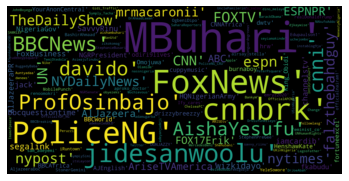

In [ ]:
from wordcloud import WordCloud
all_text = str(flat_mentions)
wordcloud = WordCloud(scale=10,collocations=False,max_words=500,max_font_size=50).generate(all_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
hashtags = [return_tags(word) for word in data['tweet']]
flat_list = [item for sublist in hashtags for item in sublist]
set(flat_list)

{'RATOLUNLOYE',
 'Biafra',
 'osogboprayerwalk',
 'Bundesliga',
 'itunnuness',
 'uinsuranceplc',
 'Fix9ja',
 'WEWANTNEWNIGERIA',
 'Congratulations',
 'totalreorientation',
 'IjeAnyi',
 'we_are_angry_and_sad',
 'EndUnliveableSalary',
 'wizkidforpresident',
 'DiaporansForChange',
 'bayelsansagainstpolicebrutality',
 'real',
 'kovid19',
 'NUFC',
 'portharcourthawties',
 'MuhyiddinOut',
 'ENDPOLICEIMPUNITY',
 'barbershop',
 'SRHvRR',
 'TheNewAfrica',
 'EndSenatorsAndRepsSalaries',
 'bbcworld',
 'BiodunFatoyinbo',
 'Sóròsóké',
 'YouthfulSavings',
 'wearecitizensnotenemies',
 'Cavebury',
 'ogunstate',
 'NewMusicMonday',
 'Tinubuisamurderer',
 'NnamdiKanu',
 'NewWeekNewVibes',
 '6MONTHS',
 'nba',
 'croquembouchetower',
 'endsarsmusic',
 'NoMoreSufferingAndSmiling',
 'akufoaddo',
 'youthtothepeople',
 'NORTHENDINSECURITY',
 'VideoViral',
 'Endallnonsence',
 'MaysolEntertainment',
 'GOT7_Breath',
 'VoteBlueToSaveAmerica',
 'MILAlbumOfTheYear',
 'PositionsIsComing',
 'heroes',
 'NEWNIGERIA',
 'sh

In [ ]:
import matplotlib.pyplot as plt


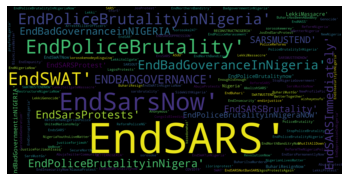

In [ ]:
from wordcloud import WordCloud
all_text = str(flat_list)
wordcloud = WordCloud(scale=10,collocations=False,max_words=500,max_font_size=50).generate(all_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
df = data.copy()

In [ ]:
df.shape

(332371, 9)

In [ ]:
def preprocess_tweet(message):
    text = str(message)
    p.OPT.URL
Mention p.OPT.MENTION
Hashtag p.OPT.HASHTAG
Reserved Words  p.OPT.RESERVED
Emoji   p.OPT.EMOJI
Smiley  p.OPT.SMILEY
Number  p.OPT.NUMBER
    p.set_options(p.OPT.URL, p.OPT.EMOJI)
    text = p.clean(text)
    return text
def remove_symbols(message):
  re.sub(r'^\x00-\x7F+', ' ', message)
  return re.sub(r'[@!.,(\/&)?:#*...-'']', ' ', str(message.lower())) 
def remove_urls(message):
  return re.sub(r'http\S+', ' ', str(message))
 
def prep_message(message):
  message = preprocess_tweet(message)
  message = remove_symbols(message)
  message = remove_urls(message)
  return message

In [ ]:
df['tweet_new']=df['tweet'].apply(prep_message)

In [ ]:
df['tweet_new'].duplicated().sum()

115453

In [ ]:
df['tweet_new'].isna().sum()

0

In [ ]:
check = df['tweet_new'].replace(' ', np.nan)

In [ ]:
check.isna().sum()

662

In [ ]:
df.loc[check.isna(), :]

,tweet_id,location,place_latitude,place_longitude,country_code,account_creation_time,tweet_time,tweet,geometry,tweet_new
39,1.312356e+18,"Lagos, Nigeria",10.260,7.4510000000000005,NG,2016-06-19 18:38:23,2020-10-03 11:37:05,𝙏𝙤 𝙬𝙖𝙡𝙠 𝙞𝙣 𝙣𝙖𝙩𝙪𝙧𝙚 𝙞𝙨 𝙩𝙤 𝙬𝙞𝙩𝙣𝙚𝙨𝙨 𝙖 𝙩𝙝𝙤𝙪𝙨𝙖𝙣𝙙 𝙢𝙞𝙧...,POINT (7.451000000000001 10.26),
189,1.312428e+18,"Lagos, Nigeria",6.591,3.318,NG,2019-08-05 11:25:14,2020-10-03 16:24:13,#EndSARS #EndSARS #EndSARS #EndSARS #EndSA...,POINT (3.318 6.591),
529,1.312475e+18,idiopathic,7.154,3.352,NG,2010-12-28 16:01:07,2020-10-03 19:30:32,@jidesanwoolu #EndSARS #EndSARS #EndSARS #E...,POINT (3.352 7.154),
637,1.312483e+18,"Lagos, Nigeria",6.591,3.318,NG,2011-03-28 22:59:36,2020-10-03 20:02:54,#EndSARS #EndSARS #EndSARS #EndSARS #EndSA...,POINT (3.318 6.591),
692,1.312487e+18,Outside Nigeria,6.493,3.339,NG,2011-03-14 07:20:26,2020-10-03 20:17:35,#EndSARS #EndSARS #EndSARS #EndSARS #EndSA...,POINT (3.339 6.492999999999999),
...,...,...,...,...,...,...,...,...,...,...
329008,1.334764e+18,"Akwa Ibom, Nigeria",5.029,7.946,NG,2013-09-09 00:40:08,2020-12-04 07:36:51,@SavvyRinu #EndSARS!,POINT (7.946000000000001 5.029),
329429,1.334966e+18,"Lagos, Nigeria",6.493,3.339,NG,2020-10-21 13:16:04,2020-12-04 21:01:39,♥️.#EndBadGovernanceinNIGERIA #EndSARS #EndPol...,POINT (3.339 6.492999999999999),
330790,1.336938e+18,"Jos, Nigeria",9.913,8.886,NG,2018-06-09 18:35:55,2020-12-10 07:37:29,#ThrowbackThursday #EndSARS ! https://t.co/si5...,POINT (8.886000000000001 9.913),
330792,1.336940e+18,"Jos, Nigeria",9.913,8.886,NG,2018-06-09 18:35:55,2020-12-10 07:43:18,#ThrowbackThursday #EndSARS ! \n\n📸 @_stev3ns_...,POINT (8.886000000000001 9.913),


In [ ]:
df.shape

(332371, 10)

In [ ]:
df['tweet_new'].replace('', np.nan, inplace=True)
df['tweet_new'].isna().sum()

85513

In [ ]:
df['tweet_new'].replace(' ', np.nan, inplace=True)
df['tweet_new'].isna().sum()

86175

In [ ]:
# Extract nan rows
df.loc[df['tweet_new'].isna(), :]

,tweet_id,location,place_latitude,place_longitude,country_code,account_creation_time,tweet_time,tweet,geometry,tweet_new
16,1.312344e+18,"New York, NY",40.781,-73.969,US,2020-07-04 18:43:50,2020-10-03 10:49:59,#EndSARSNOW,POINT (-73.96899999999999 40.781),NaN
27,1.312352e+18,"Lagos, Nigeria",6.493,3.339,NG,2014-08-04 19:04:27,2020-10-03 11:23:02,#EndSARS,POINT (3.339 6.492999999999999),NaN
28,1.312352e+18,"Lagos, Nigeria",6.493,3.339,NG,2014-08-04 19:04:27,2020-10-03 11:23:09,#EndSARS,POINT (3.339 6.492999999999999),NaN
29,1.312353e+18,"Lagos, Nigeria",6.493,3.339,NG,2014-08-04 19:04:27,2020-10-03 11:23:19,#EndSARS,POINT (3.339 6.492999999999999),NaN
30,1.312353e+18,"Lagos, Nigeria",6.493,3.339,NG,2014-08-04 19:04:27,2020-10-03 11:23:30,#EndSARS,POINT (3.339 6.492999999999999),NaN
...,...,...,...,...,...,...,...,...,...,...
332341,1.344706e+18,"Austin, TX",31.169,-100.077,US,2013-08-10 08:23:02,2020-12-31 18:03:14,#endsars,POINT (-100.077 31.169),NaN
332345,1.344729e+18,"Toronto, Ontario",43.629,-79.273,CA,2012-04-20 19:41:57,2020-12-31 19:37:06,#EndSARS,POINT (-79.273 43.629),NaN
332354,1.344755e+18,NaN,6.493,3.339,NG,2019-09-07 06:52:51,2020-12-31 21:20:30,#Endsars,POINT (3.339 6.492999999999999),NaN
332360,1.344790e+18,Lagos,6.591,3.318,NG,2009-04-17 15:03:12,2020-12-31 23:37:53,#EndSARS,POINT (3.318 6.591),NaN


In [ ]:
df.dropna(subset=['tweet_new'], inplace=True)
df.shape

(246196, 10)

In [ ]:
df['tweet_new'].duplicated().sum()

29280

In [ ]:
# Extract duplicate rows
df.loc[df['tweet_new'].duplicated(), :]

,tweet_id,location,place_latitude,place_longitude,country_code,account_creation_time,tweet_time,tweet,geometry,tweet_new
142,1.312410e+18,Lagos,6.591,3.318,NG,2011-05-13 13:17:10,2020-10-03 15:11:34,To order dm/WhatsApp or call 08157555629\n\n#C...,POINT (3.318 6.591),to order dm whatsapp or call
156,1.312415e+18,"Lagos, Nigeria",6.493,3.339,NG,2015-01-29 20:25:58,2020-10-03 15:32:14,#EndSarsNow #EndSARSBrutality\n#EndSarsNow #En...,POINT (3.339 6.492999999999999),it on
321,1.312449e+18,"Abuja, Nigeria",9.074,7.4239999999999995,NG,2019-01-28 17:40:32,2020-10-03 17:45:10,@Famezz_vv @preshdeyforyou #EndSARS\n\nhttps:/...,POINT (7.423999999999999 9.074),
328,1.312449e+18,"Lagos, Nigeria",6.591,3.318,NG,2011-05-09 01:59:02,2020-10-03 17:46:55,#EndSARS now @ProfOsinbajo @MBuhari @NGRSenate,POINT (3.318 6.591),now
745,1.312491e+18,F.C.T,9.074,7.4239999999999995,NG,2011-12-06 21:38:16,2020-10-03 20:33:49,@kanyewest #ENDSARS #ENDSARS #ENDSARS \nWE NEE...,POINT (7.423999999999999 9.074),we need help
...,...,...,...,...,...,...,...,...,...,...
332281,1.344364e+18,"Surulere, Nigeria",6.493,3.339,NG,2019-09-06 06:32:12,2020-12-30 19:24:58,#TuleChallenge #COVIDIOT #fearwomen #trashy #P...,POINT (3.339 6.492999999999999),merry christmas
332322,1.344615e+18,Morocco & UK,6.245,7.002,NG,2009-02-03 14:49:24,2020-12-31 12:02:10,🖤THE MOVEMENT IS WINNING🖤\nLet’s keep our eyes...,POINT (7.002000000000001 6.245),the movement is winninglets keep our eyes on t...
332333,1.344643e+18,Morocco & UK,6.245,7.002,NG,2009-02-03 14:49:24,2020-12-31 13:54:22,🖤THE MOVEMENT IS WINNING🖤\nLet’s keep our eyes...,POINT (7.002000000000001 6.245),the movement is winninglets keep our eyes on t...
332349,1.344741e+18,"Enugu,Nigeria",6.441,7.521,NG,2011-05-07 21:14:00,2020-12-31 20:23:01,My #top4of2020 #366of366 #lastdayof2020 #EndSa...,POINT (7.521 6.441),my


In [ ]:
print(df.shape)
df.drop_duplicates(subset=['tweet_new'],inplace=True)
df.shape

(246196, 10)


(216916, 10)

In [ ]:
df.isna().sum()

tweet_id                     1
location                 22587
place_latitude              18
place_longitude             18
country_code               115
account_creation_time        1
tweet_time                   1
tweet                        1
geometry                     2
tweet_new                    0
dtype: int64

In [ ]:
df.loc[df['tweet_id'].isna(), :]

,tweet_id,location,place_latitude,place_longitude,country_code,account_creation_time,tweet_time,tweet,geometry,tweet_new
31957,NaN,6.442,3.502,NG,2011-09-09 13:11:39,2020-10-09 20:34:09,A message to @CocaCola. #EndSarsNow #EndSARSIm...,POINT (3.502 6.442),NaN,point 3 502


In [ ]:
df.dropna(subset=['tweet_id'], inplace=True)
df.shape

(216915, 10)

In [ ]:
df.loc[df['tweet'].isna(), :]

,tweet_id,location,place_latitude,place_longitude,country_code,account_creation_time,tweet_time,tweet,geometry,tweet_new
31956,1.314665e+18,on the Move,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan


In [ ]:
df.dropna(subset=['tweet'], inplace=True)
df.shape

(216914, 10)

In [ ]:
df.isna().sum()

tweet_id                     0
location                 22587
place_latitude              17
place_longitude             17
country_code               114
account_creation_time        0
tweet_time                   0
tweet                        0
geometry                     0
tweet_new                    0
dtype: int64

In [ ]:
df.shape

(216914, 10)

In [ ]:
df.drop(df[df['tweet_new']== 'rt'].index,inplace=True)

In [ ]:
df.shape

(216913, 10)

In [ ]:
%%capture
!pip install pyLDAvis
import re, nltk, spacy, string

from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from pprint import pprint

#import pandas as pd
import pyLDAvis
import pyLDAvis.sklearn
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from plotly.offline import plot
import plotly.graph_objects as go
import plotly.express as px

In [ ]:
data  = pd.read_csv('/content/drive/MyDrive/EndSARs tweets with Dr Elaine/EndSARS_cleaned_data.csv',low_memory=False)
data.shape

(216913, 10)

In [ ]:
data

,tweet_id,location,place_latitude,place_longitude,country_code,account_creation_time,tweet_time,tweet,geometry,tweet_new
0,1.312105e+18,"Lagos, Nigeria",6.493,3.339,NG,2018-02-10 05:50:23,2020-10-02 18:59:34,The key to escape SARS is wearing your faded s...,POINT (3.339 6.492999999999999),the key to escape sars is wearing your faded s...
1,1.312270e+18,oº°˚º°˚Wº°˚º°˚o,6.591,3.318,NG,2010-12-25 05:32:42,2020-10-03 05:56:07,You see that #BlackLivesMatter go be like exam...,POINT (3.318 6.591),you see that go be like example when nigeria y...
2,1.312290e+18,Lagos X Ilorin,6.493,3.339,NG,2017-11-27 08:47:42,2020-10-03 07:16:39,I AM TIRED #EndSARS,POINT (3.339 6.492999999999999),i am tired
3,1.312292e+18,"Lekki, Nigeria",6.442,3.502,NG,2012-07-08 22:20:03,2020-10-03 07:24:43,@PoliceNG_CRU your officers are asking for war...,POINT (3.502 6.442),your officers are asking for war this is robb...
4,1.312296e+18,NaN,9.074,7.424,NG,2019-07-19 06:48:55,2020-10-03 07:37:07,I know some of the SARS guys from the State CI...,POINT (7.423999999999999 9.074),i know some of the sars guys from the state ci...
...,...,...,...,...,...,...,...,...,...,...
216908,1.333580e+18,$citzjustice (kush🎶love),33.501,-117.120,US,2020-05-10 20:38:06,2020-12-01 01:14:25,Exactly correct brother; the world's justice s...,POINT (-117.12 33.501),exactly correct brother; the world's justice s...
216909,1.333581e+18,$citzjustice (kush🎶love),33.501,-117.120,US,2020-05-10 20:38:06,2020-12-01 01:16:15,Man❤️am🥰ashuga-tam😗🙏❤️🌹😇🎶#EndSARS,POINT (-117.12 33.501),manamashuga tam
216910,1.333581e+18,$citzjustice (kush🎶love),33.501,-117.120,US,2020-05-10 20:38:06,2020-12-01 01:18:34,🙏Inshallah🙏🌹❤️Allah is wise. #EndSARS,POINT (-117.12 33.501),inshallahallah is wise
216911,1.333582e+18,$citzjustice (kush🎶love),33.501,-117.120,US,2020-05-10 20:38:06,2020-12-01 01:20:11,@PK_Defend @F_BALOCHI1 @PTIofficial @ImranKhan...,POINT (-117.12 33.501),allah knows all look in your hand and your he...


In [ ]:
data['tweet_new']

0         the key to escape sars is wearing your faded s...
1         you see that go be like example when nigeria y...
2                                                i am tired
3         your officers are asking for war  this is robb...
4         i know some of the sars guys from the state ci...
                                ...                        
216908    exactly correct brother; the world's justice s...
216909                                      manamashuga tam
216910                              inshallahallah is wise 
216911    allah knows all  look in your hand and your he...
216912    the star of sirius shines brightestin the sky ...
Name: tweet_new, Length: 216913, dtype: object

In [ ]:
data['tweet_new'] = [prep_message(word) for word in data['tweet_new']]
data['tweet_new']

0         the key to escape sars is wearing your faded s...
1         you see that go be like example when nigeria y...
2                                                i am tired
3         your officers are asking for war  this is robb...
4         i know some of the sars guys from the state ci...
                                ...                        
216908    exactly correct brother the world's justice sy...
216909                                      manamashuga tam
216910                              inshallahallah is wise 
216911    allah knows all  look in your hand and your he...
216912    the star of sirius shines brightestin the sky ...
Name: tweet_new, Length: 216913, dtype: object

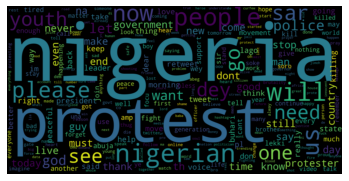

In [ ]:
from wordcloud import WordCloud
all_text = data['tweet_new'].to_string()
wordcloud = WordCloud(scale=10,collocations=False,max_words=500,max_font_size=500).generate(all_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from gensim.corpora.dictionary import Dictionary
from nltk.tokenize import word_tokenize
import gensim

In [ ]:
WNlemma = nltk.WordNetLemmatizer()
def lemmatize_stemming(message):
    return WNlemma.lemmatize(message)

In [ ]:
#unwanted =["endsars" ,"endsar","endpolicebrutality","endsarsnow","nigeria","endswat","nigerian","protest","sars"]

In [ ]:
from gensim.parsing.preprocessing import STOPWORDS
all_stopwords_gensim = STOPWORDS.union(set(['nigeria', 'nigerian','protest','let','want',u'\'s']))

In [ ]:
def preprocess(message):
  result = [lemmatize_stemming(word) for word in gensim.utils.simple_preprocess(message) if not word in all_stopwords_gensim and len(word) > 2]
  return (" ").join(result)

In [ ]:
data['processed_docs'] = data['tweet_new'].map(preprocess)
data[:10]

,tweet_id,location,place_latitude,place_longitude,country_code,account_creation_time,tweet_time,tweet,geometry,tweet_new,processed_docs
0,1.312105e+18,"Lagos, Nigeria",6.493,3.339,NG,2018-02-10 05:50:23,2020-10-02 18:59:34,The key to escape SARS is wearing your faded s...,POINT (3.339 6.492999999999999),the key to escape sars is wearing your faded s...,key escape sars wearing faded shirt jean rubbe...
1,1.312270e+18,oº°˚º°˚Wº°˚º°˚o,6.591,3.318,NG,2010-12-25 05:32:42,2020-10-03 05:56:07,You see that #BlackLivesMatter go be like exam...,POINT (3.318 6.591),you see that go be like example when nigeria y...,like example youth finally turn extortion
2,1.312290e+18,Lagos X Ilorin,6.493,3.339,NG,2017-11-27 08:47:42,2020-10-03 07:16:39,I AM TIRED #EndSARS,POINT (3.339 6.492999999999999),i am tired,tired
3,1.312292e+18,"Lekki, Nigeria",6.442,3.502,NG,2012-07-08 22:20:03,2020-10-03 07:24:43,@PoliceNG_CRU your officers are asking for war...,POINT (3.502 6.442),your officers are asking for war this is robb...,officer asking war robbery featured bbc cnn di...
4,1.312296e+18,NaN,9.074,7.424,NG,2019-07-19 06:48:55,2020-10-03 07:37:07,I know some of the SARS guys from the State CI...,POINT (7.423999999999999 9.074),i know some of the sars guys from the state ci...,know sars guy state cid help dont drag try run...
5,1.312299e+18,🇳🇬,6.493,3.339,NG,2011-07-12 16:37:27,2020-10-03 07:52:33,@sars_is_here @sars_watch @segalink @PoliceNG ...,POINT (3.339 6.492999999999999),tag alongside let report the situation until ...,tag alongside report situation resolved
6,1.312307e+18,NaN,6.591,3.318,NG,2020-09-27 12:11:20,2020-10-03 08:24:23,Even if they are criminals they are to be judg...,POINT (3.318 6.591),even if they are criminals they are to be judg...,criminal judged law stop brutality stop unnece...
7,1.312319e+18,🇳🇬🇬🇭,9.043,8.672,NG,2011-12-13 19:11:17,2020-10-03 09:10:31,@MBuhari @NGRPresident \nIs this what it has c...,POINT (8.672000000000001 9.042999999999999),is this what it has come to innocent and legi...,come innocent legitimate cryptocurrency trader...
8,1.312328e+18,🇳🇬🇬🇭,4.825,7.031,NG,2011-12-13 19:11:17,2020-10-03 09:45:32,#EndSARS \nThat's the tweet.,POINT (7.031000000000001 4.825),that's the tweet,tweet
9,1.312330e+18,Africa,6.493,3.339,NG,2012-09-05 10:07:01,2020-10-03 09:52:11,#EndSARS!!!!\n\nRT,POINT (3.339 6.492999999999999),rt,


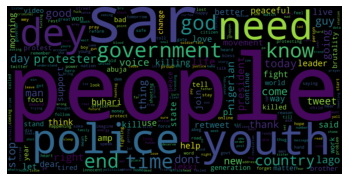

In [ ]:
from wordcloud import WordCloud
all_text = data['processed_docs'].to_string()
wordcloud = WordCloud(scale=10,collocations=False,max_words=500,max_font_size=500).generate(all_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
data['processed_docs']

0         key escape sars wearing faded shirt jean rubbe...
1                 like example youth finally turn extortion
2                                                     tired
3         officer asking war robbery featured bbc cnn di...
4         know sars guy state cid help dont drag try run...
                                ...                        
216908    exactly correct brother world justice rigged l...
216909                                      manamashuga tam
216910                                  inshallahallah wise
216911    allah know look hand heart hath left man allah...
216912    star sirius shine brightestin sky blessed holy...
Name: processed_docs, Length: 216913, dtype: object

In [ ]:
vectorizer = CountVectorizer(analyzer='word',       
                             min_df=3,                        # minimum required occurences of a word 
                             stop_words='english',             # remove stop words
                             #lowercase=True,                   # convert all words to lowercase
                             token_pattern='[a-zA-Z0-9]{3,}',  # num chars > 3
                             max_features=5000,             # max number of unique words. Build a vocabulary that only consider the top max_features ordered by term frequency across the corpus
                            )

data_vectorized = vectorizer.fit_transform(data['processed_docs'])

lda_model = LatentDirichletAllocation(n_components=5, # Number of topics
                                      learning_method='online',
                                      random_state=0,       
                                      n_jobs = -1  # Use all available CPUs
                                     )
lda_output = lda_model.fit_transform(data_vectorized)

In [ ]:
pyLDAvis.enable_notebook()
pyLDAvis.sklearn.prepare(lda_model, data_vectorized, vectorizer, mds='tsne')

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
1      150.222153  -72.269554       1        1  22.613392
4       51.163364 -159.968018       2        1  22.163011
3      -73.144554   21.523815       3        1  20.265376
2      -66.410133 -110.606438       4        1  18.204337
0       54.417324   12.443444       5        1  16.753883, topic_info=            Term          Freq         Total Category  logprob  loglift
3494   protester  10253.000000  10253.000000  Default  30.0000  30.0000
3892        sars   8755.000000   8755.000000  Default  29.0000  29.0000
1926         god   8526.000000   8526.000000  Default  28.0000  28.0000
1238         dey   8269.000000   8269.000000  Default  27.0000  27.0000
3349      police  11315.000000  11315.000000  Default  26.0000  26.0000
...          ...           ...           ...      ...      ...      ...
4427        tell   1707.615168   2734.851359   Topic5  -4.9650   1.3156
1954  government   2661.355142  12243.001751   Topic5  -4.5213   0.2604
3252      people   2954.525589  19164.795154   Topic5  -4.4167  -0.0832
3242       peace   1748.015834   3262.639917   Topic5  -4.9416   1.1625
522        blood   1527.034422   2271.967541   Topic5  -5.0768   1.3892

[242 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
3         2  0.999272     abeg
21        1  0.841375    abuja
21        4  0.158593    abuja
37        5  0.999318  account
53        4  0.999168   action
...     ...       ...      ...
4967      5  0.999606     year
4986      5  0.999300    youre
4987      2  0.312907    youth
4987      3  0.249937    youth
4987      4  0.437170    youth

[260 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 5, 4, 3, 1])

In [ ]:
vectorizer_7 = TfidfVectorizer(analyzer='word',       
                             min_df=3,                        # minimum required occurences of a word 
                             stop_words='english',             # remove stop words
                             #lowercase=True,                   # convert all words to lowercase
                             token_pattern='[a-zA-Z0-9]{3,}',  # num chars > 3
                             max_features=5000,             # max number of unique words. Build a vocabulary that only consider the top max_features ordered by term frequency across the corpus
                            )

data_vectorized_7 = vectorizer_7.fit_transform(data['processed_docs'])

lda_model_7 = LatentDirichletAllocation(n_components=7, # Number of topics
                                      learning_method='online',
                                      random_state=0,       
                                      n_jobs = -1  # Use all available CPUs
                                     )
lda_output_7 = lda_model_7.fit_transform(data_vectorized)

In [ ]:
pyLDAvis.enable_notebook()
pyLDAvis.sklearn.prepare(lda_model_7, data_vectorized_7, vectorizer_7, mds='tsne')

PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
1     -29.594002  60.112713       1        1  17.633603
4     -45.996586  11.891685       2        1  16.480060
3      20.368856  70.019325       3        1  15.434826
5      53.928768  31.704309       4        1  13.380783
2     -12.437127 -26.423267       5        1  13.229481
6       3.965971  21.797720       6        1  12.806038
0      37.524284 -16.517805       7        1  11.035208, topic_info=            Term         Freq        Total Category  logprob  loglift
1926         god  2334.000000  2334.000000  Default  30.0000  30.0000
2587       lekki  1260.000000  1260.000000  Default  29.0000  29.0000
1887  generation  1111.000000  1111.000000  Default  28.0000  28.0000
2681        love  1139.000000  1139.000000  Default  27.0000  27.0000
3412   president  1373.000000  1373.000000  Default  26.0000  26.0000
...          ...          ...          ...      ...      ...      ...
2800     message   345.259195   437.125420   Topic7  -5.0576   1.9682
2113        hero   463.632426   687.717348   Topic7  -4.7628   1.8098
3445     problem   404.190518   584.731817   Topic7  -4.9000   1.8348
4902        wish   261.292211   334.549093   Topic7  -5.3362   1.9569
3242       peace   246.659995  1055.816148   Topic7  -5.3938   0.7500

[361 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
3         2  0.876232   abeg
3         4  0.116588   abeg
3         5  0.005465   abeg
5         4  0.996234    abi
21        3  0.231798  abuja
...     ...       ...    ...
4987      2  0.306268  youth
4987      3  0.171788  youth
4987      4  0.077652  youth
4987      5  0.102379  youth
4987      6  0.091100  youth

[540 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 5, 4, 6, 3, 7, 1])

In [ ]:
vectorizer_c7 = CountVectorizer(analyzer='word',       
                             min_df=3,                        # minimum required occurences of a word 
                             stop_words='english',             # remove stop words
                             #lowercase=True,                   # convert all words to lowercase
                             token_pattern='[a-zA-Z0-9]{3,}',  # num chars > 3
                             max_features=5000,             # max number of unique words. Build a vocabulary that only consider the top max_features ordered by term frequency across the corpus
                            )

data_vectorized_c7 = vectorizer_c7.fit_transform(data['processed_docs'])

lda_model_c7 = LatentDirichletAllocation(n_components=7, # Number of topics
                                      learning_method='online',
                                      random_state=0,       
                                      n_jobs = -1  # Use all available CPUs
                                     )
lda_output_7 = lda_model_c7.fit_transform(data_vectorized)

In [ ]:
pyLDAvis.enable_notebook()
pyLDAvis.sklearn.prepare(lda_model_c7, data_vectorized_c7, vectorizer_c7, mds='tsne')

PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
1     -29.594002  60.112713       1        1  19.788704
4     -45.996586  11.891685       2        1  17.034519
3      20.368856  70.019325       3        1  15.936007
5      53.928768  31.704309       4        1  12.801333
6     -12.437127 -26.423267       5        1  12.597949
2       3.965971  21.797720       6        1  12.550067
0      37.524284 -16.517805       7        1   9.291421, topic_info=            Term         Freq        Total Category  logprob  loglift
1926         god  6766.000000  6766.000000  Default  30.0000  30.0000
2587       lekki  3580.000000  3580.000000  Default  29.0000  29.0000
2681        love  3236.000000  3236.000000  Default  28.0000  28.0000
1887  generation  2778.000000  2778.000000  Default  27.0000  27.0000
3412   president  3729.000000  3729.000000  Default  26.0000  26.0000
...          ...          ...          ...      ...      ...      ...
2800     message   863.280256  1122.233733   Topic7  -5.0576   2.1137
2113        hero  1159.258682  1790.690659   Topic7  -4.7628   1.9413
3445     problem  1010.631139  1612.019188   Topic7  -4.9000   1.9092
4902        wish   653.330629   859.859090   Topic7  -5.3362   2.1014
3242       peace   616.744483  2896.403540   Topic7  -5.3938   0.8293

[360 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
3         2  0.885271   abeg
3         4  0.108413   abeg
3         6  0.005391   abeg
5         4  0.997666    abi
21        3  0.246984  abuja
...     ...       ...    ...
4987      2  0.305574  youth
4987      3  0.171251  youth
4987      4  0.071601  youth
4987      5  0.086401  youth
4987      6  0.093730  youth

[536 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 5, 4, 6, 7, 3, 1])

In [ ]:
vectorizer = TfidfVectorizer(analyzer='word',       
                             min_df=3,                        # minimum required occurences of a word 
                             stop_words='english',             # remove stop words
                             #lowercase=True,                   # convert all words to lowercase
                             token_pattern='[a-zA-Z0-9]{3,}',  # num chars > 3
                             max_features=5000,             # max number of unique words. Build a vocabulary that only consider the top max_features ordered by term frequency across the corpus
                            )

data_vectorized = vectorizer.fit_transform(data['processed_docs'])

lda_model = LatentDirichletAllocation(n_components=5, # Number of topics
                                      learning_method='online',
                                      random_state=0,       
                                      n_jobs = -1  # Use all available CPUs
                                     )
lda_output = lda_model.fit_transform(data_vectorized)

In [ ]:
pyLDAvis.enable_notebook()
pyLDAvis.sklearn.prepare(lda_model, data_vectorized, vectorizer, mds='tsne')

In [ ]:
def print_top_words(model, vectorizer, n_top_words):
    feature_names = vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        message = "\nTopic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()

In [ ]:
print_top_words(lda_model, vectorizer, n_top_words=35)

In [ ]:
doc_topic_dit = pd.DataFrame(lda_model.transform(data_vectorized),columns=['Topic 1','Lekki Massacre','Activism','Police Brutality','Topic 5'])
doc_topic_dit.head(4)

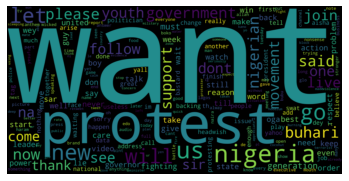

In [ ]:
from wordcloud import WordCloud
all_text = Topic_5_data['tweet_new'].to_string()
wordcloud = WordCloud(scale=10,collocations=False,max_words=500,max_font_size=500).generate(all_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
data.head(4)

,tweet_id,location,place_latitude,place_longitude,country_code,account_creation_time,tweet_time,tweet,geometry,tweet_new,processed_docs
0,1.312105e+18,"Lagos, Nigeria",6.493,3.339,NG,2018-02-10 05:50:23,2020-10-02 18:59:34,The key to escape SARS is wearing your faded s...,POINT (3.339 6.492999999999999),the key to escape sars is wearing your faded s...,key escape sars wearing faded shirt jean rubbe...
1,1.312270e+18,oº°˚º°˚Wº°˚º°˚o,6.591,3.318,NG,2010-12-25 05:32:42,2020-10-03 05:56:07,You see that #BlackLivesMatter go be like exam...,POINT (3.318 6.591),you see that go be like example when nigeria y...,like example youth finally turn extortion
2,1.312290e+18,Lagos X Ilorin,6.493,3.339,NG,2017-11-27 08:47:42,2020-10-03 07:16:39,I AM TIRED #EndSARS,POINT (3.339 6.492999999999999),i am tired,tired
3,1.312292e+18,"Lekki, Nigeria",6.442,3.502,NG,2012-07-08 22:20:03,2020-10-03 07:24:43,@PoliceNG_CRU your officers are asking for war...,POINT (3.502 6.442),your officers are asking for war this is robb...,officer asking war robbery featured bbc cnn di...


In [ ]:
data_vectorized

<216913x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 1389297 stored elements in Compressed Sparse Row format>

In [ ]:
vectorizer = CountVectorizer(analyzer='word',       
                             min_df=3,                        # minimum required occurences of a word 
                             stop_words='english',             # remove stop words
                             #lowercase=True,                   # convert all words to lowercase
                             token_pattern='[a-zA-Z0-9]{3,}',  # num chars > 3
                             max_features=5000,             # max number of unique words. Build a vocabulary that only consider the top max_features ordered by term frequency across the corpus
                            )

data_vectorized = vectorizer.fit_transform(data['processed_docs'])

lda_model = LatentDirichletAllocation(n_components=9, # Number of topics
                                      learning_method='online',
                                      random_state=0,       
                                      n_jobs = -1  # Use all available CPUs
                                     )
lda_output = lda_model.fit_transform(data_vectorized)

In [ ]:
pyLDAvis.enable_notebook()
pyLDAvis.sklearn.prepare(lda_model, data_vectorized, vectorizer, mds='tsne')

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
5      111.092506 -133.722946       1        1  14.075962
4       34.946613  107.064590       2        1  12.093528
2      -28.088213 -159.949036       3        1  11.339418
7      147.698074   21.369604       4        1  11.337884
8      -97.501183  126.981384       5        1  10.802475
0       30.312096  -32.794945       6        1  10.682849
3     -155.443665 -118.494690       7        1  10.254363
6     -204.248108   22.596130       8        1  10.114457
1      -79.404678   -6.864717       9        1   9.299064, topic_info=            Term          Freq         Total Category  logprob  loglift
3494   protester  10475.000000  10475.000000  Default  30.0000  30.0000
1238         dey   8219.000000   8219.000000  Default  29.0000  29.0000
1926         god   8416.000000   8416.000000  Default  28.0000  28.0000
1954  government  11788.000000  11788.000000  Default  27.0000  27.0000
4263        stop   6168.000000   6168.000000  Default  26.0000  26.0000
...          ...           ...           ...      ...      ...      ...
3892        sars   2494.466337   8554.096246   Topic9  -3.9973   1.1429
3349      police   2575.914976  10996.913699   Topic9  -3.9652   0.9238
1820      friend    971.148158   1482.327284   Topic9  -4.9406   1.9524
2487        kill   1206.276776   3515.568755   Topic9  -4.7238   1.3056
1128       death    921.642859   1590.755379   Topic9  -4.9930   1.8295

[400 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
3         8  0.999691      abeg
21        3  0.999411     abuja
37        6  0.276318   account
37        7  0.723567   account
62        7  0.999269  actually
...     ...       ...       ...
4973      5  0.999287       yes
4986      6  0.999146     youre
4987      1  0.636282     youth
4987      2  0.155616     youth
4987      5  0.208090     youth

[432 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 5, 3, 8, 9, 1, 4, 7, 2])

In [ ]:
vectorizer = TfidfVectorizer(analyzer='word',       
                             min_df=3,                        # minimum required occurences of a word 
                             stop_words='english',             # remove stop words
                             #lowercase=True,                   # convert all words to lowercase
                             token_pattern='[a-zA-Z0-9]{3,}',  # num chars > 3
                             max_features=5000,             # max number of unique words. Build a vocabulary that only consider the top max_features ordered by term frequency across the corpus
                            )

data_vectorized = vectorizer.fit_transform(data['processed_docs'])

lda_model = LatentDirichletAllocation(n_components=8, # Number of topics
                                      learning_method='online',
                                      random_state=0,       
                                      n_jobs = -1  # Use all available CPUs
                                     )
lda_output = lda_model.fit_transform(data_vectorized)

In [ ]:
pyLDAvis.enable_notebook()
pyLDAvis.sklearn.prepare(lda_model, data_vectorized, vectorizer, mds='tsne')

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
5     -108.958252 -208.941483       1        1  15.976338
0      186.487061  -98.103249       2        1  13.861939
4       19.245832  160.858780       3        1  12.828770
2      170.658829   75.445076       4        1  12.815003
1       -1.386411  -35.043739       5        1  12.553879
7     -145.800095  106.944611       6        1  12.148822
3       64.834541 -221.825272       7        1  10.728239
6     -196.906036  -58.990913       8        1   9.087010, topic_info=            Term         Freq        Total Category  logprob  loglift
3766     retweet  1376.000000  1376.000000  Default  30.0000  30.0000
1887  generation  1174.000000  1174.000000  Default  29.0000  29.0000
3494   protester  2236.000000  2236.000000  Default  28.0000  28.0000
2587       lekki  1234.000000  1234.000000  Default  27.0000  27.0000
4451       thank  1097.000000  1097.000000  Default  26.0000  26.0000
...          ...          ...          ...      ...      ...      ...
2180       human   303.533895   570.238149   Topic8  -4.9921   1.7678
4149     soldier   284.211751   514.014608   Topic8  -5.0579   1.8058
4279      street   314.672706   712.164156   Topic8  -4.9561   1.5815
760        check   235.669214   335.340909   Topic8  -5.2452   2.0456
1926         god   281.385496  2345.000810   Topic8  -5.0679   0.2780

[415 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
3         3  0.857537     abeg
3         5  0.140292     abeg
5         1  0.997005      abi
21        4  0.998946    abuja
37        6  0.997417  account
...     ...       ...      ...
4987      3  0.103338    youth
4987      4  0.113671    youth
4987      5  0.066308    youth
4987      6  0.156298    youth
4987      7  0.080087    youth

[660 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 1, 5, 3, 2, 8, 4, 7])

In [ ]:
vectorizer = CountVectorizer(analyzer='word',       
                             min_df=3,                        # minimum required occurences of a word 
                             stop_words='english',             # remove stop words
                             #lowercase=True,                   # convert all words to lowercase
                             token_pattern='[a-zA-Z0-9]{3,}',  # num chars > 3
                             max_features=5000,             # max number of unique words. Build a vocabulary that only consider the top max_features ordered by term frequency across the corpus
                            )

data_vectorized = vectorizer.fit_transform(data['processed_docs'])

lda_model = LatentDirichletAllocation(n_components=10, # Number of topics
                                      learning_method='online',
                                      random_state=0,       
                                      n_jobs = -1  # Use all available CPUs
                                     )
lda_output = lda_model.fit_transform(data_vectorized)

In [ ]:
pyLDAvis.enable_notebook()
pyLDAvis.sklearn.prepare(lda_model, data_vectorized, vectorizer, mds='tsne')

In [ ]:
vectorizer = CountVectorizer(analyzer='word',       
                             min_df=3,                        # minimum required occurences of a word 
                             stop_words='english',             # remove stop words
                             #lowercase=True,                   # convert all words to lowercase
                             token_pattern='[a-zA-Z0-9]{3,}',  # num chars > 3
                             max_features=5000,             # max number of unique words. Build a vocabulary that only consider the top max_features ordered by term frequency across the corpus
                            )

data_vectorized = vectorizer.fit_transform(data['processed_docs'])

lda_model = LatentDirichletAllocation(n_components=10, # Number of topics
                                      learning_method='online',
                                      random_state=0,       
                                      n_jobs = -1  # Use all available CPUs
                                     )
lda_output = lda_model.fit_transform(data_vectorized)

In [ ]:
lda_model

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='online', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=10, n_jobs=-1,
                          perp_tol=0.1, random_state=0, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [ ]:
data_vectorized

<216913x5000 sparse matrix of type '<class 'numpy.int64'>'
	with 1389297 stored elements in Compressed Sparse Row format>

In [ ]:
vectorizer

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=5000, min_df=3,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='[a-zA-Z0-9]{3,}',
                tokenizer=None, vocabulary=None)

In [ ]:
pyLDAvis.enable_notebook()
pyLDAvis.sklearn.prepare(lda_model, data_vectorized, vectorizer, mds='tsne')

PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
5      32.420952   8.115230       1        1  13.081931
4       0.648955  71.707100       2        1  10.479854
0      71.019684   9.971006       3        1  10.430879
9       3.785981  33.185135       4        1  10.389633
3     -42.666500  -9.222070       5        1   9.910258
8      -3.621689 -43.526516       6        1   9.862946
6      -3.632402  -4.171708       7        1   9.751839
1     -36.584400  35.804413       8        1   9.199511
2      44.391380  50.615383       9        1   8.852450
7      40.235809 -31.591665      10        1   8.040700, topic_info=           Term          Freq         Total Category  logprob  loglift
3494  protester  10472.000000  10472.000000  Default  30.0000  30.0000
1238        dey   8480.000000   8480.000000  Default  29.0000  29.0000
1926        god   8654.000000   8654.000000  Default  28.0000  28.0000
4987      youth  11195.000000  11195.000000  Default  27.0000  27.0000
4263       stop   6329.000000   6329.000000  Default  26.0000  26.0000
...         ...           ...           ...      ...      ...      ...
3699     report    847.863082    975.733112  Topic10  -4.9310   2.3802
3867       said   1865.344568   3629.108654  Topic10  -4.1425   1.8551
2042      happy   1128.250895   1624.612918  Topic10  -4.6453   2.1561
2490    killing   1070.208641   4969.365680  Topic10  -4.6981   0.9852
2946       need   1140.390969  10173.473146  Topic10  -4.6346   0.3322

[429 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
3         8  0.999694     abeg
21        9  0.999620    abuja
37        4  0.313168  account
37        9  0.686078  account
70        4  0.999639  address
...     ...       ...      ...
4984      4  0.210790    young
4984      6  0.788533    young
4986      1  0.999004    youre
4987      1  0.355319    youth
4987      6  0.644541    youth

[467 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 5, 1, 10, 4, 9, 7, 2, 3, 8])

In [ ]:
def print_top_words(model, vectorizer, n_top_words):
    feature_names = vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        message = "\nTopic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()

In [ ]:
print_top_words(lda_model, vectorizer, n_top_words=25)


Topic #0: amp president voice government people peace leader stand money country shame movement mean speak shall called time hero need failed know lie point fuck man

Topic #1: state day today protest said bad police brother people demand government kill politician forget heard governor soke till like soro pray thing saying boy family

Topic #2: protester police peaceful stop need government buhari people life better generation killing brutality dont know like tired abuja shooting support rest die safe think lost

Topic #3: lagos lekki power thank happening video join come hope road fighting force new curfew medium order account place people army truth thanks social tomorrow story

Topic #4: god dey good like retweet tweet killed world love life morning youth nation come people pls guy talk una person heart time wey bless matter

Topic #5: youth end right sars country people time fight help need live going way change man nigerian thug year toll gate focus stay govt citizen let



In [ ]:
doc_topic_dit = pd.DataFrame(lda_model.transform(data_vectorized))
doc_topic_dit.head(4)

,0,1,2,3,4,5
0,0.011111,0.639547,0.249331,0.011115,0.011118,0.077779
1,0.166659,0.023942,0.024029,0.224005,0.537395,0.023969
2,0.083333,0.582911,0.083333,0.083755,0.083333,0.083333
3,0.020833,0.020892,0.020833,0.020833,0.895775,0.020833


In [ ]:
vectorizer = TfidfVectorizer(analyzer='word',       
                             min_df=3,                        # minimum required occurences of a word 
                             stop_words='english',             # remove stop words
                             #lowercase=True,                   # convert all words to lowercase
                             token_pattern='[a-zA-Z0-9]{3,}',  # num chars > 3
                             max_features=5000,             # max number of unique words. Build a vocabulary that only consider the top max_features ordered by term frequency across the corpus
                            )

data_vectorized = vectorizer.fit_transform(data['processed_docs'])

lda_model = LatentDirichletAllocation(n_components=4, # Number of topics
                                      learning_method='online',
                                      random_state=0,       
                                      n_jobs = -1  # Use all available CPUs
                                     )
lda_output = lda_model.fit_transform(data_vectorized)

In [ ]:
lda_model

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='online', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=4, n_jobs=-1,
                          perp_tol=0.1, random_state=0, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [ ]:
vectorizer

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=5000,
                min_df=3, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words='english', strip_accents=None,
                sublinear_tf=False, token_pattern='[a-zA-Z0-9]{3,}',
                tokenizer=None, use_idf=True, vocabulary=None)

In [ ]:
pyLDAvis.enable_notebook()
pyLDAvis.sklearn.prepare(lda_model, data_vectorized, vectorizer, mds='tsne')

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
1      269.562408 -124.803398       1        1  27.348769
2        1.782994 -295.079681       2        1  24.804516
3      220.811432 -343.832123       3        1  24.292575
0       50.533993  -76.050934       4        1  23.554139, topic_info=            Term         Freq        Total Category  logprob  loglift
1926         god  2220.000000  2220.000000  Default  30.0000  30.0000
1934        good  1802.000000  1802.000000  Default  29.0000  29.0000
4263        stop  1692.000000  1692.000000  Default  28.0000  28.0000
2490     killing  1386.000000  1386.000000  Default  27.0000  27.0000
3412   president  1331.000000  1331.000000  Default  26.0000  26.0000
...          ...          ...          ...      ...      ...      ...
2972    nigerian   592.229027  1394.464791   Topic4  -5.2762   0.5895
4987       youth   628.584108  2394.727998   Topic4  -5.2166   0.1083
1954  government   599.019022  2688.041485   Topic4  -5.2648  -0.0554
2946        need   567.453009  2465.773745   Topic4  -5.3189  -0.0232
193          amp   542.232451  1358.344648   Topic4  -5.3644   0.5275

[208 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
3         1  0.998024    abeg
21        1  0.310807   abuja
21        3  0.688310   abuja
102       2  0.999386  africa
193       1  0.131042     amp
...     ...       ...     ...
4986      4  0.998185   youre
4987      1  0.186660   youth
4987      2  0.418419   youth
4987      3  0.132374   youth
4987      4  0.262660   youth

[258 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 4, 1])

In [ ]:
def print_top_words(model, vectorizer, n_top_words):
    feature_names = vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        message = "\nTopic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()

In [ ]:
print_top_words(lda_model, vectorizer, n_top_words=15)


Topic #0: amp president voice government people peace leader stand money country shame movement mean speak shall called time hero need failed know lie point fuck man

Topic #1: state day today protest said bad police brother people demand government kill politician forget heard governor soke till like soro pray thing saying boy family

Topic #2: protester police peaceful stop need government buhari people life better generation killing brutality dont know like tired abuja shooting support rest die safe think lost

Topic #3: lagos lekki power thank happening video join come hope road fighting force new curfew medium order account place people army truth thanks social tomorrow story

Topic #4: god dey good like retweet tweet killed world love life morning youth nation come people pls guy talk una person heart time wey bless matter

Topic #5: youth end right sars country people time fight help need live going way change man nigerian thug year toll gate focus stay govt citizen let



In [ ]:
doc_topic_dit = pd.DataFrame(lda_model.transform(data_vectorized))
doc_topic_dit.head(4)

,0,1,2,3,4,5
0,0.011111,0.639547,0.249331,0.011115,0.011118,0.077779
1,0.166659,0.023942,0.024029,0.224005,0.537395,0.023969
2,0.083333,0.582911,0.083333,0.083755,0.083333,0.083333
3,0.020833,0.020892,0.020833,0.020833,0.895775,0.020833


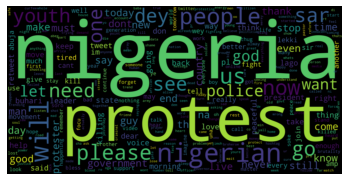

In [ ]:
from wordcloud import WordCloud
all_text = data['tweet_new'].to_string()
wordcloud = WordCloud(scale=10,collocations=False,max_words=500,max_font_size=500).generate(all_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

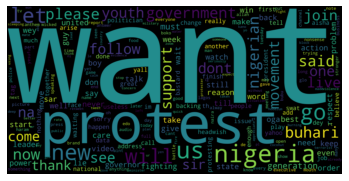

In [ ]:
from wordcloud import WordCloud
all_text = Topic_5_data['tweet_new'].to_string()
wordcloud = WordCloud(scale=10,collocations=False,max_words=500,max_font_size=500).generate(all_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
data.head(4)

,tweet_id,location,place_latitude,place_longitude,country_code,account_creation_time,tweet_time,tweet,geometry,tweet_new,processed_docs
0,1.312105e+18,"Lagos, Nigeria",6.493,3.339,NG,2018-02-10 05:50:23,2020-10-02 18:59:34,The key to escape SARS is wearing your faded s...,POINT (3.339 6.492999999999999),the key to escape sars is wearing your faded s...,key escape sars wearing faded shirt jean rubbe...
1,1.312270e+18,oº°˚º°˚Wº°˚º°˚o,6.591,3.318,NG,2010-12-25 05:32:42,2020-10-03 05:56:07,You see that #BlackLivesMatter go be like exam...,POINT (3.318 6.591),you see that go be like example when nigeria y...,like example youth finally turn extortion
2,1.312290e+18,Lagos X Ilorin,6.493,3.339,NG,2017-11-27 08:47:42,2020-10-03 07:16:39,I AM TIRED #EndSARS,POINT (3.339 6.492999999999999),i am tired,tired
3,1.312292e+18,"Lekki, Nigeria",6.442,3.502,NG,2012-07-08 22:20:03,2020-10-03 07:24:43,@PoliceNG_CRU your officers are asking for war...,POINT (3.502 6.442),your officers are asking for war this is robb...,officer asking war robbery featured bbc cnn di...


In [ ]:
sel_topics = doc_topic_dit[[1,5]]

In [ ]:
data1 = data[['tweet_id','tweet','tweet_new']]

In [ ]:
dat_df = data1.join(sel_topics)
dat_df

,tweet_id,tweet,tweet_new,1,5
0,1.312105e+18,The key to escape SARS is wearing your faded s...,the key to escape sars is wearing your faded s...,0.639547,0.077779
1,1.312270e+18,You see that #BlackLivesMatter go be like exam...,you see that go be like example when nigeria y...,0.023942,0.023969
2,1.312290e+18,I AM TIRED #EndSARS,i am tired,0.582911,0.083333
3,1.312292e+18,@PoliceNG_CRU your officers are asking for war...,your officers are asking for war this is robb...,0.020892,0.020833
4,1.312296e+18,I know some of the SARS guys from the State CI...,i know some of the sars guys from the state ci...,0.061191,0.008404
...,...,...,...,...,...
216908,1.333580e+18,Exactly correct brother; the world's justice s...,exactly correct brother; the world's justice s...,0.168643,0.131572
216909,1.333581e+18,Man❤️am🥰ashuga-tam😗🙏❤️🌹😇🎶#EndSARS,manamashuga tam,0.166667,0.166667
216910,1.333581e+18,🙏Inshallah🙏🌹❤️Allah is wise. #EndSARS,inshallahallah is wise,0.583333,0.083333
216911,1.333582e+18,@PK_Defend @F_BALOCHI1 @PTIofficial @ImranKhan...,allah knows all look in your hand and your he...,0.018663,0.351850


In [ ]:
doc_topic_dit[1].describe()

count    216913.000000
mean          0.177124
std           0.172343
min           0.003401
25%           0.041667
50%           0.114034
75%           0.274700
max           0.982978
Name: 1, dtype: float64

In [ ]:
sel_topics[sel_topics[1] >= 0.5].describe()

,1,5
count,14433.000000,14433.000000
mean,0.614812,0.080971
std,0.090304,0.077732
min,0.500019,0.003401
25%,0.541662,0.033333
50%,0.583333,0.055556
75%,0.685117,0.083333
max,0.982978,0.447916


In [ ]:
vectorizer = CountVectorizer(analyzer='word',       
                             min_df=3,                        # minimum required occurences of a word 
                             stop_words='english',             # remove stop words
                             #lowercase=True,                   # convert all words to lowercase
                             token_pattern='[a-zA-Z0-9]{3,}',  # num chars > 3
                             max_features=5000,             # max number of unique words. Build a vocabulary that only consider the top max_features ordered by term frequency across the corpus
                            )

data_vectorized = vectorizer.fit_transform(data['processed_docs'])

lda_model = LatentDirichletAllocation(n_components=2, # Number of topics
                                      learning_method='online',
                                      random_state=0,       
                                      n_jobs = -1  # Use all available CPUs
                                     )
lda_output = lda_model.fit_transform(data_vectorized)

In [ ]:
pyLDAvis.enable_notebook()
pyLDAvis.sklearn.prepare(lda_model, data_vectorized, vectorizer, mds='tsne')

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:56: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:348: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:349: DeprecationWarning:

`np.float` is 

PreparedData(topic_coordinates=               x           y  topics  cluster       Freq
topic                                                   
1     -60.312317  141.369629       1        1  56.530669
0      60.312561 -141.369141       2        1  43.469331, topic_info=            Term          Freq         Total Category  logprob  loglift
1921         god   8706.000000   8706.000000  Default  30.0000  30.0000
1238         dey   8444.000000   8444.000000  Default  29.0000  29.0000
1950  government  11872.000000  11872.000000  Default  28.0000  28.0000
3347      police  10798.000000  10798.000000  Default  27.0000  27.0000
1117         day   6419.000000   6419.000000  Default  26.0000  26.0000
...          ...           ...           ...      ...      ...      ...
4495        time   3881.649295   8520.785892   Topic2  -5.1106   0.0469
2943        need   3332.610602  10087.418665   Topic2  -5.2631  -0.2744
3492   protester   3351.921523  10742.260195   Topic2  -5.2573  -0.3315
2502        know   3150.854618   8865.011027   Topic2  -5.3192  -0.2013
3250      people   3030.544655  18911.250568   Topic2  -5.3581  -0.9979

[135 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
3         1  0.000603   abeg
3         2  0.999792   abeg
193       1  0.861815    amp
193       2  0.138249    amp
370       1  0.999728    bad
...     ...       ...    ...
4868      2  0.999959    wey
4927      1  0.994135  world
4927      2  0.005731  world
4987      1  0.979258  youth
4987      2  0.020775  youth

[198 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1])

In [ ]:
vectorizer = CountVectorizer(analyzer='word',       
                             min_df=3,                        # minimum required occurences of a word 
                             stop_words='english',             # remove stop words
                             #lowercase=True,                   # convert all words to lowercase
                             token_pattern='[a-zA-Z0-9]{3,}',  # num chars > 3
                             max_features=5000,             # max number of unique words. Build a vocabulary that only consider the top max_features ordered by term frequency across the corpus
                            )

data_vectorized = vectorizer.fit_transform(data['processed_docs'])

lda_model = LatentDirichletAllocation(n_components=4, # Number of topics
                                      learning_method='online',
                                      random_state=0,       
                                      n_jobs = -1  # Use all available CPUs
                                     )
lda_output = lda_model.fit_transform(data_vectorized)

In [ ]:
pyLDAvis.enable_notebook()
pyLDAvis.sklearn.prepare(lda_model, data_vectorized, vectorizer, mds='tsne')

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:56: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:348: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:349: DeprecationWarning:

`np.float` is 

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
2      269.562408 -124.803398       1        1  34.784724
1        1.782994 -295.079681       2        1  23.440937
3      220.811432 -343.832123       3        1  21.823165
0       50.533993  -76.050934       4        1  19.951174, topic_info=            Term          Freq         Total Category  logprob  loglift
3492   protester  10450.000000  10450.000000  Default  30.0000  30.0000
1921         god   8933.000000   8933.000000  Default  29.0000  29.0000
1238         dey   8664.000000   8664.000000  Default  28.0000  28.0000
1950  government  11818.000000  11818.000000  Default  27.0000  27.0000
4987       youth  10966.000000  10966.000000  Default  26.0000  26.0000
...          ...           ...           ...      ...      ...      ...
850         come   3312.347859   6604.422003   Topic4  -4.4905   0.9218
2855       money   1665.682521   2440.629962   Topic4  -5.1779   1.2299
2614        like   2605.595054   8858.578274   Topic4  -4.7305   0.3882
2943        need   2494.680564  10075.392486   Topic4  -4.7740   0.2159
2502        know   1818.751200   8845.933220   Topic4  -5.0900   0.0301

[195 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
3         4  0.999697   abeg
21        2  0.999660  abuja
193       1  0.491917    amp
193       2  0.508035    amp
265       2  0.999569   army
...     ...       ...    ...
4921      2  0.999428   word
4927      2  0.999656  world
4950      4  0.999608  wrong
4966      2  0.999729   year
4987      1  0.999916  youth

[196 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 4, 1])

In [ ]:
pyLDAvis.enable_notebook()
pyLDAvis.sklearn.prepare(lda_model, data_vectorized, vectorizer, mds='tsne')

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:56: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:348: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:349: DeprecationWarning:

`np.float` is 

PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
3       1.465019 -47.625065       1        1  22.748890
0      54.854797 -36.476795       2        1  18.454138
2      32.212929 -61.444572       3        1  18.066663
1       5.111096 -14.110332       4        1  16.936848
4      26.350170 -33.374702       5        1  13.634285
5      38.109818  -7.222781       6        1  10.159176, topic_info=                               Term           Freq  ...  logprob  loglift
1522                        endsars  388996.000000  ...  30.0000  30.0000
1461       endbadgoveranceinnigeria   28830.000000  ...  29.0000  29.0000
1536                     endsarsnow   39559.000000  ...  28.0000  28.0000
1506             endpolicebrutality   31840.000000  ...  27.0000  27.0000
1549                        endswat   28134.000000  ...  26.0000  26.0000
...                             ...            ...  ...      ...      ...
1509  endpolicebrutalityinnigeranow   10996.812127  ...  -3.2072   1.9720
2792                        mbuhari    7365.484795  ...  -3.6080   1.9702
3399                       policeng    2517.594474  ...  -4.6815   1.8654
1522                        endsars    7351.064427  ...  -3.6100  -1.6819
2416                   jidesanwoolu    1516.683601  ...  -5.1883   1.2082

[256 rows x 6 columns], token_table=      Topic      Freq             Term
term                                  
22        5  0.999717             2020
57        6  0.999192              abc
202       6  0.999774      aishayesufu
231       6  0.999443        aljazeera
233       6  0.999572      aljazeerapr
...     ...       ...              ...
4857      6  0.999695            whats
4908      2  0.999807             work
4974      6  0.999258  youranoncentral
4977      1  0.999923            youth
4981      1  0.999850           youths

[259 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 1, 3, 2, 5, 6])

In [ ]:
lda_output

array([[0.01111112, 0.63954683, 0.24933097, 0.01111471, 0.01111771,
        0.07777866],
       [0.16665948, 0.02394218, 0.02402946, 0.22400539, 0.53739452,
        0.02396896],
       [0.08333334, 0.58291136, 0.08333333, 0.0837553 , 0.08333333,
        0.08333333],
       ...,
       [0.08333334, 0.58333329, 0.08333334, 0.08333334, 0.08333334,
        0.08333334],
       [0.01851902, 0.01866334, 0.1128627 , 0.47941377, 0.0186907 ,
        0.35185046],
       [0.00833334, 0.10831138, 0.26939941, 0.05963057, 0.44566386,
        0.10866144]])

# Similarity

In [ ]:
data_in.head(5)

,tweet_id,location,place_latitude,place_longitude,country_code,account_creation_time,tweet_time,tweet,geometry,retweeted,mentioned,hashtags,cleaned_tweets,tweet_lower,search_irrelevant_data,processed_docs,tweet_date,tweet_time_
0,1312104957391237120.0,"Lagos, Nigeria",6.493,3.339,NG,2018-02-10 05:50:23,2020-10-02 18:59:34,The key to escape SARS is wearing your faded s...,POINT (3.339 6.492999999999999),[],[],#endsars,the key to escape sars is wearing your faded s...,the key to escape sars is wearing your faded s...,False,key escape sars wearing faded shirt jean rubbe...,2020-10-02,18:59:34
1,1312270183487152128.0,oº°˚º°˚Wº°˚º°˚o,6.591,3.318,NG,2010-12-25 05:32:42,2020-10-03 05:56:07,You see that #BlackLivesMatter go be like exam...,POINT (3.318 6.591),[],[],"#blacklivesmatter,#sarsbrutality,#policebrutal...",you see that go be like example when nigeria y...,you see that #blacklivesmatter go be like exam...,False,like example youth finally turn extortion,2020-10-03,05:56:07
2,1312290451370762240.0,Lagos X Ilorin,6.493,3.339,NG,2017-11-27 08:47:42,2020-10-03 07:16:39,I AM TIRED #EndSARS,POINT (3.339 6.492999999999999),[],[],#endsars,i am tired,i am tired #endsars,False,tired,2020-10-03,07:16:39
3,1312292483670462464.0,"Lekki, Nigeria",6.442,3.502,NG,2012-07-08 22:20:03,2020-10-03 07:24:43,@PoliceNG_CRU your officers are asking for war...,POINT (3.502 6.442),[],['@PoliceNG_CRU'],#endsars,your officers are asking for war this is robbe...,@policeng_cru your officers are asking for war...,False,officer asking war robbery featured bbc cnn di...,2020-10-03,07:24:43
4,1312295604123467776.0,NaN,9.074,7.424,NG,2019-07-19 06:48:55,2020-10-03 07:37:07,I know some of the SARS guys from the State CI...,POINT (7.423999999999999 9.074),[],[],"#sarsalert,#endsars,#sars",i know some of the sars guys from the state ci...,i know some of the sars guys from the state ci...,False,know sars guy state cid help dont drag try run...,2020-10-03,07:37:07


In [ ]:
%%capture
!pip install tweet-preprocessor
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.cluster import KMeans 
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import nltk
import os,re
import preprocessor as p
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

In [ ]:
df = pd.read_csv('/content/drive/My Drive/endsars_geodf.csv')
print(df.shape)


(332371, 9)


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
search = pd.read_csv('/content/drive/MyDrive/Endsar_tweets_topic_selection.csv')
print(search.shape)

(60, 9)


In [ ]:
df.head()

,tweet_id,location,place_latitude,place_longitude,country_code,account_creation_time,tweet_time,tweet,geometry
0,1.312105e+18,"Lagos, Nigeria",6.493,3.339,NG,2018-02-10 05:50:23,2020-10-02 18:59:34,The key to escape SARS is wearing your faded s...,POINT (3.339 6.492999999999999)
1,1.312270e+18,oº°˚º°˚Wº°˚º°˚o,6.591,3.318,NG,2010-12-25 05:32:42,2020-10-03 05:56:07,You see that #BlackLivesMatter go be like exam...,POINT (3.318 6.591)
2,1.312290e+18,Lagos X Ilorin,6.493,3.339,NG,2017-11-27 08:47:42,2020-10-03 07:16:39,I AM TIRED #EndSARS,POINT (3.339 6.492999999999999)
3,1.312292e+18,"Lekki, Nigeria",6.442,3.502,NG,2012-07-08 22:20:03,2020-10-03 07:24:43,@PoliceNG_CRU your officers are asking for war...,POINT (3.502 6.442)
4,1.312296e+18,NaN,9.074,7.4239999999999995,NG,2019-07-19 06:48:55,2020-10-03 07:37:07,I know some of the SARS guys from the State CI...,POINT (7.423999999999999 9.074)


In [ ]:
def preprocess_tweet(message):
    text = str(message)
    text = p.clean(text)
    return text
def remove_symbols(message):
  re.sub(r'^\x00-\x7F+', ' ', message)
  return re.sub(r'[@!.,(\/&)?:#*...-'']', ' ', str(message.lower())) 
def remove_urls(message):
  return re.sub(r'http\S+', ' ', str(message))

def prep_message(message):
  message = preprocess_tweet(message)
  message = remove_symbols(message)
  message = remove_urls(message)
  return message

In [ ]:
df['tweet_new']=df['tweet'].apply(prep_message)
search['tweet_new'] = search['tweet'].apply(prep_message)

In [ ]:
df['tweet_new'].head()

0    the key to escape sars is wearing your faded s...
1    you see that go be like example when nigeria y...
2                                           i am tired
3    your officers are asking for war  this is robb...
4    i know some of the sars guys from the state ci...
Name: tweet_new, dtype: object

In [ ]:
search['tweet_new'].head()

0    i have suffered sars brutality before and i ca...
1    anyone that is schooling or ever schooled at a...
2    last year when i was serving at ilorin  one a ...
3    i had a first hand experience with sars in   e...
4    jimoh isiaq was murdered in cold blood in ogbo...
Name: tweet_new, dtype: object

In [ ]:
search_data = search.groupby('tweet_category').agg({'tweet_new': lambda x: ' '.join(x)})
search_data

,tweet_new
tweet_category,
Activism,soro soke weyreyse won ti yo gongongo e ni you...
Lekki Massacre,i hope the lekki toll gate is torn down tonigh...
No/ Response from public figures,no celebrity wan even help us talk nigerian yo...
Police Brutality Events,i have suffered sars brutality before and i ca...
Questions about moving forward/past,how'll govt policies work when it is the wors...
media coverage,civil society organisation centre for advancem...


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
search_data['tweet_without_stopwords'] = search_data['tweet_new'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
search_data.head()

,tweet_new,tweet_without_stopwords
tweet_category,,
Activism,soro soke weyreyse won ti yo gongongo e ni you...,soro soke weyreyse ti yo gongongo e ni go come...
Lekki Massacre,i hope the lekki toll gate is torn down tonigh...,hope lekki toll gate torn tonight statue slain...
No/ Response from public figures,no celebrity wan even help us talk nigerian yo...,celebrity wan even help us talk nigerian youth...
Police Brutality Events,i have suffered sars brutality before and i ca...,suffered sars brutality say uncultured unintel...
Questions about moving forward/past,how'll govt policies work when it is the wors...,how'll govt policies work worst citizens emplo...


In [ ]:
df['tweet_without_stopwords'] = df['tweet_new'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df.head()

,tweet_id,location,place_latitude,place_longitude,country_code,account_creation_time,tweet_time,tweet,geometry,tweet_new,tweet_without_stopwords
0,1.312105e+18,"Lagos, Nigeria",6.493,3.339,NG,2018-02-10 05:50:23,2020-10-02 18:59:34,The key to escape SARS is wearing your faded s...,POINT (3.339 6.492999999999999),the key to escape sars is wearing your faded s...,key escape sars wearing faded shirt jeans one ...
1,1.312270e+18,oº°˚º°˚Wº°˚º°˚o,6.591,3.318,NG,2010-12-25 05:32:42,2020-10-03 05:56:07,You see that #BlackLivesMatter go be like exam...,POINT (3.318 6.591),you see that go be like example when nigeria y...,see go like example nigeria youths finally tur...
2,1.312290e+18,Lagos X Ilorin,6.493,3.339,NG,2017-11-27 08:47:42,2020-10-03 07:16:39,I AM TIRED #EndSARS,POINT (3.339 6.492999999999999),i am tired,tired
3,1.312292e+18,"Lekki, Nigeria",6.442,3.502,NG,2012-07-08 22:20:03,2020-10-03 07:24:43,@PoliceNG_CRU your officers are asking for war...,POINT (3.502 6.442),your officers are asking for war this is robb...,officers asking war robbery get featured bbc c...
4,1.312296e+18,NaN,9.074,7.4239999999999995,NG,2019-07-19 06:48:55,2020-10-03 07:37:07,I know some of the SARS guys from the State CI...,POINT (7.423999999999999 9.074),i know some of the sars guys from the state ci...,know sars guys state cid always help dont drag...


In [ ]:
Activism = search_data['tweet_new'].loc['Activism']
Lekki_Massacre = search_data['tweet_new'].loc['Lekki Massacre']
No_Response_from_public_figures= search_data['tweet_new'].loc['No/ Response from public figures']
Police_Brutality_Events=search_data['tweet_new'].loc['Police Brutality Events']
Questions_about_moving_forward_past=search_data['tweet_new'].loc['Questions about moving forward/past ']
media_coverage=search_data['tweet_new'].loc['media coverage']

In [ ]:
%%capture
!pip install tensorflow==1.15
!pip install "tensorflow_hub>=0.6.0"
!pip3 install tensorflow_text==1.15

In [ ]:
import tensorflow as tf
from absl import logging
import tensorflow_hub as hub

In [ ]:
module_url = "https://tfhub.dev/google/universal-sentence-encoder/2" #"https://tfhub.dev/google/universal-sentence-encoder-large/3"
embed = hub.Module(module_url)

In [ ]:
tweets = df['tweet_new'].to_list()

In [ ]:
def embed_tweets(messages):
  similarity_input_placeholder = tf.placeholder(tf.string, shape=([None]))
  similarity_message_encodings = embed(similarity_input_placeholder)
  with tf.Session() as session:
    session.run([tf.global_variables_initializer(),tf.tables_initializer()])
    message_embeddings_ = session.run(similarity_message_encodings, feed_dict={similarity_input_placeholder: messages})
  return message_embeddings_ 
  # run_and_plot(session, similarity_input_placeholder, messages,
  #              similarity_message_encodings)

In [ ]:
tweets_vector = embed_tweets(tweets)

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


In [ ]:
tweets_vector.shape

(332371, 512)

In [ ]:
def embed_tweet(tweet):
  with tf.Session() as session:
    session.run([tf.global_variables_initializer(), tf.tables_initializer()])
    message_embeddings = session.run(embed([tweet]))
  return message_embeddings

In [ ]:
Activism_vector=embed_tweet(Activism)
Activism_vector.shape

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


(1, 512)

In [ ]:
Activism_vector.shape

(1, 512)

In [ ]:
Lekki_Massacre_vector=embed_tweet(Lekki_Massacre)
Lekki_Massacre_vector.shape

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


(1, 512)

In [ ]:
No_Response_vector=embed_tweet(No_Response_from_public_figures)
No_Response_vector.shape

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


(1, 512)

In [ ]:
Police_Brutality_vector=embed_tweet(Police_Brutality_Events)
Police_Brutality_vector.shape

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


(1, 512)

In [ ]:
Questions_vector=embed_tweet(Questions_about_moving_forward_past)
Questions_vector.shape

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


(1, 512)

In [ ]:
media_coverage_vector=embed_tweet(media_coverage)
media_coverage_vector.shape

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


(1, 512)

In [ ]:
from sklearn.metrics.pairwise import linear_kernel
def get_cosine_scores(group,tweets):
  cosine_similarities = linear_kernel(group,tweets).flatten()
  document_scores = [item.item() for item in cosine_similarities[:]]
  return document_scores

In [ ]:
Activism_cosine_scores = get_cosine_scores(Activism_vector,tweets_vector)
Activism_cosine_scores[-10:]

[0.18618041276931763,
 0.24743299186229706,
 0.05098336189985275,
 0.2699015438556671,
 0.4018673300743103,
 0.172255277633667,
 0.04867134243249893,
 0.36391863226890564,
 0.10448718070983887,
 0.3005806505680084]

In [ ]:
LekkiMassacre_cosine_scores = get_cosine_scores(Lekki_Massacre_vector,tweets_vector)
LekkiMassacre_cosine_scores[-10:]

[0.2329486459493637,
 0.23225468397140503,
 0.1222374439239502,
 0.32659396529197693,
 0.3344499170780182,
 0.07445495575666428,
 -0.018442969769239426,
 0.3993503749370575,
 0.08502574265003204,
 0.30548185110092163]

In [ ]:
NoResponse_cosine_scores = get_cosine_scores(No_Response_vector,tweets_vector)
NoResponse_cosine_scores[-10:]

[0.15748639404773712,
 0.36975395679473877,
 0.13375121355056763,
 0.2788756191730499,
 0.34620368480682373,
 0.09286251664161682,
 0.01835010200738907,
 0.3260282278060913,
 0.07696203887462616,
 0.2509690523147583]

In [ ]:
PoliceBrutality_cosine_scores = get_cosine_scores(Police_Brutality_vector,tweets_vector)
PoliceBrutality_cosine_scores[-10:]

[0.1398407369852066,
 0.26056185364723206,
 0.0910295695066452,
 0.23127275705337524,
 0.34874725341796875,
 0.09393236041069031,
 0.03763935714960098,
 0.23255164921283722,
 0.07006815075874329,
 0.162197083234787]

In [ ]:
Questions_cosine_scores = get_cosine_scores(Questions_vector,tweets_vector)
Questions_cosine_scores[-10:]

[0.11582626402378082,
 0.34781375527381897,
 0.08707848936319351,
 0.1923244446516037,
 0.34839683771133423,
 0.09674066305160522,
 -0.03660661727190018,
 0.22394368052482605,
 0.03536604344844818,
 0.13800974190235138]

In [ ]:
media_cosine_scores = get_cosine_scores(media_coverage_vector,tweets_vector)
media_cosine_scores[-10:]

[0.14011846482753754,
 0.360422283411026,
 0.09767477214336395,
 0.208210289478302,
 0.2634931206703186,
 0.13174521923065186,
 0.029647618532180786,
 0.24530678987503052,
 0.04036825895309448,
 0.1685076653957367]

In [ ]:
'''new df with names, and the cosine scores for each group'''
cosine_data  = {'tweet_id':df['tweet_id'].to_list(),'Original_Tweets':df['tweet'].to_list(),'Cleaned_Tweets':df['tweet_new'].to_list(), 'Activism_scores':Activism_cosine_scores,
         'Massacre_scores': LekkiMassacre_cosine_scores, 'No_Response_scores':NoResponse_cosine_scores, 'Police_Brutality_scores':PoliceBrutality_cosine_scores,'Questions_scores':Questions_cosine_scores,'media_scores':media_cosine_scores}
scores_df = pd.DataFrame(cosine_data)
scores_df.head(20)

,tweet_id,Original_Tweets,Cleaned_Tweets,Activism_scores,Massacre_scores,No_Response_scores,Police_Brutality_scores,Questions_scores,media_scores
0,1.312105e+18,The key to escape SARS is wearing your faded s...,the key to escape sars is wearing your faded s...,0.312222,0.260043,0.310753,0.308404,0.271298,0.325325
1,1.312270e+18,You see that #BlackLivesMatter go be like exam...,you see that go be like example when nigeria y...,0.557766,0.377213,0.496610,0.451791,0.544939,0.527360
2,1.312290e+18,I AM TIRED #EndSARS,i am tired,0.164802,0.134732,0.136012,0.098437,0.098283,0.094742
3,1.312292e+18,@PoliceNG_CRU your officers are asking for war...,your officers are asking for war this is robb...,0.437595,0.468370,0.499204,0.403142,0.442183,0.582525
4,1.312296e+18,I know some of the SARS guys from the State CI...,i know some of the sars guys from the state ci...,0.312224,0.289398,0.368958,0.385537,0.403998,0.403673
5,1.312299e+18,@sars_is_here @sars_watch @segalink @PoliceNG ...,tag alongside let report the situation until ...,0.222739,0.152644,0.206359,0.177911,0.185650,0.268752
6,1.312307e+18,Even if they are criminals they are to be judg...,even if they are criminals they are to be judg...,0.436279,0.456575,0.441570,0.407941,0.419036,0.353133
7,1.312319e+18,@MBuhari @NGRPresident \nIs this what it has c...,is this what it has come to innocent and legi...,0.408860,0.277772,0.382659,0.261130,0.482859,0.329925
8,1.312328e+18,#EndSARS \nThat's the tweet.,that's the tweet,0.117692,0.159905,0.188272,0.017343,0.054669,0.124901
9,1.312330e+18,#EndSARS!!!!\n\nRT,rt,0.148543,0.161795,0.169035,0.058404,0.085664,0.203081


In [ ]:
scores_df['Cleaned_Tweets'].replace('', np.nan, inplace=True)
scores_df

,tweet_id,Original_Tweets,Cleaned_Tweets,Activism_scores,Massacre_scores,No_Response_scores,Police_Brutality_scores,Questions_scores,media_scores
0,1.312105e+18,The key to escape SARS is wearing your faded s...,the key to escape sars is wearing your faded s...,0.312222,0.260043,0.310753,0.308404,0.271298,0.325325
1,1.312270e+18,You see that #BlackLivesMatter go be like exam...,you see that go be like example when nigeria y...,0.557766,0.377213,0.496610,0.451791,0.544939,0.527360
2,1.312290e+18,I AM TIRED #EndSARS,i am tired,0.164802,0.134732,0.136012,0.098437,0.098283,0.094742
3,1.312292e+18,@PoliceNG_CRU your officers are asking for war...,your officers are asking for war this is robb...,0.437595,0.468370,0.499204,0.403142,0.442183,0.582525
4,1.312296e+18,I know some of the SARS guys from the State CI...,i know some of the sars guys from the state ci...,0.312224,0.289398,0.368958,0.385537,0.403998,0.403673
...,...,...,...,...,...,...,...,...,...
332366,1.333581e+18,Man❤️am🥰ashuga-tam😗🙏❤️🌹😇🎶#EndSARS,manamashuga tam,0.172255,0.074455,0.092863,0.093932,0.096741,0.131745
332367,1.333581e+18,🙏Inshallah🙏🌹❤️Allah is wise. #EndSARS,inshallahallah is wise,0.048671,-0.018443,0.018350,0.037639,-0.036607,0.029648
332368,1.333582e+18,@PK_Defend @F_BALOCHI1 @PTIofficial @ImranKhan...,allah knows all look in your hand and your he...,0.363919,0.399350,0.326028,0.232552,0.223944,0.245307
332369,1.333583e+18,#EndSars 🎶🙏❤️🇳🇬💙❤️👍🏿🎶😘🇳🇬🤎👍🏿🇺🇸🌙😘🥰😘🥰😘\n🇳🇬❤️🌹🙏👍🏿🇳...,NaN,0.104487,0.085026,0.076962,0.070068,0.035366,0.040368


In [ ]:
scores_df.dropna(subset=['Cleaned_Tweets'], inplace=True)
scores_df.head()

,tweet_id,Original_Tweets,Cleaned_Tweets,Activism_scores,Massacre_scores,No_Response_scores,Police_Brutality_scores,Questions_scores,media_scores
0,1.312105e+18,The key to escape SARS is wearing your faded s...,the key to escape sars is wearing your faded s...,0.312222,0.260043,0.310753,0.308404,0.271298,0.325325
1,1.312270e+18,You see that #BlackLivesMatter go be like exam...,you see that go be like example when nigeria y...,0.557766,0.377213,0.496610,0.451791,0.544939,0.527360
2,1.312290e+18,I AM TIRED #EndSARS,i am tired,0.164802,0.134732,0.136012,0.098437,0.098283,0.094742
3,1.312292e+18,@PoliceNG_CRU your officers are asking for war...,your officers are asking for war this is robb...,0.437595,0.468370,0.499204,0.403142,0.442183,0.582525
4,1.312296e+18,I know some of the SARS guys from the State CI...,i know some of the sars guys from the state ci...,0.312224,0.289398,0.368958,0.385537,0.403998,0.403673


In [ ]:
scores_df['Tweets_tokens'] = scores_df['Cleaned_Tweets'].str.split()
scores_df = scores_df[scores_df['Tweets_tokens'].apply(len)>2].reset_index(drop=True)
scores_df.head(20)

,tweet_id,Original_Tweets,Cleaned_Tweets,Activism_scores,Massacre_scores,No_Response_scores,Police_Brutality_scores,Questions_scores,media_scores,Tweets_tokens
0,1.312105e+18,The key to escape SARS is wearing your faded s...,the key to escape sars is wearing your faded s...,0.312222,0.260043,0.310753,0.308404,0.271298,0.325325,"[the, key, to, escape, sars, is, wearing, your..."
1,1.312270e+18,You see that #BlackLivesMatter go be like exam...,you see that go be like example when nigeria y...,0.557766,0.377213,0.496610,0.451791,0.544939,0.527360,"[you, see, that, go, be, like, example, when, ..."
2,1.312290e+18,I AM TIRED #EndSARS,i am tired,0.164802,0.134732,0.136012,0.098437,0.098283,0.094742,"[i, am, tired]"
3,1.312292e+18,@PoliceNG_CRU your officers are asking for war...,your officers are asking for war this is robb...,0.437595,0.468370,0.499204,0.403142,0.442183,0.582525,"[your, officers, are, asking, for, war, this, ..."
4,1.312296e+18,I know some of the SARS guys from the State CI...,i know some of the sars guys from the state ci...,0.312224,0.289398,0.368958,0.385537,0.403998,0.403673,"[i, know, some, of, the, sars, guys, from, the..."
5,1.312299e+18,@sars_is_here @sars_watch @segalink @PoliceNG ...,tag alongside let report the situation until ...,0.222739,0.152644,0.206359,0.177911,0.185650,0.268752,"[tag, alongside, let, report, the, situation, ..."
6,1.312307e+18,Even if they are criminals they are to be judg...,even if they are criminals they are to be judg...,0.436279,0.456575,0.441570,0.407941,0.419036,0.353133,"[even, if, they, are, criminals, they, are, to..."
7,1.312319e+18,@MBuhari @NGRPresident \nIs this what it has c...,is this what it has come to innocent and legi...,0.408860,0.277772,0.382659,0.261130,0.482859,0.329925,"[is, this, what, it, has, come, to, innocent, ..."
8,1.312328e+18,#EndSARS \nThat's the tweet.,that's the tweet,0.117692,0.159905,0.188272,0.017343,0.054669,0.124901,"[that's, the, tweet]"
9,1.312334e+18,I prefer to be rubbed by Arm robbers than SARZ...,i prefer to be rubbed by arm robbers than sarz...,0.256893,0.296439,0.239547,0.390079,0.182895,0.218204,"[i, prefer, to, be, rubbed, by, arm, robbers, ..."


In [ ]:
search

,tweet_id,location,place_latitude,place_longitude,country_code,account_creation_time,tweet_time,tweet,tweet_category,tweet_new
0,1312380000000000000,"Federal Capital Territory, Nig",8.942,7.253,NG,10/9/11 15:37,10/3/20 13:00,I have suffered SARS brutality before and I ca...,Police Brutality Events,i have suffered sars brutality before and i ca...
1,1312690000000000000,Nigeria,6.493,3.339,NG,4/20/11 13:47,10/4/20 9:55,Anyone that is schooling or ever schooled At A...,Police Brutality Events,anyone that is schooling or ever schooled at a...
2,1312750000000000000,no where,7.154,3.352,NG,6/18/19 15:18,10/4/20 13:35,Last year when I was serving at ilorin. One a ...,Police Brutality Events,last year when i was serving at ilorin one a ...
3,1314670000000000000,"Lagos, Nigeria",6.493,3.339,NG,12/13/09 0:24,10/9/20 20:50,I had a first hand experience with SARS in 201...,Police Brutality Events,i had a first hand experience with sars in e...
4,1315030000000000000,"Ogbomosho, Nigeria",7.132,3.642,NG,1/28/20 19:34,10/10/20 20:38,Jimoh Isiaq was murdered in cold blood in ogbo...,Police Brutality Events,jimoh isiaq was murdered in cold blood in ogbo...
5,1315030000000000000,Nigeria,5.499,7.030,NG,12/13/12 15:41,10/10/20 20:55,"@ReekadoBanks Av had that experience before, p...",Police Brutality Events,av had that experience before police man slap...
6,1312370000000000000,"Iperu, Nigeria",6.915,3.664,NG,3/25/20 7:55,10/3/20 12:44,Let's keep the trend Going...I was once a Vict...,Police Brutality Events,let's keep the trend going i was once a vict...
7,1312440000000000000,"Ibadan, Nigeria",7.429,3.905,NG,12/27/12 14:28,10/3/20 17:21,The day I sent my 16 year old brother to buy s...,Police Brutality Events,the day i sent my year old brother to buy some...
8,1312630000000000000,Awawo,37.771,-122.436,US,11/17/12 12:57,10/4/20 5:26,Iâ€™ve been robbed a couple times in my life a...,Police Brutality Events,ive been robbed a couple times in my life as a...
9,1318740000000000000,"Dublin, Ireland",52.151,-7.556,IE,3/31/20 21:07,10/21/20 2:14,I hope the lekki toll gate is torn down tonigh...,Lekki Massacre,i hope the lekki toll gate is torn down tonigh...


In [ ]:
def get_clusters(l1, l2, l3, l4, l5, l6,l7):
    Activism = []
    Massacre= []
    No_Response = []
    Police_Brutality = []
    Questions= []
    media = []
    category = []

    for a, b, c, d, e, f,g in zip(l1, l2, l3, l4, l5, l6,l7):
        m = max(a, b, c, d, e, f)
        if m == a:
            Activism.append('Activism')
        else:
            Activism.append(0)
        if m == b:
            Massacre.append('Lekki Massacre')
        else:
            Massacre.append(0)        
        if m == c:
            No_Response.append('No/ Response from public figures')
        else:
            No_Response.append(0)  
        if m == d:
            Police_Brutality.append('Police Brutality Events')
        else:
            Police_Brutality.append(0)
        if m == e:
            Questions.append('Questions about moving forward/past ')
        else:
            Questions.append(0)
        if m == f:
            media.append('media coverage')
        else:
            media.append(0)   
        if m ==a==b==c==d==e:
          category.append('No correlation')
        else:
          if m == a:
            category.append('Activism')
          elif m == b:
            category.append('Lekki Massacre')
          elif m == c:
            category.append('No/ Response from public figures')
          elif m == d:
            category.append('Police Brutality Events')
          elif m == e:
            category.append('Questions about moving forward/past ')
          elif m == f:
            category.append('media coverage')
          
    return Activism,Massacre,No_Response,Police_Brutality,Questions,media,category

In [ ]:
scores_df['category']=np.zeros(scores_df.shape[0])

In [ ]:
l1 = scores_df.Activism_scores.to_list()
l2 = scores_df.Massacre_scores.to_list()
l3 = scores_df.No_Response_scores.to_list()
l4 = scores_df.Police_Brutality_scores.to_list()
l5 = scores_df.Questions_scores.to_list()
l6 = scores_df.media_scores.to_list()
l7 = scores_df['category']
Activism,Massacre,No_Response,Police_Brutality,Questions,media,category = get_clusters(l1, l2, l3, l4, l5, l6, l7)

In [ ]:
data = {'tweet_id':scores_df['tweet_id'].to_list(),'Original_Tweets':scores_df['Original_Tweets'].to_list(),'Cleaned_Tweets':scores_df['Cleaned_Tweets'].to_list(),'Activism':Activism, 'Massacre':Massacre, 'No_Response':No_Response, 'Police_Brutality': Police_Brutality, 'Questions': Questions, 'media_scores': media, 'Category':category}
cluster_df = pd.DataFrame(data)
cluster_df

,tweet_id,Original_Tweets,Cleaned_Tweets,Activism,Massacre,No_Response,Police_Brutality,Questions,media_scores,Category
0,1.312105e+18,The key to escape SARS is wearing your faded s...,the key to escape sars is wearing your faded s...,0,0,0,0,0,media coverage,media coverage
1,1.312270e+18,You see that #BlackLivesMatter go be like exam...,you see that go be like example when nigeria y...,Activism,0,0,0,0,0,Activism
2,1.312290e+18,I AM TIRED #EndSARS,i am tired,Activism,0,0,0,0,0,Activism
3,1.312292e+18,@PoliceNG_CRU your officers are asking for war...,your officers are asking for war this is robb...,0,0,0,0,0,media coverage,media coverage
4,1.312296e+18,I know some of the SARS guys from the State CI...,i know some of the sars guys from the state ci...,0,0,0,0,Questions about moving forward/past,0,Questions about moving forward/past
...,...,...,...,...,...,...,...,...,...,...
227207,1.333578e+18,Inshallah❤️👍🏿👍🏿🙏May Allah Bless you ETERNALLY....,inshallahmay allah bless you eternally,0,Lekki Massacre,0,0,0,0,Lekki Massacre
227208,1.333580e+18,Exactly correct brother; the world's justice s...,exactly correct brother; the world's justice s...,Activism,0,0,0,0,0,Activism
227209,1.333581e+18,🙏Inshallah🙏🌹❤️Allah is wise. #EndSARS,inshallahallah is wise,Activism,0,0,0,0,0,Activism
227210,1.333582e+18,@PK_Defend @F_BALOCHI1 @PTIofficial @ImranKhan...,allah knows all look in your hand and your he...,0,Lekki Massacre,0,0,0,0,Lekki Massacre


## Comparing with TFIDF Encoder

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/EndSARS_tfidf_df.csv',low_memory=False)
print(df.shape)
df.head(15)

(227212, 5)


,tweet_id,Original_Tweets,Cleaned_Tweets,Cosine_Similiarity_Category,Jaccard_Similiarity_Category
0,1.312105e+18,The key to escape SARS is wearing your faded s...,the key to escape sars is wearing your faded s...,Police Brutality Events,Activism
1,1.312270e+18,You see that #BlackLivesMatter go be like exam...,you see that go be like example when nigeria y...,Questions about moving forward/past,Activism
2,1.312290e+18,I AM TIRED #EndSARS,i am tired,Questions about moving forward/past,Activism
3,1.312292e+18,@PoliceNG_CRU your officers are asking for war...,your officers are asking for war this is robb...,media coverage,Activism
4,1.312296e+18,I know some of the SARS guys from the State CI...,i know some of the sars guys from the state ci...,Police Brutality Events,Activism
5,1.312299e+18,@sars_is_here @sars_watch @segalink @PoliceNG ...,tag alongside let report the situation until ...,Activism,Activism
6,1.312307e+18,Even if they are criminals they are to be judg...,even if they are criminals they are to be judg...,Lekki Massacre,Activism
7,1.312319e+18,@MBuhari @NGRPresident \nIs this what it has c...,is this what it has come to innocent and legi...,Activism,No/ Response from public figures
8,1.312328e+18,#EndSARS \nThat's the tweet.,that's the tweet,No correlation,No/ Response from public figures
9,1.312334e+18,I prefer to be rubbed by Arm robbers than SARZ...,i prefer to be rubbed by arm robbers than sarz...,Police Brutality Events,No/ Response from public figures


In [ ]:
df.rename(columns={'Cosine_Similiarity_Category':'Cosine_tfidf_Similiarity_Category'}, inplace=True)

In [ ]:
df['Cosine_USE_Similiarity_Category'] = cluster_df.Category

In [ ]:
df

,tweet_id,Original_Tweets,Cleaned_Tweets,Cosine_tfidf_Similiarity_Category,Jaccard_Similiarity_Category,Cosine_USE_Similiarity_Category
0,1.312105e+18,The key to escape SARS is wearing your faded s...,the key to escape sars is wearing your faded s...,Police Brutality Events,Activism,media coverage
1,1.312270e+18,You see that #BlackLivesMatter go be like exam...,you see that go be like example when nigeria y...,Questions about moving forward/past,Activism,Activism
2,1.312290e+18,I AM TIRED #EndSARS,i am tired,Questions about moving forward/past,Activism,Activism
3,1.312292e+18,@PoliceNG_CRU your officers are asking for war...,your officers are asking for war this is robb...,media coverage,Activism,media coverage
4,1.312296e+18,I know some of the SARS guys from the State CI...,i know some of the sars guys from the state ci...,Police Brutality Events,Activism,Questions about moving forward/past
...,...,...,...,...,...,...
227207,1.333578e+18,Inshallah❤️👍🏿👍🏿🙏May Allah Bless you ETERNALLY....,inshallahmay allah bless you eternally,No correlation,Activism,Lekki Massacre
227208,1.333580e+18,Exactly correct brother; the world's justice s...,exactly correct brother; the world's justice s...,Police Brutality Events,Questions about moving forward/past,Activism
227209,1.333581e+18,🙏Inshallah🙏🌹❤️Allah is wise. #EndSARS,inshallahallah is wise,No correlation,Activism,Activism
227210,1.333582e+18,@PK_Defend @F_BALOCHI1 @PTIofficial @ImranKhan...,allah knows all look in your hand and your he...,Police Brutality Events,Activism,Lekki Massacre


In [ ]:
EndSARS_text_sim =df.to_csv("EndSARS_text_sim.csv", index = False)
from google.colab import files
files.download("EndSARS_text_sim.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df['cosine_tfidf_jaccard'] = np.where((df['Cosine_tfidf_Similiarity_Category'] == df['Jaccard_Similiarity_Category']),1, np.nan)

In [ ]:
df['cosine_tfidfvsUSE'] = np.where((df['Cosine_tfidf_Similiarity_Category'] == df['Cosine_USE_Similiarity_Category']),1, np.nan)

In [ ]:
df['jaccard_vscosineUSE'] = np.where((df['Jaccard_Similiarity_Category'] == df['Cosine_USE_Similiarity_Category']),1, np.nan)

In [ ]:
cols = ['Jaccard_Similiarity_Category','Cosine_USE_Similiarity_Category','Cosine_tfidf_Similiarity_Category']
df['data_Matching'] = df[cols].eq(df[cols[0]], axis=0).all(axis=1)

In [ ]:
(df['data_Matching']== True).value_counts()

False    207927
True      19285
Name: data_Matching, dtype: int64

In [ ]:
df

,tweet_id,Original_Tweets,Cleaned_Tweets,Cosine_tfidf_Similiarity_Category,Jaccard_Similiarity_Category,Cosine_USE_Similiarity_Category,cosine_tfidf_jaccard,cosine_tfidfvsUSE,jaccard_vscosineUSE,data_Matching
0,1.312105e+18,The key to escape SARS is wearing your faded s...,the key to escape sars is wearing your faded s...,Police Brutality Events,Activism,media coverage,NaN,NaN,NaN,False
1,1.312270e+18,You see that #BlackLivesMatter go be like exam...,you see that go be like example when nigeria y...,Questions about moving forward/past,Activism,Activism,NaN,NaN,1.0,False
2,1.312290e+18,I AM TIRED #EndSARS,i am tired,Questions about moving forward/past,Activism,Activism,NaN,NaN,1.0,False
3,1.312292e+18,@PoliceNG_CRU your officers are asking for war...,your officers are asking for war this is robb...,media coverage,Activism,media coverage,NaN,1.0,NaN,False
4,1.312296e+18,I know some of the SARS guys from the State CI...,i know some of the sars guys from the state ci...,Police Brutality Events,Activism,Questions about moving forward/past,NaN,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...
227207,1.333578e+18,Inshallah❤️👍🏿👍🏿🙏May Allah Bless you ETERNALLY....,inshallahmay allah bless you eternally,No correlation,Activism,Lekki Massacre,NaN,NaN,NaN,False
227208,1.333580e+18,Exactly correct brother; the world's justice s...,exactly correct brother; the world's justice s...,Police Brutality Events,Questions about moving forward/past,Activism,NaN,NaN,NaN,False
227209,1.333581e+18,🙏Inshallah🙏🌹❤️Allah is wise. #EndSARS,inshallahallah is wise,No correlation,Activism,Activism,NaN,NaN,1.0,False
227210,1.333582e+18,@PK_Defend @F_BALOCHI1 @PTIofficial @ImranKhan...,allah knows all look in your hand and your he...,Police Brutality Events,Activism,Lekki Massacre,NaN,NaN,NaN,False


In [ ]:
df.shape

(227212, 10)

In [ ]:
df['cosine_tfidf_jaccard'].value_counts()

1.0    38415
Name: cosine_tfidf_jaccard, dtype: int64

In [ ]:
cosine_tfidf_jaccard = (df['cosine_tfidf_jaccard'].value_counts()/227212)*100
cosine_tfidf_jaccard

1.0    16.907118
Name: cosine_tfidf_jaccard, dtype: float64

In [ ]:
df['cosine_tfidfvsUSE'].value_counts()

1.0    49362
Name: cosine_tfidfvsUSE, dtype: int64

In [ ]:
cosine_tfidfvsUSE = (df['cosine_tfidfvsUSE'].value_counts()/227212)*100
cosine_tfidfvsUSE

1.0    21.725085
Name: cosine_tfidfvsUSE, dtype: float64

In [ ]:
df['jaccard_vscosineUSE'].value_counts()

1.0    76405
Name: jaccard_vscosineUSE, dtype: int64

In [ ]:
jaccard_vscosineUSE = (df['jaccard_vscosineUSE'].value_counts()/227212)*100
jaccard_vscosineUSE

1.0    33.627185
Name: jaccard_vscosineUSE, dtype: float64

# Zero-Shot Text Classification with huggingface

In [ ]:
%%capture
!pip install transformers
from transformers import pipeline

In [ ]:
data_in = data_in[:30]

In [ ]:
data_in.head(3)

,tweet_id,location,place_latitude,place_longitude,country_code,account_creation_time,tweet_time,tweet,geometry,retweeted,mentioned,hashtags,cleaned_tweets,tweet_lower,search_irrelevant_data
0,1.3121e+18,"Lagos, Nigeria",6.493,3.339,NG,2018-02-10 05:50:23,2020-10-02 18:59:34,The key to escape SARS is wearing your faded s...,POINT (3.339 6.492999999999999),[],[],#endsars,the key to escape sars is wearing your faded s...,the key to escape sars is wearing your faded s...,False
1,1.31227e+18,oº°˚º°˚Wº°˚º°˚o,6.591,3.318,NG,2010-12-25 05:32:42,2020-10-03 05:56:07,You see that #BlackLivesMatter go be like exam...,POINT (3.318 6.591),[],[],"#blacklivesmatter,#sarsbrutality,#policebrutal...",you see that go be like example when nigeria y...,you see that #blacklivesmatter go be like exam...,False
2,1.31229e+18,Lagos X Ilorin,6.493,3.339,NG,2017-11-27 08:47:42,2020-10-03 07:16:39,I AM TIRED #EndSARS,POINT (3.339 6.492999999999999),[],[],#endsars,i am tired,i am tired #endsars,False


In [ ]:
classifier = pipeline("zero-shot-classification",device=0)
candidate_labels = ['Media coverage','Activism','Police Brutality','No response from public figures','Questions about moving forward/past','Lekki Massacre']
# classifier(
#     "This is a course about the Transformers library",
#     candidate_labels=["education", "politics", "business"],
# )

In [ ]:
data_in.shape

(30, 15)

In [ ]:
df= data_in[102255:-1]
df.shape

(102235, 15)

In [ ]:
df.head(2)

,tweet_id,location,place_latitude,place_longitude,country_code,account_creation_time,tweet_time,tweet,geometry,retweeted,mentioned,hashtags,cleaned_tweets,tweet_lower,search_irrelevant_data
102255,1.3172213761268654e+18,Nigeria,5.496,5.797000000000001,NG,2018-01-31 13:27:30,2020-10-16 21:50:23,Those who may want to arrange this will not se...,POINT (5.797000000000001 5.496),[],[],#endsars,those who may want to arrange this will not se...,those who may want to arrange this will not se...,False
102256,1.3172213846496256e+18,"Ibadan, Nigeria",7.428999999999999,3.905,NG,2015-07-15 11:28:14,2020-10-16 21:50:25,"Bashir, No dey disguise!\nSọ̀rọ̀ sókè jàre!!!\...",POINT (3.905 7.428999999999999),[],[],"#endsars,#endpolicebrutalityinnigeria,#endbadg...",bashir no dey disguisesr sk jrecan we have the...,"bashir, no dey disguise! sọ̀rọ̀ sókè jàre!!! ...",False


In [ ]:
from tqdm import tqdm

In [ ]:
df = data_in

In [ ]:
predictedCategories = []
#categories_scores = []
tweet_scores = []
for i in tqdm(range(len(df))):
    text = df.iloc[i,]['tweet']
    res = classifier(text, candidate_labels, multi_class=True) #setting multi-class as True
    labels = res['labels'] 
    scores = res['scores'] #extracting the scores associated with the labels
    res_dict = {label : score for label,score in zip(labels, scores)}
    sorted_dict = dict(sorted(res_dict.items(), key=lambda x:x[0],reverse = False)) #sorting the dictionary of labels in alphabetical order based on their score
    t_score  = []
    #categories_score = []
    for i, (k,v) in enumerate(sorted_dict.items()):
      #categories_score.append(k)
      t_score.append(v)
    tweet_scores.append(t_score) #return all scores with categories sorted alphabetical order
   # categories_scores.append(categories_score)
    categories  = []
    sorted_dict_ = dict(sorted(res_dict.items(), key=lambda x:x[1],reverse = True))
    for i, (k,v) in enumerate(sorted_dict_.items()):
      if(i > 2): #return categories with only the best 3 predictions
        break
      else:
        categories.append(k)
    predictedCategories.append(categories)

100%|██████████| 30/30 [00:02<00:00, 10.67it/s]


In [ ]:
tweet_scores

[[0.2883991003036499,
  0.007783722132444382,
  0.020126596093177795,
  0.0004162999684922397,
  0.001421173568814993,
  0.06767193228006363],
 [0.8743798136711121,
  0.003517289413139224,
  0.018769441172480583,
  0.002116309478878975,
  0.9129462242126465,
  0.024193042889237404],
 [0.06840608268976212,
  0.0005206778296269476,
  0.01657935231924057,
  0.00021508046484086663,
  0.0002919951220974326,
  0.38135790824890137],
 [0.016686340793967247,
  0.0181441493332386,
  0.8332969546318054,
  0.0008242237381637096,
  0.3260698616504669,
  0.48345452547073364],
 [0.032285384833812714,
  0.021582821384072304,
  0.07509910315275192,
  0.00031016109278425574,
  0.06252248585224152,
  0.2607855498790741],
 [0.8411148190498352,
  0.018518052995204926,
  0.9549838304519653,
  0.0002776554611045867,
  0.04256076365709305,
  0.589698314666748],
 [0.6076992154121399,
  0.054266251623630524,
  0.03672519326210022,
  0.00041076002526097,
  0.7522631287574768,
  0.3032734990119934],
 [0.244659259

In [ ]:
predictedCategories

[['Activism', 'Questions about moving forward/past', 'Media coverage'],
 ['Police Brutality', 'Activism', 'Questions about moving forward/past'],
 ['Questions about moving forward/past', 'Activism', 'Media coverage'],
 ['Media coverage', 'Questions about moving forward/past', 'Police Brutality'],
 ['Questions about moving forward/past', 'Media coverage', 'Police Brutality'],
 ['Media coverage', 'Activism', 'Questions about moving forward/past'],
 ['Police Brutality', 'Activism', 'Questions about moving forward/past'],
 ['Police Brutality', 'Questions about moving forward/past', 'Activism'],
 ['Media coverage', 'Questions about moving forward/past', 'Activism'],
 ['Questions about moving forward/past', 'Activism', 'Lekki Massacre'],
 ['Media coverage', 'Activism', 'Questions about moving forward/past'],
 ['Media coverage', 'Questions about moving forward/past', 'Activism'],
 ['Activism', 'Media coverage', 'Questions about moving forward/past'],
 ['Police Brutality', 'Questions about mov

In [ ]:
tweet_scores_df = pd.DataFrame(tweet_scores, columns=['Activism','Lekki Massacre','Media coverage','No response from public figures','Police Brutality','Questions about moving forward/past'])
tweet_scores_df

,Activism,Lekki Massacre,Media coverage,No response from public figures,Police Brutality,Questions about moving forward/past
0,0.288399,0.007784,0.020127,0.000416,0.001421,0.067672
1,0.874380,0.003517,0.018769,0.002116,0.912946,0.024193
2,0.068406,0.000521,0.016579,0.000215,0.000292,0.381358
3,0.016686,0.018144,0.833297,0.000824,0.326070,0.483455
4,0.032285,0.021583,0.075099,0.000310,0.062522,0.260786
5,0.841115,0.018518,0.954984,0.000278,0.042561,0.589698
6,0.607699,0.054266,0.036725,0.000411,0.752263,0.303273
7,0.244659,0.007419,0.008555,0.088745,0.839105,0.332230
8,0.136440,0.000404,0.767967,0.000416,0.000313,0.299006
9,0.022333,0.008445,0.007218,0.000490,0.007937,0.170103


In [ ]:
tweet_label_df = pd.DataFrame(predictedCategories, columns=['Label 1','Label 2','Label 3'])
tweet_label_df

,Label 1,Label 2,Label 3
0,Activism,Questions about moving forward/past,Media coverage
1,Police Brutality,Activism,Questions about moving forward/past
2,Questions about moving forward/past,Activism,Media coverage
3,Media coverage,Questions about moving forward/past,Police Brutality
4,Questions about moving forward/past,Media coverage,Police Brutality
5,Media coverage,Activism,Questions about moving forward/past
6,Police Brutality,Activism,Questions about moving forward/past
7,Police Brutality,Questions about moving forward/past,Activism
8,Media coverage,Questions about moving forward/past,Activism
9,Questions about moving forward/past,Activism,Lekki Massacre


In [ ]:
tweet_df=df[['tweet_id','tweet']]
tweet_df

,tweet_id,tweet
0,1.3121e+18,The key to escape SARS is wearing your faded s...
1,1.31227e+18,You see that #BlackLivesMatter go be like exam...
2,1.31229e+18,I AM TIRED #EndSARS
3,1.31229e+18,@PoliceNG_CRU your officers are asking for war...
4,1.3123e+18,I know some of the SARS guys from the State CI...
5,1.3123e+18,@sars_is_here @sars_watch @segalink @PoliceNG ...
6,1.31231e+18,Even if they are criminals they are to be judg...
7,1.31232e+18,@MBuhari @NGRPresident \nIs this what it has c...
8,1.31233e+18,#EndSARS \nThat's the tweet.
9,1.31233e+18,I prefer to be rubbed by Arm robbers than SARZ...


In [ ]:
tweet_data_plus_labels = {'tweet_id':df['tweet_id'].to_list(),'tweets':df['tweet'].to_list(),'Label 1':tweet_label_df['Label 1'].to_list(),
                          'Label 2':tweet_label_df['Label 2'].to_list(),'Label 3':tweet_label_df['Label 3'].to_list()}
tweet_data_plus_labels_df = pd.DataFrame(tweet_data_plus_labels,pd.set_option('display.max_colwidth', -1))
tweet_data_plus_labels_df.head(20)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  This is separate from the ipykernel package so we can avoid doing imports until


,tweet_id,tweets,Label 1,Label 2,Label 3
0,1.312105e+18,The key to escape SARS is wearing your faded shirt and jeans with one rubber palm. Na juju wey Dey work tested and trusted 😅#EndSARS,Activism,Questions about moving forward/past,Media coverage
1,1.312270e+18,You see that #BlackLivesMatter go be like example when Nigeria youths finally turn up against #SARSBRUTALITY \n#PoliceBrutality and Extortion. \n\n#EndSARS #EndSarsNow,Police Brutality,Activism,Questions about moving forward/past
2,1.312290e+18,I AM TIRED #EndSARS,Questions about moving forward/past,Activism,Media coverage
3,1.312292e+18,@PoliceNG_CRU your officers are asking for war. This is robbery. Is it until you get featured on BBC and CNN disgracing the nation internationally that you will #endsars ?,Media coverage,Questions about moving forward/past,Police Brutality
4,1.312296e+18,"I know some of the SARS guys from the State CID. I can always help, Just don’t drag with them, or try to run or escape, if you are making payment, make sure it’s by transfer, we can always track the name the money is transferred to. STAY SAFE GUYS. #SarsAlert #Endsars #sars",Questions about moving forward/past,Media coverage,Police Brutality
5,1.312299e+18,"@sars_is_here @sars_watch @segalink @PoliceNG Tag @I_Avas alongside, let report the situation until it's resolved. #EndSarsNow",Media coverage,Activism,Questions about moving forward/past
6,1.312307e+18,Even if they are criminals they are to be judged by the law. @MBuhari \nStop the brutality stop the unnecessary killings #EndSARS #EndSarsNow #EndSARSBrutality 😫😫😫 https://t.co/rbZAJU3jTG,Police Brutality,Activism,Questions about moving forward/past
7,1.312319e+18,"@MBuhari @NGRPresident \nIs this what it has come to? Innocent and legitimate cryptocurrency traders like myself are now getting dragged into this mess?\nWhen will you do something about this? This isn't fair, how can you just sit idly and watch.\n#EndSARS #EndSARSBrutality",Police Brutality,Questions about moving forward/past,Activism
8,1.312328e+18,#EndSARS \nThat's the tweet.,Media coverage,Questions about moving forward/past,Activism
9,1.312334e+18,"I prefer to be rubbed by Arm robbers than SARZ, imagine being harassed, rubbed and shot in most cases, just for ordinary breathing. #EndSARS",Questions about moving forward/past,Activism,Lekki Massacre


In [ ]:
tweet_data_plus_scores = {'tweet_id':df['tweet_id'].to_list(),'tweets':df['tweet'].to_list(),'Activism':tweet_scores_df['Activism'].to_list(),'Lekki Massacre':tweet_scores_df['Lekki Massacre'].to_list(),
                          'Media coverage':tweet_scores_df['Media coverage'].to_list(),'No response from public figures':tweet_scores_df['No response from public figures'].to_list(),
                          'Police Brutality':tweet_scores_df['Police Brutality'].to_list(),'Questions about moving forward/past':tweet_scores_df['Questions about moving forward/past'].to_list()}
tweet_data_plus_scores_df = pd.DataFrame(tweet_data_plus_scores,pd.set_option('display.max_colwidth', -1))
tweet_data_plus_scores_df.head(20)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  after removing the cwd from sys.path.


,tweet_id,tweets,Activism,Lekki Massacre,Media coverage,No response from public figures,Police Brutality,Questions about moving forward/past
0,1.312105e+18,The key to escape SARS is wearing your faded shirt and jeans with one rubber palm. Na juju wey Dey work tested and trusted 😅#EndSARS,0.288399,0.007784,0.020127,0.000416,0.001421,0.067672
1,1.312270e+18,You see that #BlackLivesMatter go be like example when Nigeria youths finally turn up against #SARSBRUTALITY \n#PoliceBrutality and Extortion. \n\n#EndSARS #EndSarsNow,0.874380,0.003517,0.018769,0.002116,0.912946,0.024193
2,1.312290e+18,I AM TIRED #EndSARS,0.068406,0.000521,0.016579,0.000215,0.000292,0.381358
3,1.312292e+18,@PoliceNG_CRU your officers are asking for war. This is robbery. Is it until you get featured on BBC and CNN disgracing the nation internationally that you will #endsars ?,0.016686,0.018144,0.833297,0.000824,0.326070,0.483455
4,1.312296e+18,"I know some of the SARS guys from the State CID. I can always help, Just don’t drag with them, or try to run or escape, if you are making payment, make sure it’s by transfer, we can always track the name the money is transferred to. STAY SAFE GUYS. #SarsAlert #Endsars #sars",0.032285,0.021583,0.075099,0.000310,0.062522,0.260786
5,1.312299e+18,"@sars_is_here @sars_watch @segalink @PoliceNG Tag @I_Avas alongside, let report the situation until it's resolved. #EndSarsNow",0.841115,0.018518,0.954984,0.000278,0.042561,0.589698
6,1.312307e+18,Even if they are criminals they are to be judged by the law. @MBuhari \nStop the brutality stop the unnecessary killings #EndSARS #EndSarsNow #EndSARSBrutality 😫😫😫 https://t.co/rbZAJU3jTG,0.607699,0.054266,0.036725,0.000411,0.752263,0.303273
7,1.312319e+18,"@MBuhari @NGRPresident \nIs this what it has come to? Innocent and legitimate cryptocurrency traders like myself are now getting dragged into this mess?\nWhen will you do something about this? This isn't fair, how can you just sit idly and watch.\n#EndSARS #EndSARSBrutality",0.244659,0.007419,0.008555,0.088745,0.839105,0.332230
8,1.312328e+18,#EndSARS \nThat's the tweet.,0.136440,0.000404,0.767967,0.000416,0.000313,0.299006
9,1.312334e+18,"I prefer to be rubbed by Arm robbers than SARZ, imagine being harassed, rubbed and shot in most cases, just for ordinary breathing. #EndSARS",0.022333,0.008445,0.007218,0.000490,0.007937,0.170103


In [ ]:
tweet_data_plus_scores_df.to_csv("EndSARS_Zero_class_scores_df2.csv", index = False)
from google.colab import files
files.download("EndSARS_Zero_class_scores_df2.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
tweet_data_plus_labels_df.to_csv("EndSARS_Zero_class_labels_df2.csv", index = False)
from google.colab import files
files.download("EndSARS_Zero_class_labels_df2.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#candidate_labels = ["renewable", "politics", "emission", "temperature", "emergency", "advertisment"]
candidate_results = [0, 0, 0, 0, 0, 0]

for sent in data_in['tweet'][0:3].values:
    # To do multi-class classification, simply pass multi_class=True.
    # In this case, the scores will be independent, but each will fall between 0 and 1.
    res = classifier(sent, candidate_labels, multi_class=False)
    print(sent)
    print(res['labels'])
    print(res['scores'])
   # print_flag = 0
#     for index, score in enumerate(res['scores']):
#       if score > 0.5:
#         if res['labels'][index] == 'Lekki Massacre':
#           candidate_results[0] = candidate_results[0] + 1
#         if res['labels'][index] == 'Questions about moving forward/past':
#           candidate_results[1] = candidate_results[1] + 1
#         if res['labels'][index] == 'No response from public figures':
#           candidate_results[2] = candidate_results[2] + 1
#         if res['labels'][index] == 'Police Brutality':
#           candidate_results[3] = candidate_results[3] + 1
#         if res['labels'][index] == 'Activism':
#           candidate_results[4] = candidate_results[4] + 1
#         if res['labels'][index] == 'Media coverage':
#           candidate_results[5] = candidate_results[5] + 1
        
#         #if print_flag == 0:
        
#         print()
#         print_flag = 1

# print(candidate_results)

The key to escape SARS is wearing your faded shirt and jeans with one rubber palm. Na juju wey Dey work tested and trusted 😅#EndSARS
['Activism', 'Questions about moving forward/past', 'Media coverage', 'Police Brutality', 'Lekki Massacre', 'No response from public figures']
[0.42332255840301514, 0.35680311918258667, 0.1053427904844284, 0.051948338747024536, 0.037702664732933044, 0.02488061413168907]
You see that #BlackLivesMatter go be like example when Nigeria youths finally turn up against #SARSBRUTALITY 
#PoliceBrutality and Extortion. 

#EndSARS #EndSarsNow
['Police Brutality', 'Activism', 'Questions about moving forward/past', 'Media coverage', 'Lekki Massacre', 'No response from public figures']
[0.8222129940986633, 0.14521397650241852, 0.02049623429775238, 0.007095197681337595, 0.0033360060770064592, 0.0016455847071483731]
I AM TIRED #EndSARS
['Questions about moving forward/past', 'Activism', 'Media coverage', 'Lekki Massacre', 'Police Brutality', 'No response from public figu

In [ ]:
data_in.head()

,tweet_id,location,place_latitude,place_longitude,country_code,account_creation_time,tweet_time,tweet,geometry,retweeted,mentioned,hashtags,cleaned_tweets,tweet_lower,search_irrelevant_data,processed_docs,tweet_date,tweet_time_,labels
0,1312104957391237120.0,"Lagos, Nigeria",6.493,3.339,NG,2018-02-10 05:50:23,2020-10-02 18:59:34,The key to escape SARS is wearing your faded s...,POINT (3.339 6.492999999999999),[],[],#endsars,the key to escape sars is wearing your faded s...,the key to escape sars is wearing your faded s...,False,key escape sars wearing faded shirt jean rubbe...,2020-10-02,18:59:34,{'sequence': 'The key to escape SARS is wearin...
1,1312270183487152128.0,oº°˚º°˚Wº°˚º°˚o,6.591,3.318,NG,2010-12-25 05:32:42,2020-10-03 05:56:07,You see that #BlackLivesMatter go be like exam...,POINT (3.318 6.591),[],[],"#blacklivesmatter,#sarsbrutality,#policebrutal...",you see that go be like example when nigeria y...,you see that #blacklivesmatter go be like exam...,False,like example youth finally turn extortion,2020-10-03,05:56:07,{'sequence': 'You see that #BlackLivesMatter g...
2,1312290451370762240.0,Lagos X Ilorin,6.493,3.339,NG,2017-11-27 08:47:42,2020-10-03 07:16:39,I AM TIRED #EndSARS,POINT (3.339 6.492999999999999),[],[],#endsars,i am tired,i am tired #endsars,False,tired,2020-10-03,07:16:39,"{'sequence': 'I AM TIRED #EndSARS', 'labels': ..."
3,1312292483670462464.0,"Lekki, Nigeria",6.442,3.502,NG,2012-07-08 22:20:03,2020-10-03 07:24:43,@PoliceNG_CRU your officers are asking for war...,POINT (3.502 6.442),[],['@PoliceNG_CRU'],#endsars,your officers are asking for war this is robbe...,@policeng_cru your officers are asking for war...,False,officer asking war robbery featured bbc cnn di...,2020-10-03,07:24:43,{'sequence': '@PoliceNG_CRU your officers are ...
4,1312295604123467776.0,NaN,9.074,7.424,NG,2019-07-19 06:48:55,2020-10-03 07:37:07,I know some of the SARS guys from the State CI...,POINT (7.423999999999999 9.074),[],[],"#sarsalert,#endsars,#sars",i know some of the sars guys from the state ci...,i know some of the sars guys from the state ci...,False,know sars guy state cid help dont drag try run...,2020-10-03,07:37:07,NaN


In [ ]:
data_in['labels'] = data_in[:4].apply(lambda x: classifier(x.tweet, candidate_labels, multi_class=True), axis=1)
data_in.head()

In [ ]:
data_in['labels'] = data_in[:4].apply(lambda x: classifier(x.tweet, candidate_labels, multi_class=True), axis=1)
data_in.head()

,tweet_id,location,place_latitude,place_longitude,country_code,account_creation_time,tweet_time,tweet,geometry,retweeted,mentioned,hashtags,cleaned_tweets,tweet_lower,search_irrelevant_data,processed_docs,tweet_date,tweet_time_,labels
0,1312104957391237120.0,"Lagos, Nigeria",6.493,3.339,NG,2018-02-10 05:50:23,2020-10-02 18:59:34,The key to escape SARS is wearing your faded s...,POINT (3.339 6.492999999999999),[],[],#endsars,the key to escape sars is wearing your faded s...,the key to escape sars is wearing your faded s...,False,key escape sars wearing faded shirt jean rubbe...,2020-10-02,18:59:34,{'sequence': 'The key to escape SARS is wearin...
1,1312270183487152128.0,oº°˚º°˚Wº°˚º°˚o,6.591,3.318,NG,2010-12-25 05:32:42,2020-10-03 05:56:07,You see that #BlackLivesMatter go be like exam...,POINT (3.318 6.591),[],[],"#blacklivesmatter,#sarsbrutality,#policebrutal...",you see that go be like example when nigeria y...,you see that #blacklivesmatter go be like exam...,False,like example youth finally turn extortion,2020-10-03,05:56:07,{'sequence': 'You see that #BlackLivesMatter g...
2,1312290451370762240.0,Lagos X Ilorin,6.493,3.339,NG,2017-11-27 08:47:42,2020-10-03 07:16:39,I AM TIRED #EndSARS,POINT (3.339 6.492999999999999),[],[],#endsars,i am tired,i am tired #endsars,False,tired,2020-10-03,07:16:39,"{'sequence': 'I AM TIRED #EndSARS', 'labels': ..."
3,1312292483670462464.0,"Lekki, Nigeria",6.442,3.502,NG,2012-07-08 22:20:03,2020-10-03 07:24:43,@PoliceNG_CRU your officers are asking for war...,POINT (3.502 6.442),[],['@PoliceNG_CRU'],#endsars,your officers are asking for war this is robbe...,@policeng_cru your officers are asking for war...,False,officer asking war robbery featured bbc cnn di...,2020-10-03,07:24:43,{'sequence': '@PoliceNG_CRU your officers are ...
4,1312295604123467776.0,NaN,9.074,7.424,NG,2019-07-19 06:48:55,2020-10-03 07:37:07,I know some of the SARS guys from the State CI...,POINT (7.423999999999999 9.074),[],[],"#sarsalert,#endsars,#sars",i know some of the sars guys from the state ci...,i know some of the sars guys from the state ci...,False,know sars guy state cid help dont drag try run...,2020-10-03,07:37:07,NaN


In [ ]:
res

{'labels': ['Questions about moving forward/past',
  'Media coverage',
  'Police Brutality',
  'Activism',
  'Lekki Massacre',
  'No response from public figures'],
 'scores': [0.26078617572784424,
  0.07509906589984894,
  0.06252223998308182,
  0.03228550776839256,
  0.02158287912607193,
  0.0003101620532106608],
 'sequence': 'I know some of the SARS guys from the State CID. I can always help, Just don’t drag with them, or try to run or escape, if you are making payment, make sure it’s by transfer, we can always track the name the money is transferred to. STAY SAFE GUYS. #SarsAlert #Endsars #sars'}

In [ ]:
def get_label_score_dict(row, threshold):
    result_dict = dict()
    for _label, _score in zip(row['labels'], row['scores']):
        if _score > threshold:
            result_dict.update({_label: 1})
        else:
            result_dict.update({_label: 0})
    return result_dict

th = 0.5    #whatever threshold value you want
result = list(map(lambda x: get_label_score_dict(x, th), data_in['tweet']))
result_df = pd.DataFrame(result)

TypeError: ignored

In [ ]:
data_in.labels[3]

{'labels': ['Media coverage',
  'Questions about moving forward/past',
  'Police Brutality',
  'Lekki Massacre',
  'Activism',
  'No response from public figures'],
 'scores': [0.8332968950271606,
  0.4834560751914978,
  0.3260701894760132,
  0.018144235014915466,
  0.01668648235499859,
  0.0008242349722422659],
 'sequence': '@PoliceNG_CRU your officers are asking for war. This is robbery. Is it until you get featured on BBC and CNN disgracing the nation internationally that you will #endsars ?'}

In [ ]:
data_in.labels[1]



{'labels': ['Police Brutality',
  'Activism',
  'Questions about moving forward/past',
  'Media coverage',
  'Lekki Massacre',
  'No response from public figures'],
 'scores': [0.9129460453987122,
  0.8743801712989807,
  0.02419302798807621,
  0.018769389018416405,
  0.0035172945354133844,
  0.0021163099445402622],
 'sequence': 'You see that #BlackLivesMatter go be like example when Nigeria youths finally turn up against #SARSBRUTALITY \n#PoliceBrutality and Extortion. \n\n#EndSARS #EndSarsNow'}

In [ ]:
test2 = '20/10/2020\nThe Lekki Toll Massacre 😢\n#BlackTuesday 💔 #PrayforNigeria 💔 #EndSARS #EndSARS #EndBadGoveranceInNigeria'

In [ ]:
res = classifier(test2, candidate_labels)

In [ ]:
a = pd.DataFrame(res)

In [ ]:
a

,sequence,labels,scores
0,20/10/2020\nThe Lekki Toll Massacre 😢\n#BlackT...,Lekki Massacre,0.943184
1,20/10/2020\nThe Lekki Toll Massacre 😢\n#BlackT...,Questions about moving forward/past,0.034503
2,20/10/2020\nThe Lekki Toll Massacre 😢\n#BlackT...,Activism,0.015108
3,20/10/2020\nThe Lekki Toll Massacre 😢\n#BlackT...,Police Brutality,0.003636
4,20/10/2020\nThe Lekki Toll Massacre 😢\n#BlackT...,Media coverage,0.003100
5,20/10/2020\nThe Lekki Toll Massacre 😢\n#BlackT...,No response from public figures,0.000470


In [ ]:
!pip install tqdm

In [ ]:
import tqdm 

In [ ]:
, multi_class=True

In [ ]:
results = [classifier(desc, labels for desc in data_in['tweet'])]
results

SyntaxError: ignored

In [ ]:
set(res['labels'])

{'Activism',
 'Lekki Massacre',
 'Media coverage',
 'No response from public figures',
 'Police Brutality',
 'Questions about moving forward/past'}

In [ ]:
for row in zip(a['labels'], a['scores']):
    rowindex = rows.index(row[1])

In [ ]:
rows.index(row[2])

IndexError: ignored

In [ ]:
 rowindex

5

In [ ]:
# The columns of the new data frame will be the values in col2 of the original
newcols = list(set(res['labels']))
rows = list(set(res['scores']))

# Create the new data matrix
data = np.zeros((len(rows), len(newcols)))

# Iterate over each row and fill in the new matrix
for row in zip(a['labels'], a['scores']):
    rowindex = rows.index(row[0])
    colindex = newcols.index(row[1])
    data[rowindex][colindex] = row[2]

newf = pa.DataFrame(data)
newf.columns = newcols
newf.index = rows

print ("New data frame")
print (newf)

ValueError: ignored

In [ ]:
print(res)
res.pop('sequence')
res

{'sequence': '20/10/2020\nThe Lekki Toll Massacre 😢\n#BlackTuesday 💔 #PrayforNigeria 💔 #EndSARS #EndSARS #EndBadGoveranceInNigeria', 'labels': ['Lekki Massacre', 'Questions about moving forward/past', 'Activism', 'Police Brutality', 'Media coverage', 'No response from public figures'], 'scores': [0.9431835412979126, 0.034502703696489334, 0.015108482912182808, 0.0036355454940348864, 0.0031001330353319645, 0.00046963911154307425]}


{'labels': ['Lekki Massacre',
  'Questions about moving forward/past',
  'Activism',
  'Police Brutality',
  'Media coverage',
  'No response from public figures'],
 'scores': [0.9431835412979126,
  0.034502703696489334,
  0.015108482912182808,
  0.0036355454940348864,
  0.0031001330353319645,
  0.00046963911154307425]}

In [ ]:
res.pop('sequence')

In [ ]:
orig = pd.DataFrame.from_dict(res)
orig.T

,0,1,2,3,4,5
labels,Lekki Massacre,Questions about moving forward/past,Activism,Police Brutality,Media coverage,No response from public figures
scores,0.943184,0.034503,0.015108,0.003636,0.0031,0.00047


In [ ]:
res

{'labels': ['Lekki Massacre',
  'Questions about moving forward/past',
  'Activism',
  'Police Brutality',
  'Media coverage',
  'No response from public figures'],
 'scores': [0.9431835412979126,
  0.034502703696489334,
  0.015108482912182808,
  0.0036355454940348864,
  0.0031001330353319645,
  0.00046963911154307425]}

In [ ]:
res.items()

dict_items([('labels', ['Lekki Massacre', 'Questions about moving forward/past', 'Activism', 'Police Brutality', 'Media coverage', 'No response from public figures']), ('scores', [0.9431835412979126, 0.034502703696489334, 0.015108482912182808, 0.0036355454940348864, 0.0031001330353319645, 0.00046963911154307425])])

In [ ]:
test3 = 'We go still protest #EndSarsNow weda Dem ban or reform movement!! #DeformSARS'

In [ ]:
res3 = classifier(test3, candidate_labels)
res3

{'labels': ['Activism',
  'Questions about moving forward/past',
  'Media coverage',
  'Police Brutality',
  'Lekki Massacre',
  'No response from public figures'],
 'scores': [0.5975436568260193,
  0.35384976863861084,
  0.01588631421327591,
  0.013855896890163422,
  0.011843729764223099,
  0.007020618766546249],
 'sequence': 'We go still protest #EndSarsNow weda Dem ban or reform movement!! #DeformSARS'}

In [ ]:
res

{'labels': ['Lekki Massacre',
  'Questions about moving forward/past',
  'Activism',
  'Police Brutality',
  'Media coverage',
  'No response from public figures'],
 'scores': [0.9431835412979126,
  0.034502703696489334,
  0.015108482912182808,
  0.0036355454940348864,
  0.0031001330353319645,
  0.00046963911154307425],
 'sequence': '20/10/2020\nThe Lekki Toll Massacre 😢\n#BlackTuesday 💔 #PrayforNigeria 💔 #EndSARS #EndSARS #EndBadGoveranceInNigeria'}

In [ ]:
res

{'labels': ['Police Brutality',
  'Questions about moving forward/past',
  'Activism',
  'Media coverage',
  'Lekki Massacre',
  'No response from public figures'],
 'scores': [0.8796690106391907,
  0.059652071446180344,
  0.05065178871154785,
  0.005253620911389589,
  0.0027023206930607557,
  0.002071206457912922],
 'sequence': 'This is not the change we vote for @MBuhari SARS are killing the youths everyday #EndSARS #EndSARSBrutality #EndSarsNow'}

In [ ]:
test = data_in.tweet[153657]

In [ ]:
test_ = data_in.processed_docs[153657]

In [ ]:
test_

'going slumber'

In [ ]:
res = classifier(test_, candidate_labels)

In [ ]:
res

{'labels': ['Questions about moving forward/past',
  'No response from public figures',
  'Media coverage',
  'Police Brutality',
  'Activism',
  'Lekki Massacre'],
 'scores': [0.6418145895004272,
  0.23758593201637268,
  0.042872168123722076,
  0.034730635583400726,
  0.027439704164862633,
  0.015556996688246727],
 'sequence': 'going slumber'}

In [ ]:
test

'Never going back to slumber again...\n\n💪💪💪\n\n#EndSARSImmediately \n#sorosoke247'

In [ ]:
res = classifier(test, candidate_labels)

In [ ]:
res

{'labels': ['Activism',
  'Questions about moving forward/past',
  'Media coverage',
  'Lekki Massacre',
  'Police Brutality',
  'No response from public figures'],
 'scores': [0.6218602061271667,
  0.28687670826911926,
  0.044507917016744614,
  0.021116415038704872,
  0.0196436308324337,
  0.005995044019073248],
 'sequence': 'Never going back to slumber again...\n\n💪💪💪\n\n#EndSARSImmediately \n#sorosoke247'}

# ok

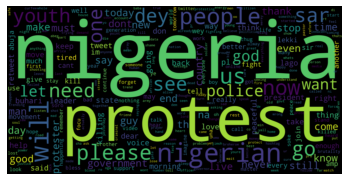

In [ ]:
from wordcloud import WordCloud
all_text = data['tweet_new'].to_string()
wordcloud = WordCloud(scale=10,collocations=False,max_words=500,max_font_size=500).generate(all_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
vectorizer = CountVectorizer(analyzer='word',       
                             min_df=3,                        # minimum required occurences of a word 
                             stop_words='english',             # remove stop words
                             #lowercase=True,                   # convert all words to lowercase
                             token_pattern='[a-zA-Z0-9]{3,}',  # num chars > 3
                             max_features=5000,             # max number of unique words. Build a vocabulary that only consider the top max_features ordered by term frequency across the corpus
                            )

data_vectorized = vectorizer.fit_transform(data['processed_docs'])

lda_model = LatentDirichletAllocation(n_components=6, # Number of topics
                                      learning_method='online',
                                      random_state=0,       
                                      n_jobs = -1  # Use all available CPUs
                                     )
lda_output = lda_model.fit_transform(data_vectorized)

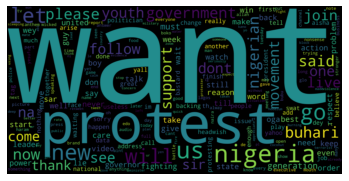

In [ ]:
from wordcloud import WordCloud
all_text = Topic_5_data['tweet_new'].to_string()
wordcloud = WordCloud(scale=10,collocations=False,max_words=500,max_font_size=500).generate(all_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
data.head(4)

,tweet_id,location,place_latitude,place_longitude,country_code,account_creation_time,tweet_time,tweet,geometry,tweet_new,processed_docs
0,1.312105e+18,"Lagos, Nigeria",6.493,3.339,NG,2018-02-10 05:50:23,2020-10-02 18:59:34,The key to escape SARS is wearing your faded s...,POINT (3.339 6.492999999999999),the key to escape sars is wearing your faded s...,key escape sars wearing faded shirt jean rubbe...
1,1.312270e+18,oº°˚º°˚Wº°˚º°˚o,6.591,3.318,NG,2010-12-25 05:32:42,2020-10-03 05:56:07,You see that #BlackLivesMatter go be like exam...,POINT (3.318 6.591),you see that go be like example when nigeria y...,like example youth finally turn extortion
2,1.312290e+18,Lagos X Ilorin,6.493,3.339,NG,2017-11-27 08:47:42,2020-10-03 07:16:39,I AM TIRED #EndSARS,POINT (3.339 6.492999999999999),i am tired,tired
3,1.312292e+18,"Lekki, Nigeria",6.442,3.502,NG,2012-07-08 22:20:03,2020-10-03 07:24:43,@PoliceNG_CRU your officers are asking for war...,POINT (3.502 6.442),your officers are asking for war this is robb...,officer asking war robbery featured bbc cnn di...


In [ ]:
sel_topics = doc_topic_dit[[1,5]]

In [ ]:
data1 = data[['tweet_id','tweet','tweet_new']]

In [ ]:
dat_df = data1.join(sel_topics)
dat_df

,tweet_id,tweet,tweet_new,1,5
0,1.312105e+18,The key to escape SARS is wearing your faded s...,the key to escape sars is wearing your faded s...,0.639547,0.077779
1,1.312270e+18,You see that #BlackLivesMatter go be like exam...,you see that go be like example when nigeria y...,0.023942,0.023969
2,1.312290e+18,I AM TIRED #EndSARS,i am tired,0.582911,0.083333
3,1.312292e+18,@PoliceNG_CRU your officers are asking for war...,your officers are asking for war this is robb...,0.020892,0.020833
4,1.312296e+18,I know some of the SARS guys from the State CI...,i know some of the sars guys from the state ci...,0.061191,0.008404
...,...,...,...,...,...
216908,1.333580e+18,Exactly correct brother; the world's justice s...,exactly correct brother; the world's justice s...,0.168643,0.131572
216909,1.333581e+18,Man❤️am🥰ashuga-tam😗🙏❤️🌹😇🎶#EndSARS,manamashuga tam,0.166667,0.166667
216910,1.333581e+18,🙏Inshallah🙏🌹❤️Allah is wise. #EndSARS,inshallahallah is wise,0.583333,0.083333
216911,1.333582e+18,@PK_Defend @F_BALOCHI1 @PTIofficial @ImranKhan...,allah knows all look in your hand and your he...,0.018663,0.351850


In [ ]:
doc_topic_dit[1].describe()

count    216913.000000
mean          0.177124
std           0.172343
min           0.003401
25%           0.041667
50%           0.114034
75%           0.274700
max           0.982978
Name: 1, dtype: float64

In [ ]:
doc_topic_dit[5].describe()

count    216913.000000
mean          0.167175
std           0.160426
min           0.003401
25%           0.041667
50%           0.106941
75%           0.247661
max           0.982993
Name: 5, dtype: float64

In [ ]:
sel_topics

,1,5
0,0.639547,0.077779
1,0.023942,0.023969
2,0.582911,0.083333
3,0.020892,0.020833
4,0.061191,0.008404
...,...,...
216908,0.168643,0.131572
216909,0.166667,0.166667
216910,0.583333,0.083333
216911,0.018663,0.351850


In [ ]:
sel_topics[sel_topics[1] >= 0.5].describe()

,1,5
count,14433.000000,14433.000000
mean,0.614812,0.080971
std,0.090304,0.077732
min,0.500019,0.003401
25%,0.541662,0.033333
50%,0.583333,0.055556
75%,0.685117,0.083333
max,0.982978,0.447916


In [ ]:
sel_topics[sel_topics[5] >= 0.5].describe()

,1,5
count,11636.000000,11636.000000
mean,0.081650,0.605138
std,0.077567,0.083961
min,0.003401,0.500133
25%,0.033393,0.541557
50%,0.055556,0.583333
75%,0.083333,0.633338
max,0.437791,0.982993


In [ ]:
sel_topics[sel_topics[5] >= 0.9].value_counts()

1         5       
0.015152  0.924242    7
0.016667  0.916667    5
0.018519  0.907407    2
0.003401  0.982993    1
0.004065  0.979675    1
0.005051  0.947264    1
0.009804  0.950874    1
0.012821  0.935717    1
          0.935874    1
0.013889  0.930556    1
0.015201  0.924005    1
0.016667  0.916657    1
          0.916618    1
0.018519  0.907268    1
0.018658  0.907171    1
dtype: int64

In [ ]:
def get_data(data):
    Topic = []
    for i in data:
      if i >= 0.5:
        Topic.append(1)
      else:
        Topic.append(0)
    return Topic

In [ ]:
data_copy = dat_df.copy()
data_copy 

,tweet_id,tweet,tweet_new,1,5
0,1.312105e+18,The key to escape SARS is wearing your faded s...,the key to escape sars is wearing your faded s...,0.639547,0.077779
1,1.312270e+18,You see that #BlackLivesMatter go be like exam...,you see that go be like example when nigeria y...,0.023942,0.023969
2,1.312290e+18,I AM TIRED #EndSARS,i am tired,0.582911,0.083333
3,1.312292e+18,@PoliceNG_CRU your officers are asking for war...,your officers are asking for war this is robb...,0.020892,0.020833
4,1.312296e+18,I know some of the SARS guys from the State CI...,i know some of the sars guys from the state ci...,0.061191,0.008404
...,...,...,...,...,...
216908,1.333580e+18,Exactly correct brother; the world's justice s...,exactly correct brother; the world's justice s...,0.168643,0.131572
216909,1.333581e+18,Man❤️am🥰ashuga-tam😗🙏❤️🌹😇🎶#EndSARS,manamashuga tam,0.166667,0.166667
216910,1.333581e+18,🙏Inshallah🙏🌹❤️Allah is wise. #EndSARS,inshallahallah is wise,0.583333,0.083333
216911,1.333582e+18,@PK_Defend @F_BALOCHI1 @PTIofficial @ImranKhan...,allah knows all look in your hand and your he...,0.018663,0.351850


In [ ]:
dat_df['Topic_1']=get_data(dat_df[1])

In [ ]:
dat_df.head()

,tweet_id,tweet,tweet_new,1,5,Topic_1
0,1.312105e+18,The key to escape SARS is wearing your faded s...,the key to escape sars is wearing your faded s...,0.639547,0.077779,1
1,1.312270e+18,You see that #BlackLivesMatter go be like exam...,you see that go be like example when nigeria y...,0.023942,0.023969,0
2,1.312290e+18,I AM TIRED #EndSARS,i am tired,0.582911,0.083333,1
3,1.312292e+18,@PoliceNG_CRU your officers are asking for war...,your officers are asking for war this is robb...,0.020892,0.020833,0
4,1.312296e+18,I know some of the SARS guys from the State CI...,i know some of the sars guys from the state ci...,0.061191,0.008404,0


In [ ]:
data_copy['Topic_5']=get_data(data_copy[5])

In [ ]:
data_copy.head()

,tweet_id,tweet,tweet_new,1,5,Topic_5
0,1.312105e+18,The key to escape SARS is wearing your faded s...,the key to escape sars is wearing your faded s...,0.639547,0.077779,0
1,1.312270e+18,You see that #BlackLivesMatter go be like exam...,you see that go be like example when nigeria y...,0.023942,0.023969,0
2,1.312290e+18,I AM TIRED #EndSARS,i am tired,0.582911,0.083333,0
3,1.312292e+18,@PoliceNG_CRU your officers are asking for war...,your officers are asking for war this is robb...,0.020892,0.020833,0
4,1.312296e+18,I know some of the SARS guys from the State CI...,i know some of the sars guys from the state ci...,0.061191,0.008404,0


In [ ]:
dat_df.shape

(216913, 6)

In [ ]:
Topic_1_data = dat_df[dat_df['Topic_1'] == 1].reset_index(drop=True)
Topic_1_data 

,tweet_id,tweet,tweet_new,1,5,Topic_1
0,1.312105e+18,The key to escape SARS is wearing your faded s...,the key to escape sars is wearing your faded s...,0.639547,0.077779,1
1,1.312290e+18,I AM TIRED #EndSARS,i am tired,0.582911,0.083333,1
2,1.312307e+18,Even if they are criminals they are to be judg...,even if they are criminals they are to be judg...,0.650176,0.018519,1
3,1.312334e+18,I prefer to be rubbed by Arm robbers than SARZ...,i prefer to be rubbed by arm robbers than sarz...,0.833323,0.015152,1
4,1.312337e+18,I think we should be reporting locations where...,i think we should be reporting locations where...,0.652982,0.015183,1
...,...,...,...,...,...,...
14428,1.343914e+18,Please Elaborate IAST(ISO) 15919\nInternationa...,please elaborate iast iso international alpha...,0.582847,0.083820,1
14429,1.343976e+18,You can start making your order ASAP\n#EndSars...,you can start making your order asap,0.523356,0.342850,1
14430,1.344206e+18,"During the #EndSars Protest , If anyone has to...",during the protest if anyone has told me tha...,0.519345,0.308464,1
14431,1.344362e+18,Nigeria Government &lt;&lt;&lt;&lt;&lt;&lt;&lt...,nigeria government lt; lt; lt; lt; lt; lt; lt...,0.582692,0.083963,1


In [ ]:
Topic_5_data = data_copy[data_copy['Topic_5'] == 1].reset_index(drop=True)
Topic_5_data

,tweet_id,tweet,tweet_new,1,5,Topic_5
0,1.312299e+18,@sars_is_here @sars_watch @segalink @PoliceNG ...,tag alongside let report the situation until ...,0.023820,0.880786,1
1,1.312319e+18,@MBuhari @NGRPresident \nIs this what it has c...,is this what it has come to innocent and legi...,0.012831,0.675368,1
2,1.312343e+18,"It’s either Buhari is deaf, blind or just wick...",its either buhari is deaf blind or just wicked,0.033382,0.833285,1
3,1.312345e+18,@SARSishere @sars_watch @segalink @PoliceNG In...,in it i said my files since they couldn't fi...,0.015152,0.737882,1
4,1.312347e+18,I have never seen SanwoOlu address this #SARS ...,i have never seen sanwoolu address this issue ...,0.012837,0.753232,1
...,...,...,...,...,...,...
11631,1.343888e+18,@AishaYesufu After #EndSARS fighting....who wi...,after fighting who will face joshua,0.041824,0.541526,1
11632,1.343931e+18,"#EndSARS: Six weeks after inauguration, Oyo ju...",six weeks after inauguration oyo judicial p...,0.027849,0.525207,1
11633,1.344211e+18,Sowore - Coup planner\n#EndSARS Protesters - T...,sowore coup planner protesters terrorist b...,0.153815,0.762852,1
11634,1.344603e+18,"Later tonight, I wrap up 2020 in a different s...",later tonight i wrap up in a different style,0.360897,0.527446,1


In [ ]:
def rename(data):
    Topic = []
    for i in data:
      if i == 1:
        Topic.append('Topic_6')
    return Topic

In [ ]:
Topic_1_data

,tweet_id,tweet,tweet_new,1,5,Topic_1
0,1.312105e+18,The key to escape SARS is wearing your faded s...,the key to escape sars is wearing your faded s...,0.639547,0.077779,1
1,1.312290e+18,I AM TIRED #EndSARS,i am tired,0.582911,0.083333,1
2,1.312307e+18,Even if they are criminals they are to be judg...,even if they are criminals they are to be judg...,0.650176,0.018519,1
3,1.312334e+18,I prefer to be rubbed by Arm robbers than SARZ...,i prefer to be rubbed by arm robbers than sarz...,0.833323,0.015152,1
4,1.312337e+18,I think we should be reporting locations where...,i think we should be reporting locations where...,0.652982,0.015183,1
...,...,...,...,...,...,...
14428,1.343914e+18,Please Elaborate IAST(ISO) 15919\nInternationa...,please elaborate iast iso international alpha...,0.582847,0.083820,1
14429,1.343976e+18,You can start making your order ASAP\n#EndSars...,you can start making your order asap,0.523356,0.342850,1
14430,1.344206e+18,"During the #EndSars Protest , If anyone has to...",during the protest if anyone has told me tha...,0.519345,0.308464,1
14431,1.344362e+18,Nigeria Government &lt;&lt;&lt;&lt;&lt;&lt;&lt...,nigeria government lt; lt; lt; lt; lt; lt; lt...,0.582692,0.083963,1


In [ ]:
Topic_1_data['Topic_1']= rename(Topic_1_data['Topic_1'])

In [ ]:
Topic_1_data = Topic_1_data.rename(columns={'Topic_1': 'Topic_Label'})

In [ ]:
Topic_5_data['Topic_5']= rename(Topic_5_data['Topic_5'])

In [ ]:
Topic_5_data = Topic_5_data.rename(columns={'Topic_5': 'Topic_Label'})

In [ ]:
Topic_1_data

,tweet_id,tweet,tweet_new,1,5,Topic_Label
0,1.312105e+18,The key to escape SARS is wearing your faded s...,the key to escape sars is wearing your faded s...,0.639547,0.077779,Topic_2
1,1.312290e+18,I AM TIRED #EndSARS,i am tired,0.582911,0.083333,Topic_2
2,1.312307e+18,Even if they are criminals they are to be judg...,even if they are criminals they are to be judg...,0.650176,0.018519,Topic_2
3,1.312334e+18,I prefer to be rubbed by Arm robbers than SARZ...,i prefer to be rubbed by arm robbers than sarz...,0.833323,0.015152,Topic_2
4,1.312337e+18,I think we should be reporting locations where...,i think we should be reporting locations where...,0.652982,0.015183,Topic_2
...,...,...,...,...,...,...
14428,1.343914e+18,Please Elaborate IAST(ISO) 15919\nInternationa...,please elaborate iast iso international alpha...,0.582847,0.083820,Topic_2
14429,1.343976e+18,You can start making your order ASAP\n#EndSars...,you can start making your order asap,0.523356,0.342850,Topic_2
14430,1.344206e+18,"During the #EndSars Protest , If anyone has to...",during the protest if anyone has told me tha...,0.519345,0.308464,Topic_2
14431,1.344362e+18,Nigeria Government &lt;&lt;&lt;&lt;&lt;&lt;&lt...,nigeria government lt; lt; lt; lt; lt; lt; lt...,0.582692,0.083963,Topic_2


In [ ]:
Topic_5_data 

,tweet_id,tweet,tweet_new,1,5,Topic_Label
0,1.312299e+18,@sars_is_here @sars_watch @segalink @PoliceNG ...,tag alongside let report the situation until ...,0.023820,0.880786,Topic_6
1,1.312319e+18,@MBuhari @NGRPresident \nIs this what it has c...,is this what it has come to innocent and legi...,0.012831,0.675368,Topic_6
2,1.312343e+18,"It’s either Buhari is deaf, blind or just wick...",its either buhari is deaf blind or just wicked,0.033382,0.833285,Topic_6
3,1.312345e+18,@SARSishere @sars_watch @segalink @PoliceNG In...,in it i said my files since they couldn't fi...,0.015152,0.737882,Topic_6
4,1.312347e+18,I have never seen SanwoOlu address this #SARS ...,i have never seen sanwoolu address this issue ...,0.012837,0.753232,Topic_6
...,...,...,...,...,...,...
11631,1.343888e+18,@AishaYesufu After #EndSARS fighting....who wi...,after fighting who will face joshua,0.041824,0.541526,Topic_6
11632,1.343931e+18,"#EndSARS: Six weeks after inauguration, Oyo ju...",six weeks after inauguration oyo judicial p...,0.027849,0.525207,Topic_6
11633,1.344211e+18,Sowore - Coup planner\n#EndSARS Protesters - T...,sowore coup planner protesters terrorist b...,0.153815,0.762852,Topic_6
11634,1.344603e+18,"Later tonight, I wrap up 2020 in a different s...",later tonight i wrap up in a different style,0.360897,0.527446,Topic_6


In [ ]:
selected_datset = pd.concat([Topic_5_data,Topic_1_data]).reset_index(drop=True)
selected_datset

,tweet_id,tweet,tweet_new,1,5,Topic_Label
0,1.312299e+18,@sars_is_here @sars_watch @segalink @PoliceNG ...,tag alongside let report the situation until ...,0.023820,0.880786,Topic_6
1,1.312319e+18,@MBuhari @NGRPresident \nIs this what it has c...,is this what it has come to innocent and legi...,0.012831,0.675368,Topic_6
2,1.312343e+18,"It’s either Buhari is deaf, blind or just wick...",its either buhari is deaf blind or just wicked,0.033382,0.833285,Topic_6
3,1.312345e+18,@SARSishere @sars_watch @segalink @PoliceNG In...,in it i said my files since they couldn't fi...,0.015152,0.737882,Topic_6
4,1.312347e+18,I have never seen SanwoOlu address this #SARS ...,i have never seen sanwoolu address this issue ...,0.012837,0.753232,Topic_6
...,...,...,...,...,...,...
26064,1.343914e+18,Please Elaborate IAST(ISO) 15919\nInternationa...,please elaborate iast iso international alpha...,0.582847,0.083820,Topic_2
26065,1.343976e+18,You can start making your order ASAP\n#EndSars...,you can start making your order asap,0.523356,0.342850,Topic_2
26066,1.344206e+18,"During the #EndSars Protest , If anyone has to...",during the protest if anyone has told me tha...,0.519345,0.308464,Topic_2
26067,1.344362e+18,Nigeria Government &lt;&lt;&lt;&lt;&lt;&lt;&lt...,nigeria government lt; lt; lt; lt; lt; lt; lt...,0.582692,0.083963,Topic_2


In [ ]:
selected_datset.to_csv('Topic_2and_6.csv', index=False)
from google.colab import files
files.download("Topic_2and_6.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
selected_datset['Topic_Label'].value_counts()

Topic_2    14433
Topic_6    11636
Name: Topic_Label, dtype: int64

In [ ]:
selected_datset['tweet_new'].duplicated().sum()

0

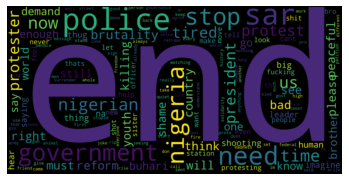

In [ ]:
from wordcloud import WordCloud
all_text = Topic_1_data['tweet_new'].to_string()
wordcloud = WordCloud(scale=10,collocations=False,max_words=500,max_font_size=500).generate(all_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# 1st Topic modelling with 6 classes

In [ ]:
#data  = pd.read_csv('/content/drive/My Drive/endsars_geodf.csv',low_memory=False)
#data.shape


(332371, 9)

In [ ]:
%%capture
!pip install pyLDAvis
import re, nltk, spacy, string

from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from pprint import pprint

#import pandas as pd
import pyLDAvis
import pyLDAvis.sklearn
import matplotlib.pyplot as plt
%matplotlib inline

from plotly.offline import plot
import plotly.graph_objects as go
import plotly.express as px

In [ ]:
# def remove_newline(message):
#   return re.sub('\n', ' ', str(message.lower()))
# def remove_symbols(message):
   #re.sub(r'^\x00-\x7F+', ' ', message)
#   return re.sub(r'[@!.,(\/&)?:#*...-'']', '', str(message)) 
# def remove_urls(message):
#   return re.sub(r'http\S+', '', str(message))
# # Remove emoji
# from unicodedata import normalize
# def remove_nonascii(message):
#   unicode_norm = normalize('NFD', message).encode('ascii', 'ignore')
#   return unicode_norm.decode('UTF-8')

# def prep_message(message):
#   message = remove_urls(message)
#   message = remove_symbols(message)
#   message = remove_newline(message)
#   message = remove_nonascii(message)
#   return message

In [ ]:
pyLDAvis.enable_notebook()
pyLDAvis.sklearn.prepare(lda_model, data_vectorized, vectorizer, mds='tsne')

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:56: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:348: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:349: DeprecationWarning:

`np.float` is 

PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
2       1.465019 -47.625065       1        1  18.726546
1      54.854797 -36.476795       2        1  18.354272
4      32.212929 -61.444572       3        1  16.865374
5       5.111096 -14.110332       4        1  16.822303
3      26.350170 -33.374702       5        1  16.104062
0      38.109818  -7.222781       6        1  13.127443, topic_info=           Term          Freq         Total Category  logprob  loglift
3347     police  10946.000000  10946.000000  Default  30.0000  30.0000
3492  protester  10805.000000  10805.000000  Default  29.0000  29.0000
4800       want   8449.000000   8449.000000  Default  28.0000  28.0000
1921        god   8519.000000   8519.000000  Default  27.0000  27.0000
3250     people  19105.000000  19105.000000  Default  26.0000  26.0000
...         ...           ...           ...      ...      ...      ...
4239      state   3204.985462   5448.474097   Topic6  -4.1048   1.4998
4516   tomorrow   1357.086037   1944.305125   Topic6  -4.9642   1.6709
4231      stand   1441.865775   2669.567298   Topic6  -4.9036   1.4145
856      coming   1228.718680   1995.130347   Topic6  -5.0636   1.5457
2103       help   1363.353101   4094.691991   Topic6  -4.9596   0.9307

[279 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
3         1  0.999591      abeg
21        6  0.999553     abuja
37        1  0.999240   account
53        4  0.999501    action
62        5  0.999255  actually
...     ...       ...       ...
4986      3  0.999543     youre
4987      1  0.209821     youth
4987      2  0.202299     youth
4987      3  0.416866     youth
4987      4  0.171045     youth

[298 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 5, 6, 4, 1])